In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from Functions import extent_Dataframe,EntryToDataFrame, Neutron_to_Pandas, read_raw_feather
import glob
import os


In [2]:
for file in glob.glob('*\*.feather'):
    print(file)
    df = pd.read_feather(file)


Complete_feathers\Aib_final.feather
Complete_feathers\Ala_final.feather
Complete_feathers\Asn_h2o_final.feather
Complete_feathers\Asp_final.feather
Complete_feathers\Cys_final.feather
Complete_feathers\Glu_final.feather
Complete_feathers\Gly_final.feather
Complete_feathers\His_final.feather
Complete_feathers\Pro_final.feather
Complete_feathers\Rac_PA_final.feather
Complete_feathers\Ser_h2o_final.feather
Complete_feathers\Thr_final.feather
Complete_feathers\Tyr_final.feather
Feather_raw\Aib_final.feather
Feather_raw\Ala_final.feather
Feather_raw\Asn_h2o_final.feather
Feather_raw\Asp_final.feather
Feather_raw\Cys_final.feather
Feather_raw\Glu_final.feather
Feather_raw\Gly_final.feather
Feather_raw\His_final.feather
Feather_raw\Pro_final.feather
Feather_raw\RacPA_final.feather
Feather_raw\Ser_h2o_final.feather
Feather_raw\Thr_final.feather
Feather_raw\Tyr_final.feather


In [3]:
class NeutronenMessung(): #musst be of shape ['O002-H002', '1.050', 'C008-H00d', '1.086', 'C008-H00e', '1.080', 'C00A-H00f', '1.079', 'C00A-H00g', '1.102','C009-H009', '1.091', 'N005-H00a', '1.038', 'N005-H00c', '1.027', 'N005-H00b', '1.038']
    def __init__(self, base):
        data = []
        with open(f".\\Neutron_Data\\{base}.txt", 'r') as f:
            for line in f.readlines():
                for char in ["[", "]", "'", "=", ","]:
                    line = line.replace(char, "")
                data.append(pd.DataFrame.from_dict(dict(np.array(line.split()).reshape(-1,2)), orient="index", dtype=float).T)
        self.nb, self.ne = data

In [4]:
class DF():
    def __init__(self, path:str, Name:str): # Funkionen welche vordefininerte Eigenschaften haben (__ Funktionen __ zB def init() )
        self.df = pd.read_feather(path)
        self.Neutron = NeutronenMessung(Name)
        
        if self.df.shape[1] == 17:
            self.df = self.extent_DF()
            self.saveDF(path)

    def saveDF(self, path:str):
        self.df.to_feather(path)
        
    def extent_DF(self):
        return extent_Dataframe(self.df, self.Neutron.nb.columns, self.Neutron.nb, self.Neutron.ne)
  

In [790]:
TyrDF = DF(".\\Feather_raw\\Tyr_final.feather", 'Tyr')  

In [791]:
GluDF = DF(".\\Feather_raw\\Glu_final.feather", 'Glu')

In [792]:
ProDf = DF(".\\Feather_raw\\Pro_final.feather", 'Pro')

In [793]:
AibDF = DF(".\\Feather_raw\\Aib_final.feather", 'Aib')
AibDF.df

wRMSD Data  Method             Base Solvent Becke Accuracy  \
0      0.725927  Aib  R2SCAN         6-31G(d)  Vacuum         Normal   
1      0.400548  Aib    PBE0       def2-TZVPD  Vacuum         Normal   
2      0.401564  Aib    PBE0          cc-pVDZ  Vacuum           High   
3      0.475775  Aib      BP       6-31G(d,p)  Vacuum           High   
4      0.468298  Aib      BP       6-31G(d,p)  Vacuum            Low   
...         ...  ...     ...              ...     ...            ...   
12415  0.725051  Aib    BP86         6-31G(d)   Water           High   
12416  0.376309  Aib    BP86      6-311G(d,p)   Water         Normal   
12417  0.379575  Aib    BP86      6-311G(d,p)   Water           High   
12418  0.377982  Aib    BP86  6-311++G(2d,2p)  Vacuum         Normal   
12419  0.760014  Aib   B3LYP         6-31G(d)   Water            Low   

        SCF Conv   SCNL weight       FOM Nr. NPD                    R1  \
0      StrongSCF  False   True  2.294906       0  0.020779208147883328   
1       LooseSCF   True   True  2.428023       0  0.020431129678434422   
2      SloppySCF  False   True  2.245029       0   0.02075210984303112   
3      NormalSCF   True   True  2.243845       0  0.020502115605014016   
4      StrongSCF  False   True  2.163882       0  0.021752465580184996   
...          ...    ...    ...       ...     ...                   ...   
12415  SloppySCF  False   True  2.346819       0    0.0203274948096111   
12416  NormalSCF  False   True  2.315378       0  0.020947275675449715   
12417  StrongSCF  False   True  2.312437       0  0.020933442008743686   
12418   LooseSCF   True   True  2.234525       0  0.021728158595959945   
12419  SloppySCF  False   True  2.275245       0   0.02130352702433714   

                        wR2    Goof             max_peak  \
0      0.042045919510728696  1.7897  0.20151566582308217   
1       0.04830710154870413   1.061  0.17181875516405212   
2       0.04177776681603444  1.7783   0.2093217961851256   
3      0.050084881030223176  1.0433   0.1927521735090824   
4       0.05342144815228338  1.0502  0.20585469263868478   
...                     ...     ...                  ...   
12415   0.04044276336546257  1.7209  0.16648874572641104   
12416   0.04974875231437343  1.0385   0.1831747379562167   
12417  0.049462900941037835  1.0792   0.1845562110163966   
12418  0.052414662808832765  1.0472  0.20587848710925732   
12419   0.04141940144761526  1.7625   0.1614001613170885   

                   max_hole               res_rms  \
0      -0.16887591508478453   0.04014612663361687   
1      -0.13842142736512264   0.03953956437681477   
2      -0.17888279456824202   0.04012275913242944   
3      -0.17036518277129414   0.03959543950678771   
4       -0.1601790435685723  0.041121764536867327   
...                     ...                   ...   
12415  -0.18197629310278957  0.039782789684211256   
12416  -0.15030075567901527    0.0405131682010894   
12417  -0.15104934863292566  0.040551581161946654   
12418  -0.14123387547848698   0.04194644387813129   
12419  -0.18867034845869374  0.040860877345805256   

                                             bondlengths  \
0      O-C5:1.2474003580243218,O1-C5:1.25869565576322...   
1      O-C5:1.2483436021603842,O1-C5:1.25954709402254...   
2      O-C5:1.2476435374740538,O1-C5:1.25904977565918...   
3      O-C5:1.2476626004269258,O1-C5:1.25880626027973...   
4      O-C5:1.2477428881866934,O1-C5:1.25880428124284...   
...                                                  ...   
12415  O-C5:1.2474347941638277,O1-C5:1.25860474531079...   
12416  O-C5:1.2482198148357893,O1-C5:1.25946624792311...   
12417  O-C5:1.248219503740475,O1-C5:1.259467377556423...   
12418  O-C5:1.2484934670614753,O1-C5:1.25975609831819...   
12419  O-C5:1.2474901104978613,O1-C5:1.25851842677147...   

                                              bonderrors  
0      O-C5:0.0004010568933215841,O1-C5:0.00038787686...  
1      O-C5:0.00041369802204949867,O1-C5:0.0004054892...  


In [794]:
df_water = AibDF.df.loc[(AibDF.df['Solvent'] == 'Water')]
np.mean(df_water['FOM'].tolist())

2.2808871495886716

In [796]:
Rac_PADF = DF(".\\Feather_raw\\RacPA_final.feather", 'Rac_PA')

In [5]:
AlaDF = DF(".\\Feather_raw\\Ala_final.feather", 'Ala')


In [799]:
Asn_h2oDF = DF(".\\Feather_raw\\Asn_h2o_final.feather", 'Asn_h2o')

In [800]:
Ser_h2oDF = DF(".\\Feather_raw\\Ser_h2o_final.feather", 'Ser_h2o')

In [126]:
HisDF = DF(".\\Feather_raw\\His_final.feather", 'His')

In [802]:
CysDF = DF(".\\Feather_raw\\Cys_final.feather", 'Cys')

In [553]:
AspDF = DF(".\\Feather_raw\\Asp_final.feather", 'Asp')
AspDF.df

wRMSD Data  Method       Base Solvent Becke Accuracy   SCF Conv  \
0      0.770042  Asp      HF  jorge-DZP   Water            Low   TightSCF   
1      0.770042  Asp      HF  jorge-DZP   Water            Low  StrongSCF   
2      0.769880  Asp      HF  jorge-DZP   Water            Low  NormalSCF   
3      0.769880  Asp      HF  jorge-DZP   Water            Low   LooseSCF   
4      0.770120  Asp      HF  jorge-DZP   Water            Low  SloppySCF   
...         ...  ...     ...        ...     ...            ...        ...   
13225  2.303453  Asp   wB97X      3-21G  Vacuum            Low  NormalSCF   
13226  1.317166  Asp    TPSS  def2-TZVP   Water         Normal  StrongSCF   
13227  1.145967  Asp  R2SCAN    cc-pVDZ   Water         Normal  SloppySCF   
13228  1.311000  Asp     PBE  def2-TZVP  Vacuum         Normal   TightSCF   
13229  1.098463  Asp   B3LYP    cc-pVQZ   Water            Low  NormalSCF   

        SCNL weight       FOM Nr. NPD                    R1  \
0      False   True  1.801127       1    0.0272513528681745   
1      False   True  1.801127       1  0.027251352948229203   
2      False   True  1.801121       1  0.027251391939122935   
3      False   True  1.801121       1  0.027251391738149278   
4      False   True  1.801158       1  0.027251257514804752   
...      ...    ...       ...     ...                   ...   
13225   True   True  1.150688       0   0.03151959709909184   
13226   True   True  1.687423       0   0.02782465138753324   
13227   True   True  1.798889       0  0.027120826217703106   
13228   True   True  1.637541       0  0.028329025976445123   
13229   True   True  1.561416       1   0.02824225386115361   

                        wR2    Goof             max_peak  \
0       0.06327737010587242  1.0751   0.2956437946377811   
1       0.06327737232148135  1.0751  0.29564375493504547   
2       0.06327733023231656  1.0751   0.2956411266147237   
3       0.06327732861808538  1.0751   0.2956411114280567   
4       0.06327770760457008  1.0751   0.2956316049083907   
...                     ...     ...                  ...   
13225   0.07703437067709872  1.0715  0.46761873249204905   
13226    0.0652233276700908  1.0862  0.31995406046398095   
13227  0.062100694402286674  1.0962     0.32899548337953   
13228   0.06715042991814572  1.1331  0.31876335340511686   
13229   0.06683623678061935  1.1234  0.34206069725853094   

                   max_hole               res_rms  \
0      -0.19333174241600753   0.05066767401616936   
1      -0.19333173550168897   0.05066767527850081   
2      -0.19333370393802796  0.050667869839079775   
3      -0.19333370289535098   0.05066786935726063   
4       -0.1933315675636852   0.05066676310964172   
...                     ...                   ...   
13225    -0.186728983317473  0.060955581898142465   
13226  -0.18425254740898384   0.05622924870100787   
13227  -0.18028476650441533   0.05131741336341746   
13228   -0.1823730289569034   0.05822759466427954   
13229  -0.19413294391925362   0.05833204904726415   

                                             bondlengths  \
0      O-H:1.012385447745892,O-C4:1.3116908296569927,...   
1      O-H:1.0123855028351778,O-C4:1.3116908305807757...   
2      O-H:1.0124012794184865,O-C4:1.3116912034542563...   
3      O-H:1.0124012893894692,O-C4:1.3116912037509885...   
4      O-H:1.0123631148892858,O-C4:1.31169147921163,O...   
...                                                  ...   
13225  O-H:0.9266239492791255,O-C4:1.3108165316021054...   
13226  O-H:1.0042092144718606,O-C4:1.3119791527113909...   
13227  O-H:1.00106350056795,O-C4:1.3119708924414983,O...   
13228  O-H:1.011275586420233,O-C4:1.3119718929696607,...   
13229  O-H:1.0130830430587614,O-C4:1.3115771323020982...   

                                              bonderrors  
0      O-H:0.018769465918354974,O-C4:0.00111694816755...  
1      O-H:0.018769465294448683,O-C4:0.00111694817567...  
2      O-H:0.018767711849166282,O-C4:0.00111694640318...  
3      O-H:0.

In [804]:
GlyDF = DF(".\\Feather_raw\\Gly_final.feather", 'Gly')

In [805]:
ThrDF = DF(".\\Feather_raw\\Thr_final.feather", 'Thr')

In [17]:
# now i want to add pie plots representing the ratios of the methods in different regions of the scatter-Index plots
# for this i need to define the regions first: r1 = wRMSD.mean > wRMSD > wRMSD.mean - wRMSD.std
#                                              r2 = < wRMSD.mean - wRMSD.std

class PiePlot():
        def __init__(self, df, name:str):
                self.name = name
                self.df = df.copy()
                self.wRMSD = self.df.wRMSD
                self.FOM = self.df.FOM
                self.mean_wRMSD = self.wRMSD.mean()
                self.mean_FOM = self.FOM.mean()
                self.std_wRMSD = self.wRMSD.std()
                self.std_FOM = self.FOM.std()
                self.plot()
        def plot(self):
                
                bins = [0, self.mean_wRMSD - self.std_wRMSD, self.mean_wRMSD]
                self.df['interval'] = pd.cut(self.df.wRMSD, bins=bins)
                grouped_df = self.df.groupby(['interval', 'Method']).size().unstack().div(self.df['interval'].value_counts(), axis=0)
                for interval, group in grouped_df.iterrows():
                        plt.figure()
                        plt.pie(group[group>=0.01], autopct='%1.1f%%', startangle=90, labels=group[group>=0.01].index)
                        #plt.title(f'Pie Chart for Interval {interval}')
                        plt.show()

                


In [18]:
# To compare the refinemnts, we plot all wRMSD and FOM values as scatters along a mean value, which has to be calcualted before, of the wRMSD

class Plot():
    def __init__(self, df, name:str):
        self.name = name
        self.df = df
        self.wRMSD = self.df.wRMSD
        self.FOM = self.df.FOM
        self.mean_wRMSD = self.wRMSD.mean()
        self.mean_FOM = self.FOM.mean()
        self.std_wRMSD = self.wRMSD.std()
        self.std_FOM = self.FOM.std()
        self.plot()

    def plot(self):
        fig = plt.figure(figsize=(15, 5))
        variables = [('wRMSD', self.wRMSD, self.mean_wRMSD, self.std_wRMSD),
                        ('FOM', self.FOM, self.mean_FOM, self.std_FOM)]

        for i, (var_name, var_data, mean_val, std_val) in enumerate(variables):
            ax = fig.add_subplot(1, 3, i+1)
            ax.scatter(self.df.index, var_data, s=3, edgecolors='b', lw=0.01)
            ax.axhline(mean_val, color='r', linestyle='-', label='mean')
            ax.axhline(mean_val + std_val, color='r', linestyle='--', label='mean + std')
            ax.axhline(mean_val - std_val, color='r', linestyle='--', label='mean - std')
            ax.set_xlabel('Index')
            ax.set_ylabel(var_name)

        bins = [0, self.mean_wRMSD-self.std_wRMSD]
        self.df['interval'] = pd.cut(self.df.wRMSD, bins=bins)
        grouped_df = self.df.groupby(['interval', 'Method']).size().unstack().div(self.df['interval'].value_counts(), axis=0)
        for j, (interval, group) in enumerate(grouped_df.iterrows()):
            ax = fig.add_subplot(1, 3, i+j+2,) # cause the add_subplot enumerator starts with one
            wedges = ax.pie(group[group>=0.01], autopct='%1.1f%%', startangle=40, wedgeprops = dict(linewidth= 1, edgecolor='w', width=1)) # labels=group[group>=0.01].index
            ax.set_title(f'Pie Chart for Interval {interval}')
            kw = dict(arrowprops=dict(arrowstyle="-"),
            #bbox=bbox_props,
            zorder=0, va="center")
            
            for i, p in enumerate(wedges[0]):
                ang = (p.theta2 - p.theta1)/2. + p.theta1
                y = np.sin(np.deg2rad(ang))
                x = np.cos(np.deg2rad(ang))
                horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
                connectionstyle = "angle,angleA=0,angleB={}".format(ang)
                kw["arrowprops"].update({"connectionstyle": connectionstyle})
                ax.annotate(group[group>=0.01].index[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                            horizontalalignment=horizontalalignment, **kw)
    

        fig.suptitle(f'{self.name}: Distribution of wRMSD and FOM values along Index')
        # fig.savefig(f'.\\Plots\\{self.name}_Plot.png', dpi=300)
        # plt.close(fig)
        plt.show()



C:\Users\Daniel\AppData\Local\Temp\ipykernel_212624\3879514443.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = self.df.groupby(['interval', 'Method']).size().unstack().div(self.df['interval'].value_counts(), axis=0)


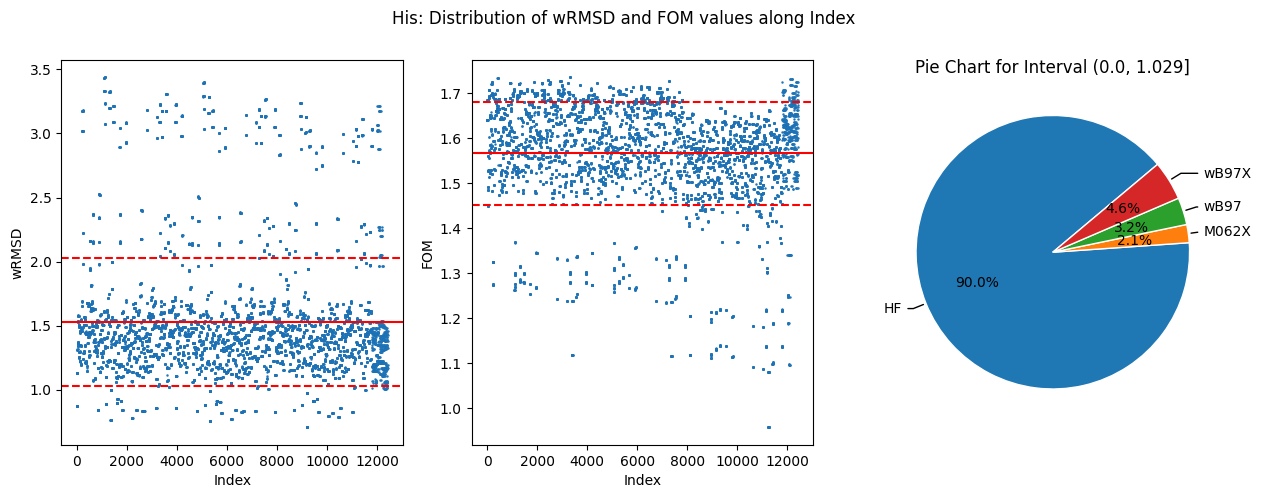

In [21]:
Plot(CysDF.df, 'His')

In [22]:
# Now its to plot a statistic distribution of the wRMSD and FOM values

class DistributionPlot():
    def __init__(self, df, name:str):
        self.name = name
        self.df = df
        self.wRMSD = self.df.wRMSD
        self.FOM = self.df.FOM
        self.plot()

    def plot(self):
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        variables = [('wRMSD', self.wRMSD),
                    ('FOM', self.FOM)]

        for i, (var_name, var_data) in enumerate(variables):
            ax = axs[i]
            ax.hist(var_data, bins=75, edgecolor='b', lw=0.01)
            ax.set_xlabel(var_name)
            ax.set_ylabel('')

        fig.suptitle(f'{self.name} Distribution of wRMSD and FOM values')
        # fig.savefig(f'.\\Plots\\{self.name}_Plot.png', dpi=300)
        # plt.close(fig)
        plt.show()


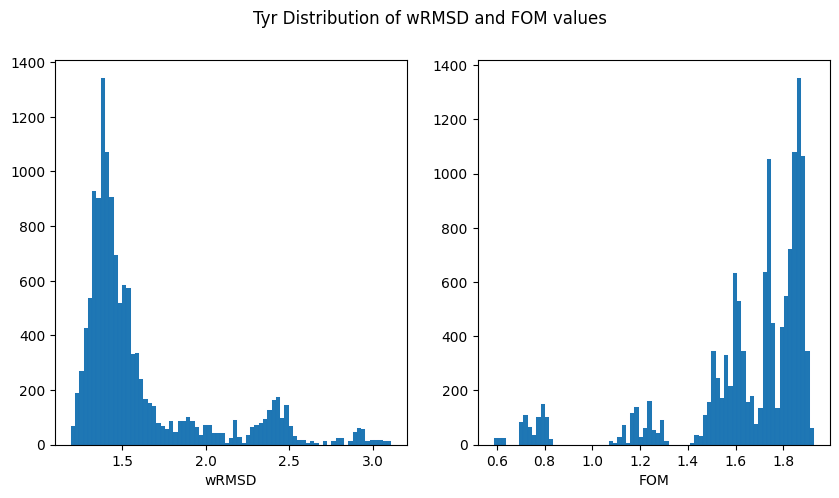

In [23]:
DistributionPlot(HisDF.df, 'Tyr')

In [124]:
class BoxPlots():
    def __init__(self, df):
        self.df = df
        self.plot()
        
    def plot(self):
        p = ['Base', 'SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent']

        for i, e in enumerate(p):
            fig, ax = plt.subplots(1, 1, figsize=(18, 5))
            sns.boxplot(x='Method', y='FOM', hue = e ,data=self.df,
                        ax=ax, palette="colorblind", 
                        medianprops = dict(linestyle = '-', linewidth = 1.5, color = 'white'), 
                        boxprops=dict(edgecolor='white', linewidth=1.5), width=.9,
                        flierprops={"markersize": 3,
                                    'markerfacecolor':'k'})
            plt.ylabel('wRMSD')
            plt.title(f'Boxplot of wRMSD by Method - {e}')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.xticks(ticks=None)
            #plt.savefig(f".\\BoxPlots\\{self.name}_{i}.png")
            plt.show()
            plt.clf()
            

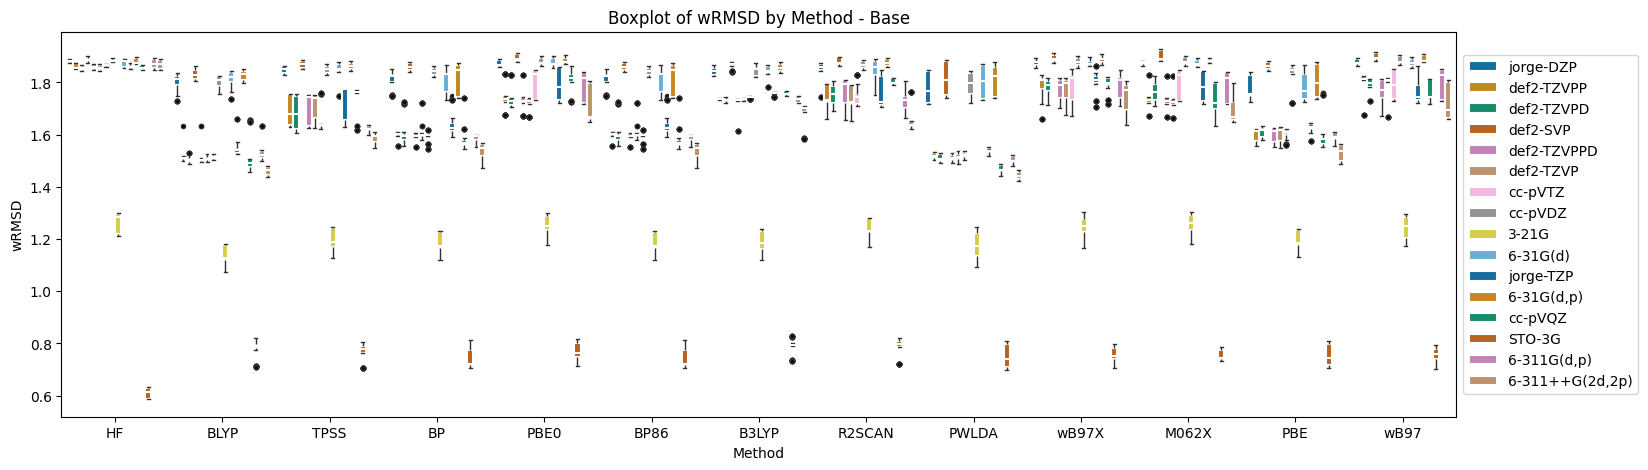

<Figure size 640x480 with 0 Axes>

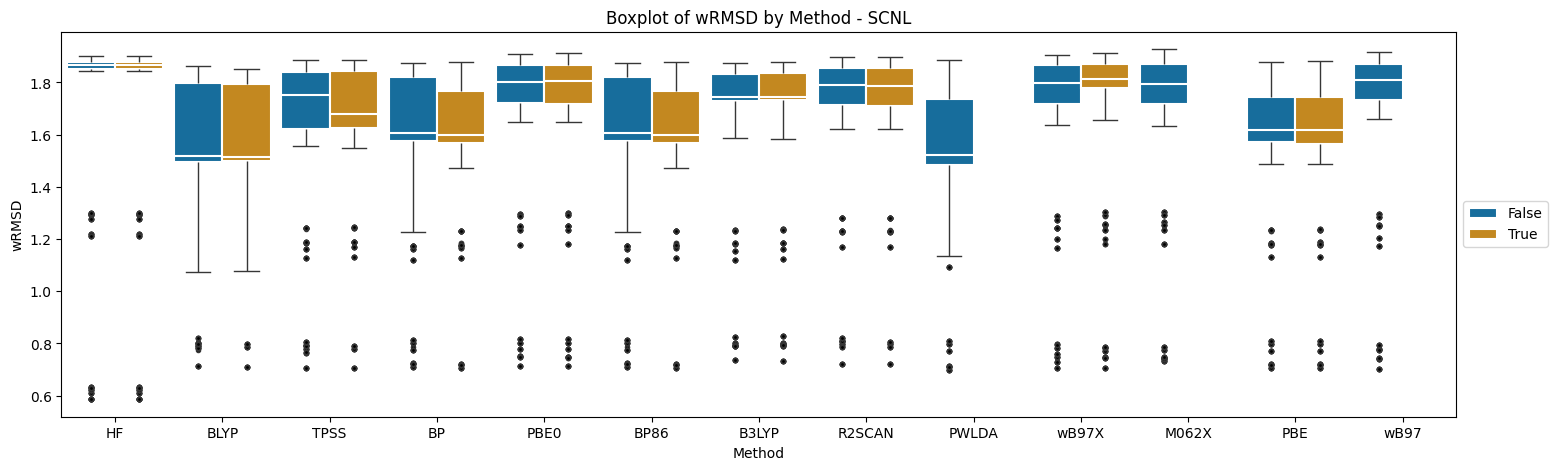

<Figure size 640x480 with 0 Axes>

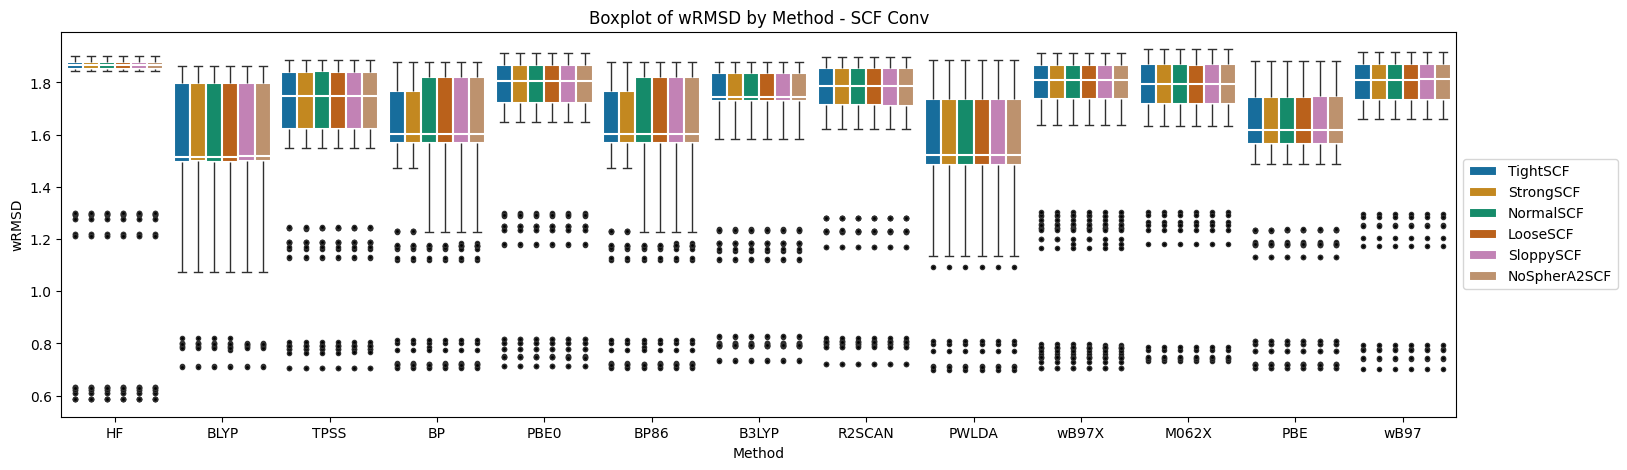

<Figure size 640x480 with 0 Axes>

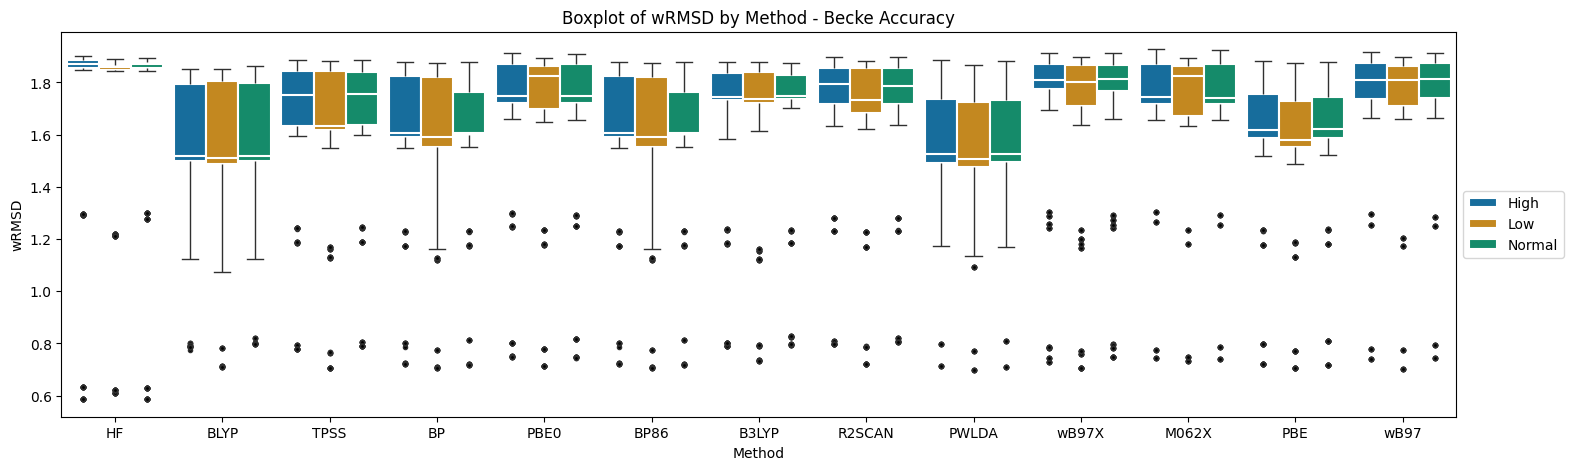

<Figure size 640x480 with 0 Axes>

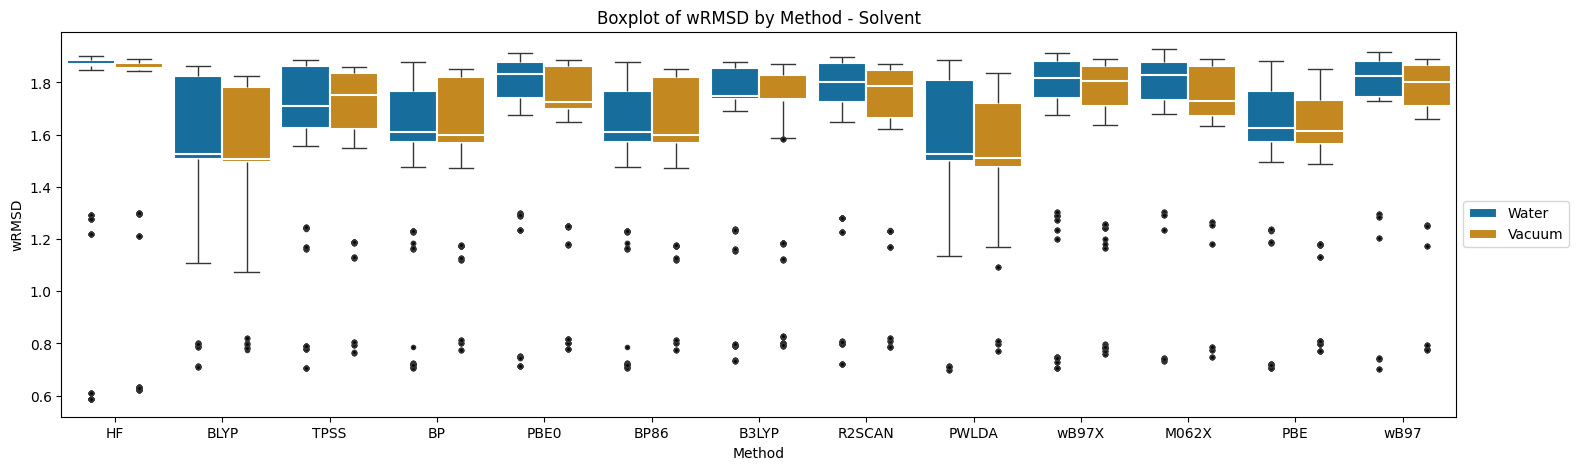

<Figure size 640x480 with 0 Axes>

In [127]:
BoxPlots(HisDF.df)

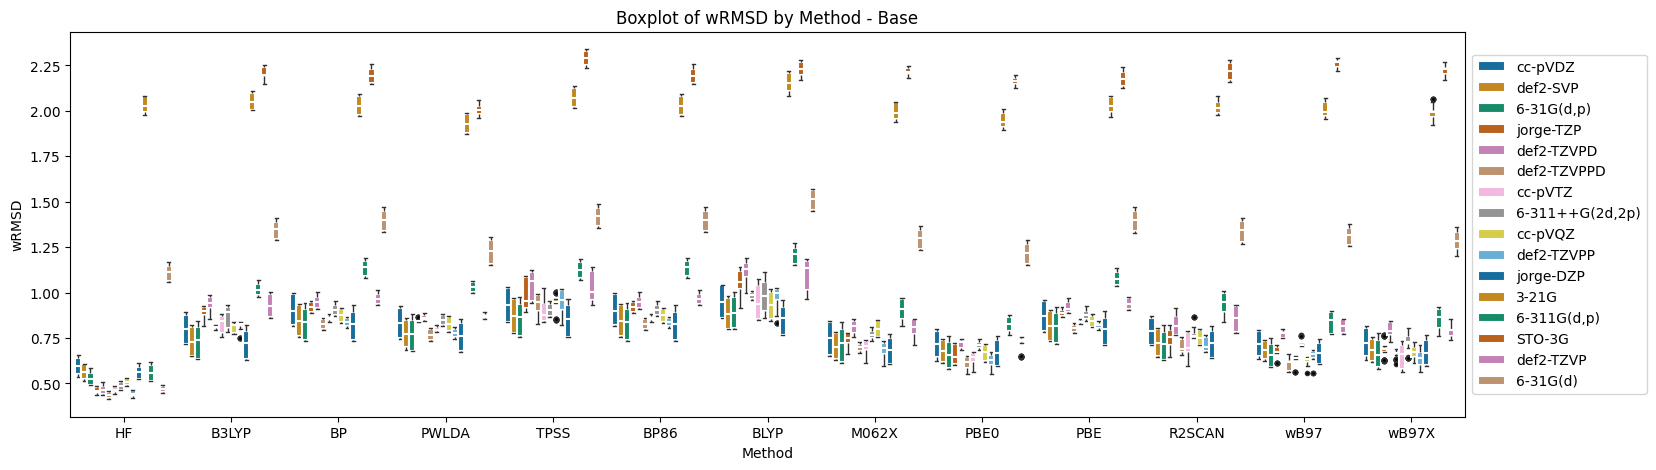

<Figure size 640x480 with 0 Axes>

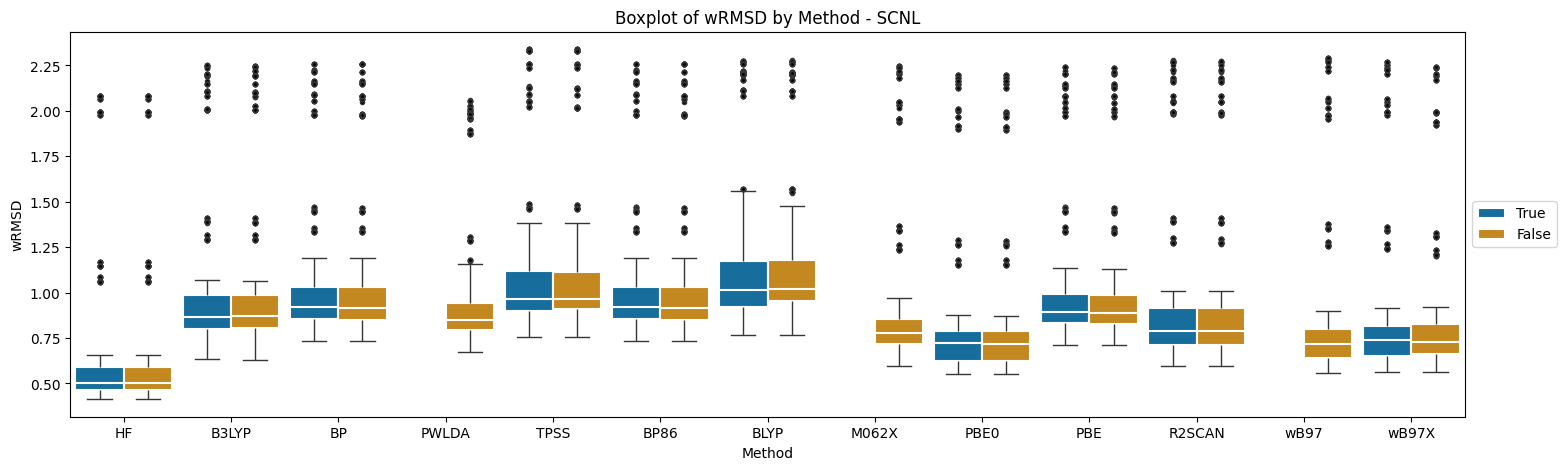

<Figure size 640x480 with 0 Axes>

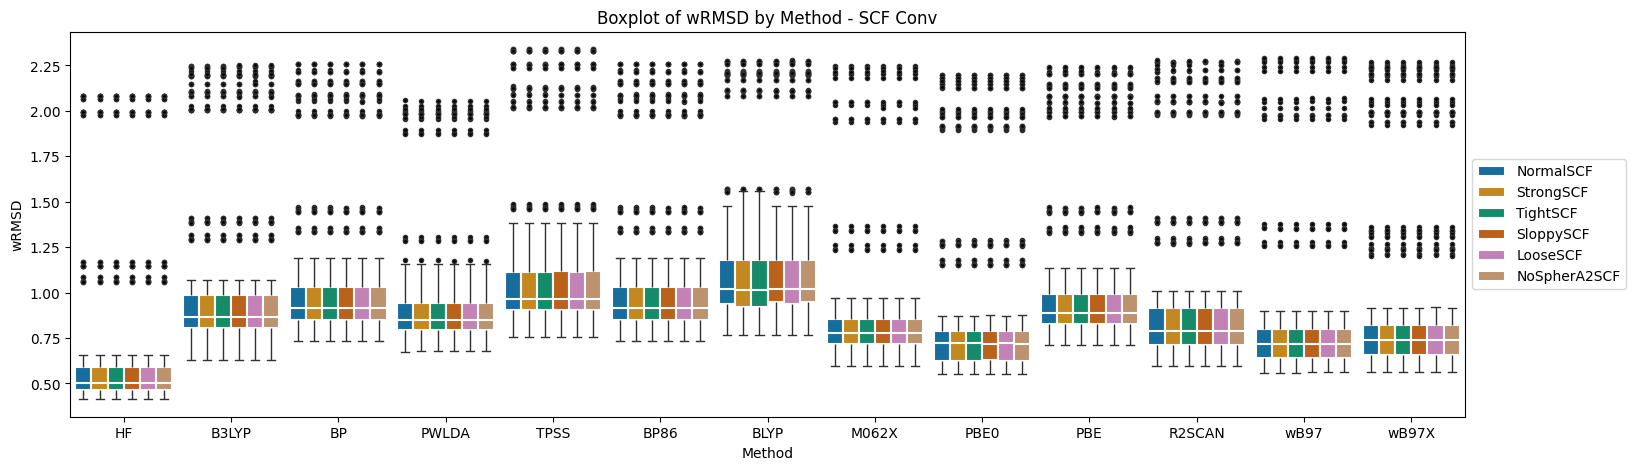

<Figure size 640x480 with 0 Axes>

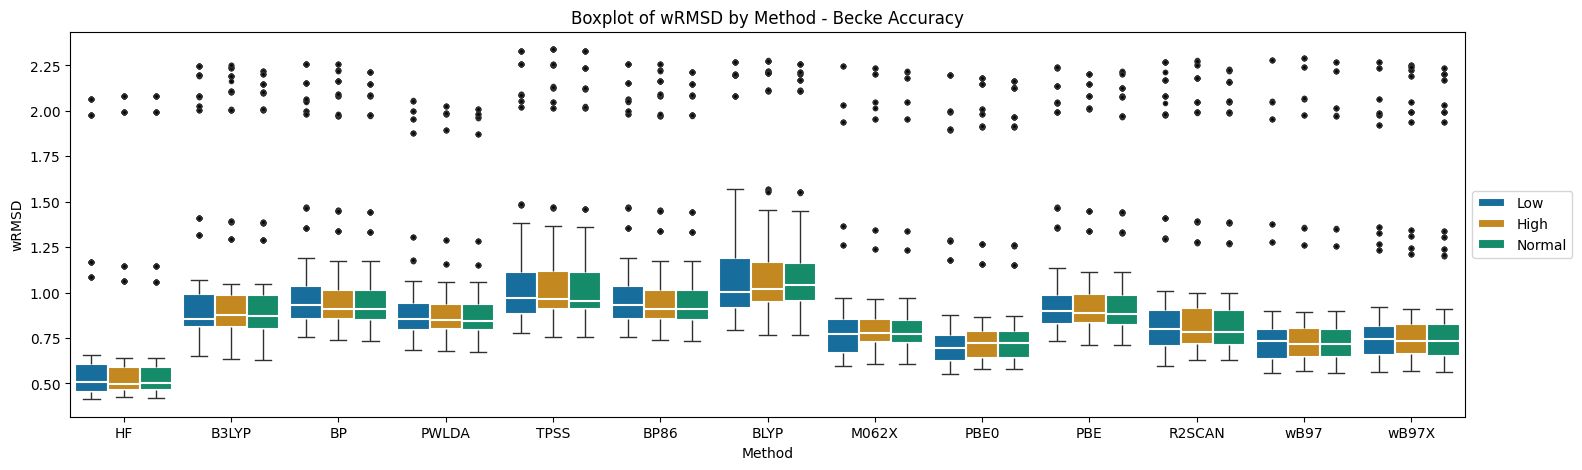

<Figure size 640x480 with 0 Axes>

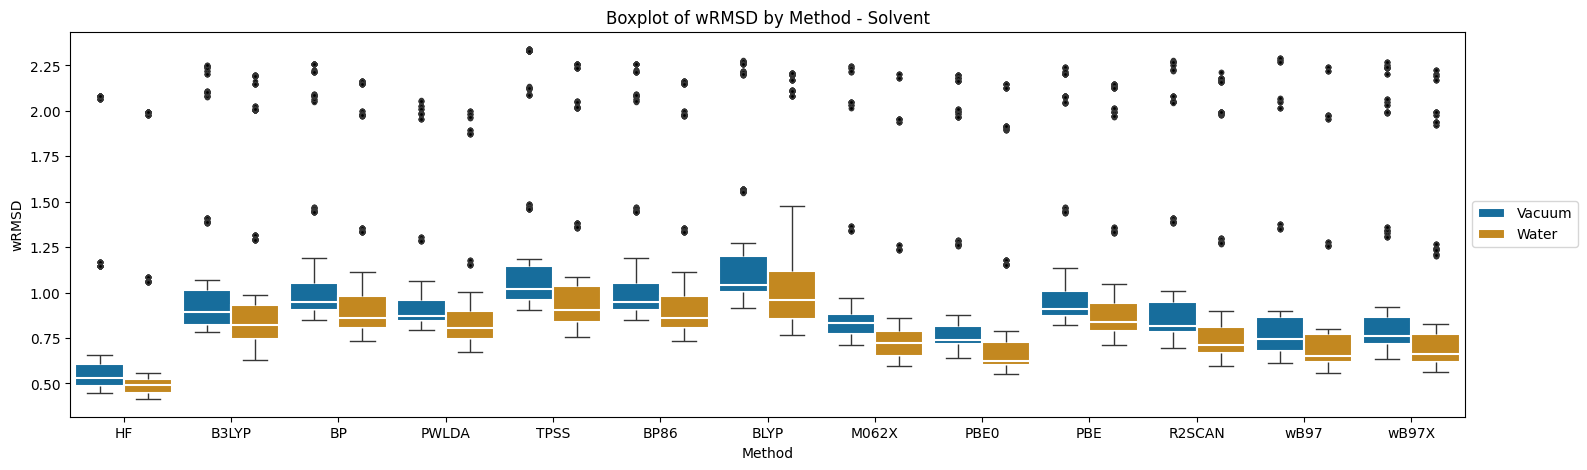

<Figure size 640x480 with 0 Axes>

In [17]:
BoxPlots(ProDf.df)

In [25]:
class Barplots():
    def __init__(self, df):
        self.df = df
        self.plot()
        
    def plot(self):
        p = ['SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent']
        data = self.df.loc[(self.df['Method'] == 'HF')]
        for i, e in enumerate(p):
            fig, ax = plt.subplots(1, 1, figsize=(15, 4))
            sns.barplot(x='Base', y='wRMSD', hue = e ,data=data, width=0.5, 
                        ax=ax, palette="colorblind", edgecolor='k', linewidth=0.5, capsize=.1, errwidth=0.5)
            plt.ylabel('wRMSD')
            plt.title(f'Barplot of wRMSD by Method - {e}')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.xticks(ticks=None, rotation=35)
            #plt.savefig(f".\\BoxPlots\\{self.name}_{i}.png")
            plt.show()
            plt.clf()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_212624\1937141198.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.barplot(x='Base', y='wRMSD', hue = e ,data=data, width=0.5,


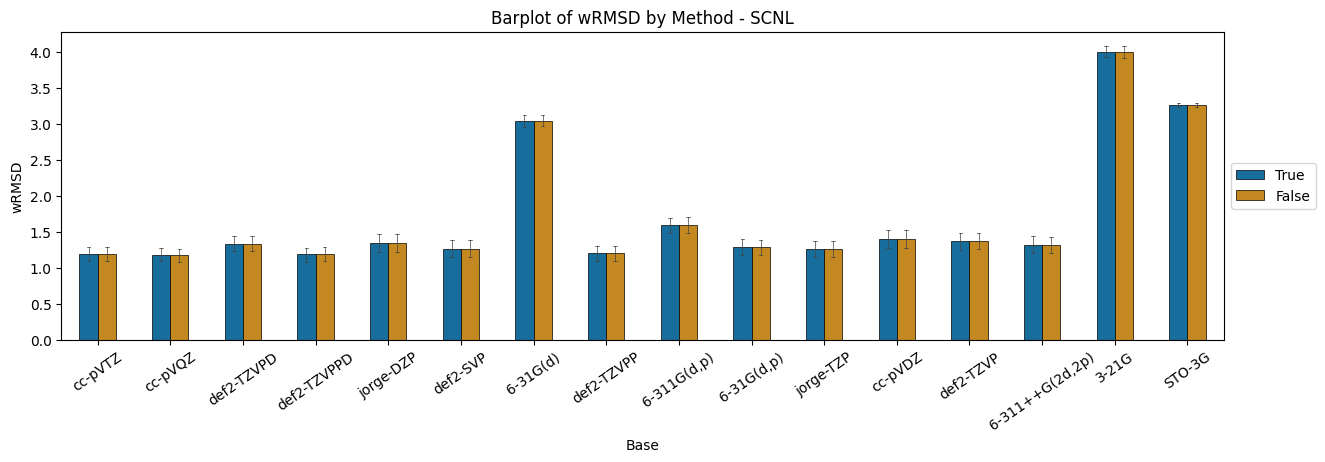

C:\Users\Daniel\AppData\Local\Temp\ipykernel_212624\1937141198.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.barplot(x='Base', y='wRMSD', hue = e ,data=data, width=0.5,


<Figure size 640x480 with 0 Axes>

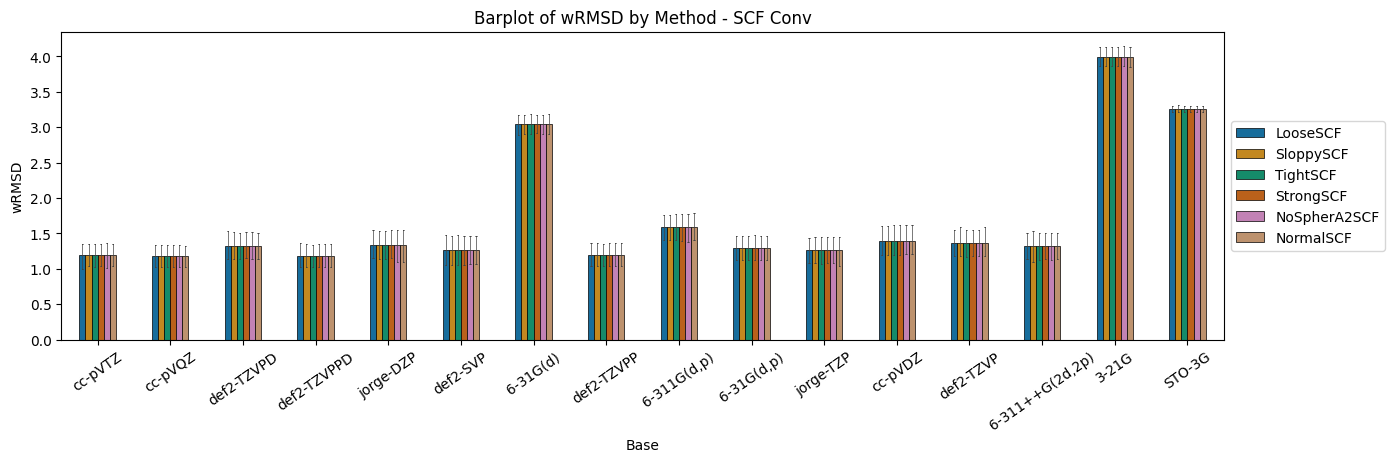

C:\Users\Daniel\AppData\Local\Temp\ipykernel_212624\1937141198.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.barplot(x='Base', y='wRMSD', hue = e ,data=data, width=0.5,


<Figure size 640x480 with 0 Axes>

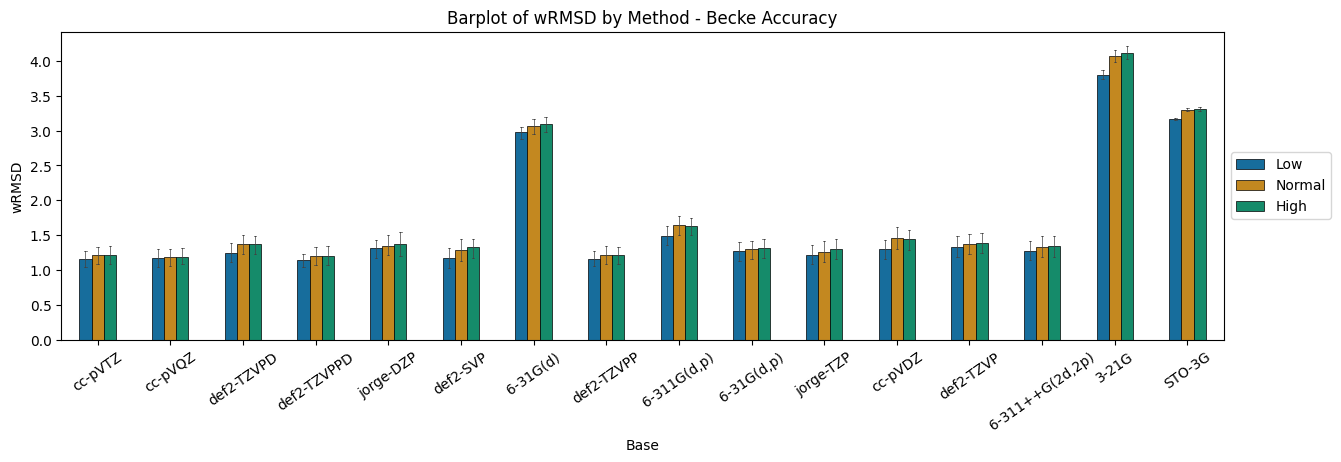

C:\Users\Daniel\AppData\Local\Temp\ipykernel_212624\1937141198.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.barplot(x='Base', y='wRMSD', hue = e ,data=data, width=0.5,


<Figure size 640x480 with 0 Axes>

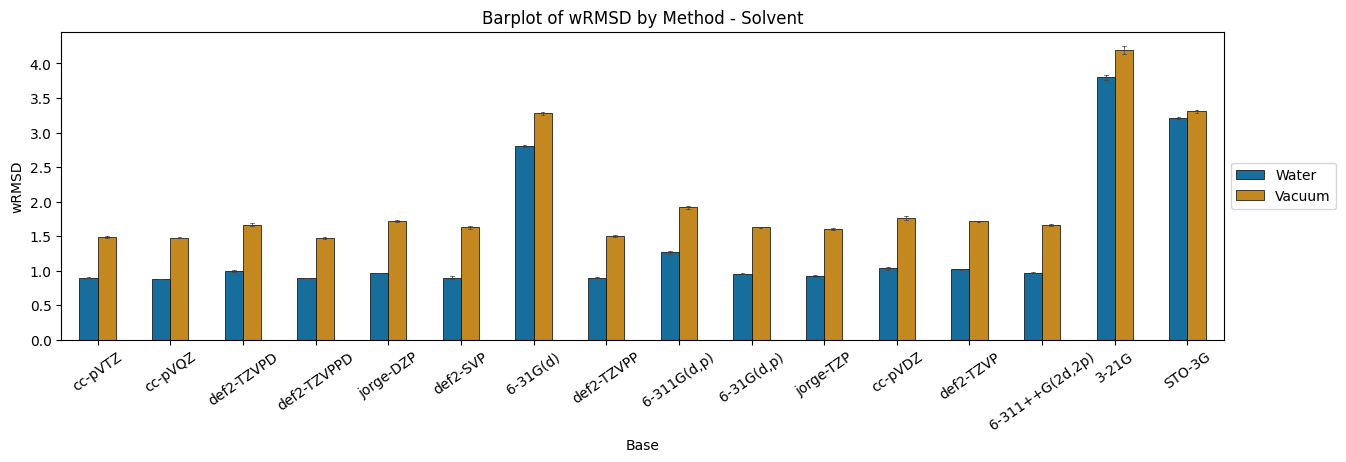

<Figure size 640x480 with 0 Axes>

In [26]:
Barplots(TyrDF.df)

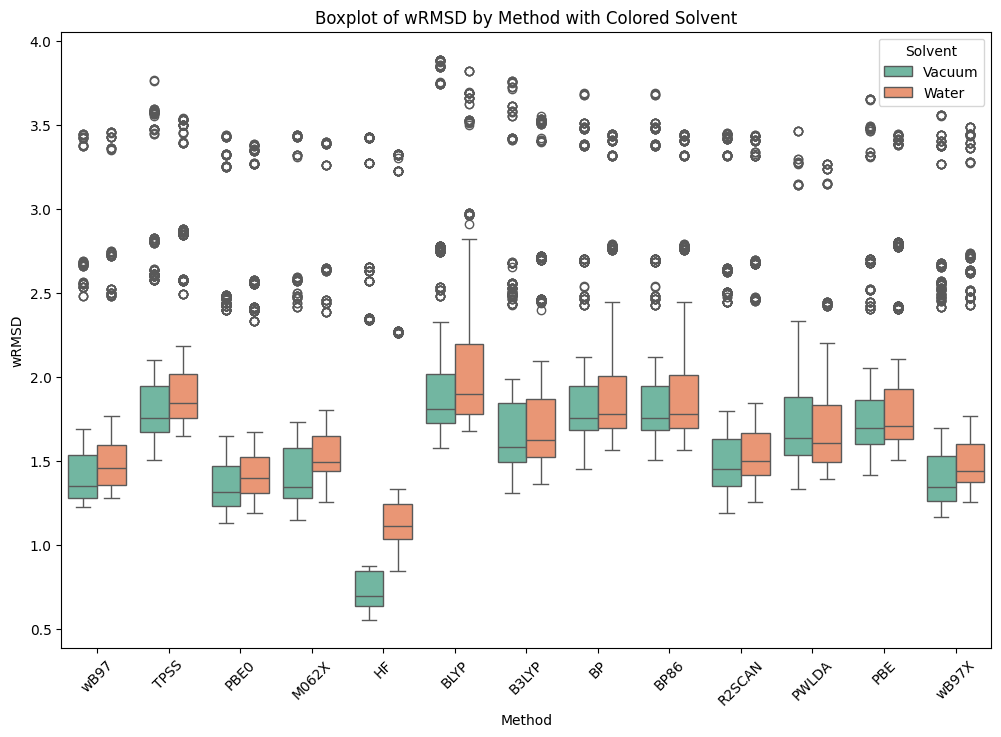

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Create the boxplot using seaborn with different colors for Solvent
sns.boxplot(x='Method', y='wRMSD', hue='Solvent', data=GluDF.df, palette='Set2')

plt.xlabel('Method')
plt.ylabel('wRMSD')
plt.title('Boxplot of wRMSD by Method with Colored Solvent')
plt.xticks(rotation=45)

plt.show()

In [28]:
#using pandas nlargest i will get the 20 best results within each dataframe in a table an compare them in a table
class table():
    def __init__(self, df):
        self.df = df
        self.df = df.copy()
        self.table()
        
    def table(self):
        self.df = self.df.nlargest(20, 'FOM')
        self.df = self.df[['Base', 'Method', 'Becke Accuracy','wRMSD', 'FOM']]
        print(self.df)
        self.df = self.df.nsmallest(20, 'wRMSD')
        self.df = self.df[['Base', 'Method', 'Becke Accuracy','wRMSD', 'FOM']]
        print(self.df)

In [29]:
table(TyrDF.df)

             Base Method Becke Accuracy     wRMSD       FOM
4577  6-311G(d,p)     HF         Normal  1.324537  2.630894
4578  6-311G(d,p)     HF         Normal  1.324537  2.630894
4601  6-311G(d,p)     HF         Normal  1.324537  2.630894
4602  6-311G(d,p)     HF         Normal  1.324537  2.630894
4575  6-311G(d,p)     HF         Normal  1.324461  2.630891
4599  6-311G(d,p)     HF         Normal  1.324461  2.630891
4576  6-311G(d,p)     HF         Normal  1.324462  2.630891
4600  6-311G(d,p)     HF         Normal  1.324462  2.630891
4598  6-311G(d,p)     HF         Normal  1.324389  2.630886
4574  6-311G(d,p)     HF         Normal  1.324389  2.630886
4573  6-311G(d,p)     HF         Normal  1.324388  2.630885
4597  6-311G(d,p)     HF         Normal  1.324388  2.630885
531     jorge-DZP     HF         Normal  1.728759  2.630121
506     jorge-DZP     HF         Normal  1.728759  2.630121
569     jorge-DZP     HF         Normal  1.728672  2.630099
565     jorge-DZP     HF         Normal 

In [31]:
CysDF.df.nsmallest(20, 'wRMSD')

wRMSD Data Method      Base Solvent Becke Accuracy      SCF Conv  \
9195  0.706786  Cys     HF  def2-SVP   Water            Low     SloppySCF   
9196  0.706786  Cys     HF  def2-SVP   Water            Low  NoSpherA2SCF   
9184  0.706786  Cys     HF  def2-SVP   Water            Low  NoSpherA2SCF   
9183  0.706786  Cys     HF  def2-SVP   Water            Low     SloppySCF   
9194  0.706786  Cys     HF  def2-SVP   Water            Low      LooseSCF   
9182  0.706786  Cys     HF  def2-SVP   Water            Low      LooseSCF   
9193  0.706819  Cys     HF  def2-SVP   Water            Low     NormalSCF   
9181  0.706819  Cys     HF  def2-SVP   Water            Low     NormalSCF   
9180  0.706866  Cys     HF  def2-SVP   Water            Low     StrongSCF   
9192  0.706866  Cys     HF  def2-SVP   Water            Low     StrongSCF   
9191  0.706870  Cys     HF  def2-SVP   Water            Low      TightSCF   
9179  0.706870  Cys     HF  def2-SVP   Water            Low      TightSCF   
5318  0.753325  Cys     HF  def2-SVP   Water         Normal     NormalSCF   
5306  0.753325  Cys     HF  def2-SVP   Water         Normal     NormalSCF   
5307  0.753333  Cys     HF  def2-SVP   Water         Normal      LooseSCF   
5319  0.753333  Cys     HF  def2-SVP   Water         Normal      LooseSCF   
5308  0.753333  Cys     HF  def2-SVP   Water         Normal     SloppySCF   
5320  0.753333  Cys     HF  def2-SVP   Water         Normal     SloppySCF   
5309  0.753333  Cys     HF  def2-SVP   Water         Normal  NoSpherA2SCF   
5321  0.753333  Cys     HF  def2-SVP   Water         Normal  NoSpherA2SCF   

       SCNL weight       FOM Nr. NPD                    R1  \
9195   True   True  1.510253       0  0.014310818013772302   
9196   True   True  1.510253       0  0.014310818013772283   
9184  False   True  1.510253       0  0.014310818013772294   
9183  False   True  1.510253       0   0.01431081801377228   
9194   True   True  1.510253       0  0.014310818046167578   
9182  False   True  1.510253       0  0.014310818046167646   
9193   True   True  1.510246       0  0.014310809046423324   
9181  False   True  1.510246       0  0.014310809046423335   
9180  False   True  1.510238       0   0.01431081274713582   
9192   True   True  1.510238       0  0.014310812747135868   
9191   True   True  1.510237       0  0.014310824242680598   
9179  False   True  1.510237       0  0.014310824242680613   
5318   True   True  1.578588       0  0.013422698327498024   
5306  False   True  1.578588       0   0.01342269832749802   
5307  False   True  1.578599       0  0.013422707318311423   
5319   True   True  1.578599       0  0.013422707318311397   
5308  False   True  1.578599       0  0.013422707441651962   
5320   True   True  1.578599       0   0.01342270744165193   
5309  False   True  1.578599       0   0.01342270744165195   
5321   True   True  1.578599       0   0.01342270744165189   

                       wR2    Goof             max_peak              max_hole  \
9195  0.034447243076632605   1.927  0.31412169003525287  -0.13500554114664234   
9196  0.034447243076601984   1.927   0.3141216900352417  -0.13500554114665106   
9184   0.03444724307658748   1.927    0.314121690035249  -0.13500554114664717   
9183   0.03444724307658426   1.927  0.31412169003525153   -0.1350055411466476   
9194  0.034447243389851744   1.927  0.31412169129832623   -0.1350055383877155   
9182   0.03444724338984369   1.927  0.31412169129834977  -0.13500553838770812   
9193  0.034447265594006383   1.927  0.31412337452445793  -0.13500635900172303   
9181   0.03444726559400316   1.927   0.3141233745244732  -0.13500635900171293   
9180   0.03444736870418653  1.9269  0.31412399459309714  -0.13500704720565532   
9192    0.0344473687041688  1.9269   0.3141239945931177    -0.135007047205646   
9191   0.03444743898868894  1.9269  0.31412276572973036  -0.13500723461683373   
9179    0.0344474389886696  1.9269    0.314122765729743  -0.13500723461682704   
5318  0.032510029997895235  1.8243 

From here starts the results & discussion part_ first the single parametres are investigated

In [807]:
import os
class Result_neu():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)   
        self.plot() 
    
    def plot(self):
        fig, axs = plt.subplots(3, 5, figsize=(9, 7), sharey=True, sharex=False)
        fig.delaxes(axs[2,4])
        fig.delaxes(axs[2,3]) # to delete the last subplot
        fig.tight_layout(pad=1.9)
        fig.subplots_adjust(wspace=0.05)
        fig.subplots_adjust(hspace=0.6)

        for ax, file in zip(axs.flat, self.dfs):
            df = pd.read_feather(os.path.join(self.directory, file))
            df_water = df.loc[(df['Solvent'] == 'Water')]
            df_vacuum = df.loc[(df['Solvent'] == 'Vacuum')]
        
            mean_water, std_water = df_water['wRMSD'].mean(), df_water['wRMSD'].std() / 2
            mean_vacuum, std_vacuum = df_vacuum['wRMSD'].mean(), df_vacuum['wRMSD'].std() / 2
            mean_tot = df['wRMSD'].mean()

            a = ax.errorbar([mean_water, mean_vacuum],[1.3, 1.7],  xerr=[std_water, std_vacuum], fmt='o', label='wRMSD', color='k', capsize=4)
            c = ax.vlines(mean_tot, 0.5, 2.5, colors='r', linestyles='dashed', label='Mean')

            
            plt.rcParams['axes.titley'] = 1.0 
            ax.set_title(f'{file.split("_")[0]}', loc='right')

            ax.set_yticks([1.25, 1.65])
            ax.set_ylim(1.1, 1.9)
            ax.set_yticklabels(['Water', 'Vacuum'])
            ax.tick_params(axis="y", which="both", left=False, right=False, labelrotation=45)

            ax.tick_params(axis="x", labelsize=9)
            ax.set_xticks([mean_tot-( (mean_tot - ax.get_xlim()[0])/ 2), mean_tot, mean_tot+( (ax.get_xlim()[1] - mean_tot)/ 2)])
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
            ax.set_xlabel('wRMSD', fontsize=9)

            mean_water_1, std_water_1 = df_water['FOM'].mean(), df_water['FOM'].std() / 2
            mean_vacuum_1, std_vacuum_1 = df_vacuum['FOM'].mean(), df_vacuum['FOM'].std() / 2
            L_tot_1 = df['FOM'].tolist()
            mean_tot_1 = np.mean(L_tot_1)

        
            ax_new=ax.twiny()
            #ax_new.set_xlim(ax.get_xlim())
            b = ax_new.errorbar([mean_water_1, mean_vacuum_1],[1.2, 1.6], xerr=[std_water_1, std_vacuum_1], fmt='s', label='FOM', color='k', capsize=4)
            
            ax_new.set_xlabel('FOM', fontsize=9)
            ax_new.tick_params(axis="x", labelsize=9)
            ax_new.set_xticks([mean_tot_1-( (mean_tot_1 - ax_new.get_xlim()[0])/ 2), mean_tot_1, mean_tot_1+( (ax_new.get_xlim()[1] - mean_tot_1)/ 2)])
            ax_new.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))	

            #ax_new.vlines(mean_tot_1, 0.5, 2.5, colors='blue', linestyles='dashed', label='Total Mean')
            
        fig.legend(handles=[a,b,c], bbox_to_anchor=(0.67, 1.07), ncol=3)
            

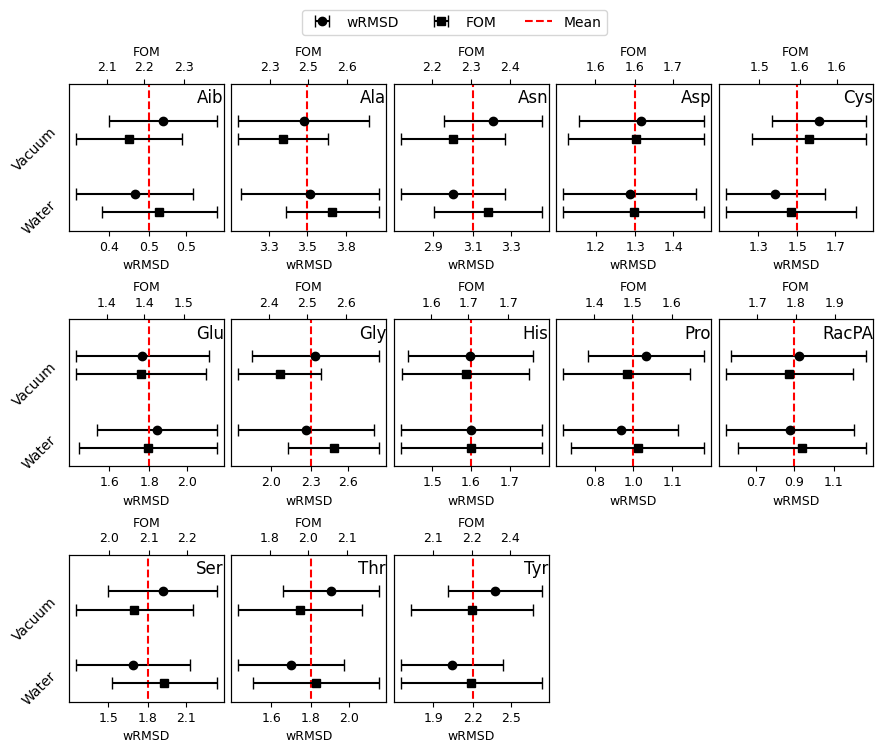

In [808]:
Result_neu(".\\Feather_raw")

In [1231]:
import os
class Result_neu_ba():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)   
        self.Parameter = ['Base', 'SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent']
        self.figsize = (9, 7)

    def mean_reader(self, df, Parameter):
        p_list = list(set(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        FOM_res = []
        wRMSD = []
        for i in p_list:
            wRMSD.append([df.loc[(df[Parameter] == i)]['wRMSD'].mean(), df.loc[(df[Parameter] == i)]['wRMSD'].std() / 2, i])
            FOM_res.append([df.loc[(df[Parameter] == i)]['FOM'].mean(), df.loc[(df[Parameter] == i)]['FOM'].std() / 2, i])
        return wRMSD, FOM_res
        
    
    def plot(self, Parameter, figsize=(9, 7)):
        fig, axs = plt.subplots(3, 5, figsize=figsize, sharey=True, sharex=False)
        fig.delaxes(axs[2,4])
        fig.delaxes(axs[2,3]) # to delete the last subplot
        fig.tight_layout(pad=1.9)
        fig.subplots_adjust(wspace=0.05)
        fig.subplots_adjust(hspace=0.6)
        
        for ax, file in zip(axs.flat, self.dfs):
            df = pd.read_feather(os.path.join(self.directory, file))

            wRMSD, FOM = self.mean_reader(df, Parameter)
            yticks = np.linspace(1, 3, len(wRMSD))
            if len(wRMSD) == 2:
                yticks = np.array([1.3, 2.5])
            a = ax.errorbar([wRMSD[i][0] for i in range(len(wRMSD))], yticks,  xerr=[wRMSD[i][1] for i in range(len(wRMSD))], fmt='o', label='wRMSD', color='blue', capsize=4)
            #a = ax.errorbar([wRMSD[0][0], wRMSD[1][0], wRMSD[2][0]],[1.3, 1.7, 2.1],  xerr=[wRMSD[0][1], wRMSD[1][1], wRMSD[2][1]], fmt='o', label='wRMSD', color='k', capsize=4)
            mean_tot = df['wRMSD'].mean()
            c = ax.vlines(mean_tot, 0.5, 3.7, colors='r', linestyles='dashed', label='Mean')
            
            
            plt.rcParams['axes.titley'] = 1.0 
            ax.set_title(f'{file.split("_")[0]}', loc='right')

            ax.set_yticks(yticks)
            ax.set_ylim(0.7, 3.8)
            ax.set_yticklabels([wRMSD[i][2] for i in range(len(wRMSD))])
            ax.tick_params(axis="y", which="both", left=False, right=False, labelrotation=45)

            ax.tick_params(axis="x", labelsize=9)
            ax.set_xlim(ax.get_xlim()[1],ax.get_xlim()[0])
            ax.set_xticks([mean_tot-( (mean_tot - ax.get_xlim()[0])/ 2), mean_tot, mean_tot+( (ax.get_xlim()[1] - mean_tot)/ 2)])
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
            ax.set_xlabel('wRMSD', fontsize=9)

            mean_tot_1 = df['FOM'].mean()


            ax_new=ax.twiny()
            b = ax_new.errorbar([FOM[i][0] for i in range(len(FOM))], yticks + 0.26, xerr=[FOM[i][1] for i in range(len(FOM))], fmt='s', label='FOM', color='orange', capsize=4)

            ax_new.set_xlabel('FOM', fontsize=9)
            ax_new.tick_params(axis="x", labelsize=9)
            ax_new.set_xticks([mean_tot_1-( (mean_tot_1 - ax_new.get_xlim()[0])/ 2), mean_tot_1, mean_tot_1+( (ax_new.get_xlim()[1] - mean_tot_1)/ 2)])
            ax_new.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))	

            #ax_new.vlines(mean_tot_1, 0.5, 2.5, colors='blue', linestyles='dashed', label='Total Mean')
            
        fig.legend(handles=[a,b,c], bbox_to_anchor=(0.67, 1.07), ncol=3)
        #fig.savefig("SCF.png", dpi=600, bbox_inches='tight', pad_inches = 0)
            

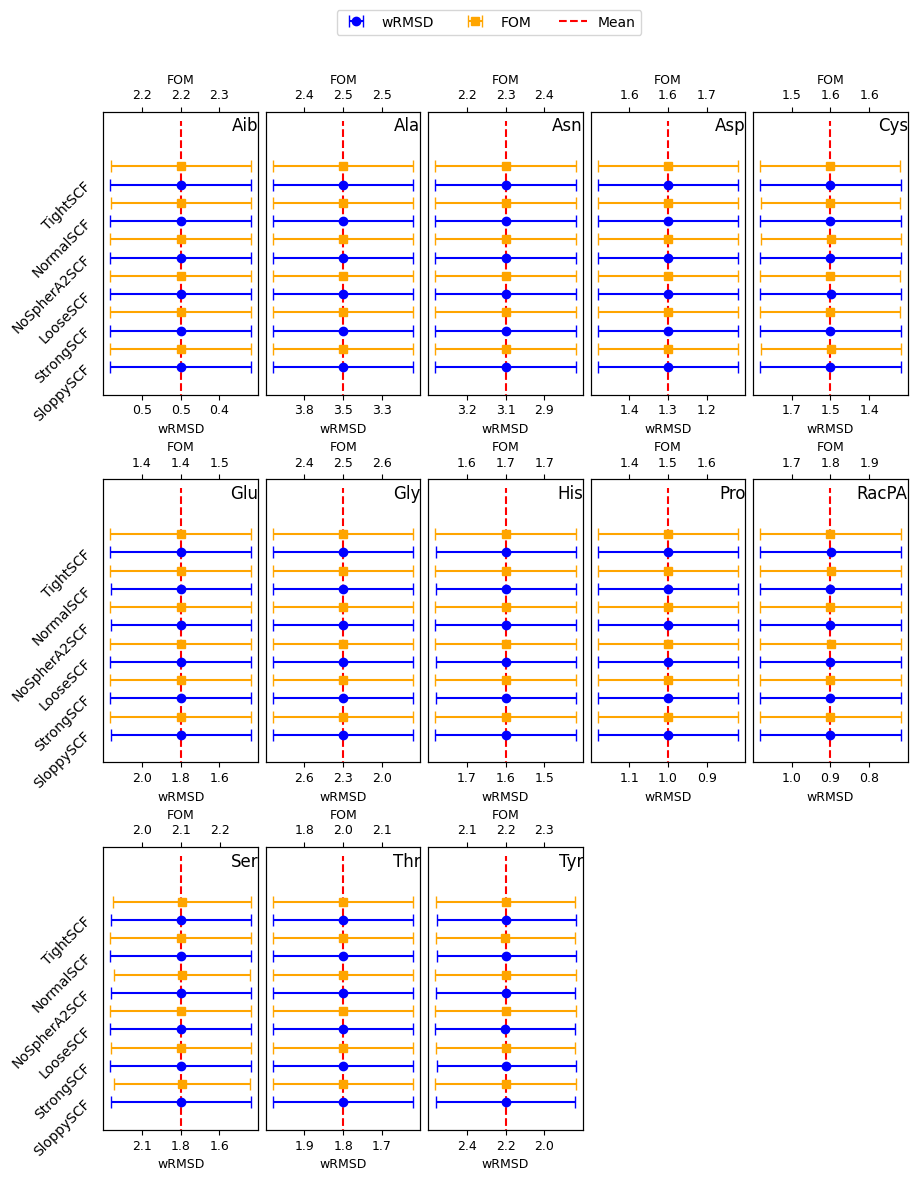

In [1232]:
Result_neu_ba(".\\Feather_raw").plot('Becke Accuracy')

In [1831]:
import os
class Result_neu_big():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)   
        self.Parameter = ['Base', 'SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent']

    def mean_reader(self, df, Parameter):
        p_list = list(set(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        FOM_res = []
        wRMSD = []
        for i in p_list:
            wRMSD.append([df.loc[(df[Parameter] == i)]['wRMSD'].mean(), df.loc[(df[Parameter] == i)]['wRMSD'].std() / 3, i])
            FOM_res.append([df.loc[(df[Parameter] == i)]['FOM'].mean(), df.loc[(df[Parameter] == i)]['FOM'].std() / 3, i])
        return wRMSD, FOM_res
        
    
    def plot(self, Parameter):
        fig, axs = plt.subplots(2, 7, figsize=(8, 10), sharey=True, sharex=False)
        fig.delaxes(axs[1,6])
        #fig.delaxes(axs[2,3]) # to delete the last subplot
        fig.tight_layout(pad=2.7)
        fig.subplots_adjust(wspace=0.034)
        fig.subplots_adjust(hspace=0.20)
        
        for ax, file in zip(axs.flat, self.dfs):
            df = pd.read_feather(os.path.join(self.directory, file))

            wRMSD, FOM = self.mean_reader(df, Parameter)
            yticks = np.linspace(1, 30, len(wRMSD))
            a = ax.errorbar([wRMSD[i][0] for i in range(len(wRMSD))], yticks,  xerr=[wRMSD[i][1] for i in range(len(wRMSD))], fmt='o', label='wRMSD', color='b', capsize=4)
            #a = ax.errorbar([wRMSD[0][0], wRMSD[1][0], wRMSD[2][0]],[1.3, 1.7, 2.1],  xerr=[wRMSD[0][1], wRMSD[1][1], wRMSD[2][1]], fmt='o', label='wRMSD', color='k', capsize=4)
            mean_tot = df['wRMSD'].mean()
            c = ax.vlines(mean_tot, 0.5, 37, colors='r', linestyles='dashed', label='Mean')
            
            

            plt.rcParams['axes.titley'] = 1.0 
            ax.set_title(f'{file.split("_")[0]}', loc='right', fontsize=12, pad=-11)

            ax.set_yticks(yticks)
            ax.set_ylim(0.5, 33)
            ax.set_yticklabels([wRMSD[i][2] for i in range(len(wRMSD))], rotation_mode="anchor")
            ax.tick_params(axis="y", which="both", left=False, right=False, labelrotation=45)

            ax.tick_params(axis="x", labelsize=9)
            ax.set_xlim(mean_tot*1.3,mean_tot*0.7)
            ax.set_xticks( [mean_tot+( (ax.get_xlim()[1] - mean_tot)/ 2), mean_tot, mean_tot-( (mean_tot - ax.get_xlim()[0])/ 2)] )
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
            ax.set_xlabel('wRMSD', fontsize=9)
           

            mean_tot_1 = df['FOM'].mean()


            ax_new=ax.twiny()
            b = ax_new.errorbar([FOM[i][0] for i in range(len(FOM))], yticks + 0.5, xerr=[FOM[i][1] for i in range(len(FOM))], fmt='s', label='FOM', color='orange', capsize=4)

            ax_new.set_xlabel('FOM', fontsize=9)
            ax_new.tick_params(axis="x", labelsize=9)
            ax_new.set_xlim(mean_tot_1*0.9,mean_tot_1*1.1)
            ax_new.set_xticks([mean_tot_1-( (mean_tot_1 - ax_new.get_xlim()[0])/ 2), mean_tot_1, mean_tot_1+( (ax_new.get_xlim()[1] - mean_tot_1)/ 2)])
            ax_new.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))	


            #ax_new.vlines(mean_tot_1, 0.5,35, colors='blue', linestyles='dashed', label='Total Mean')
            
        fig.legend(handles=[a,b,c], bbox_to_anchor=(0.67, 1.03), ncol=3)
        fig.savefig("Method_big.png", dpi=600, bbox_inches='tight', pad_inches = 0)
            

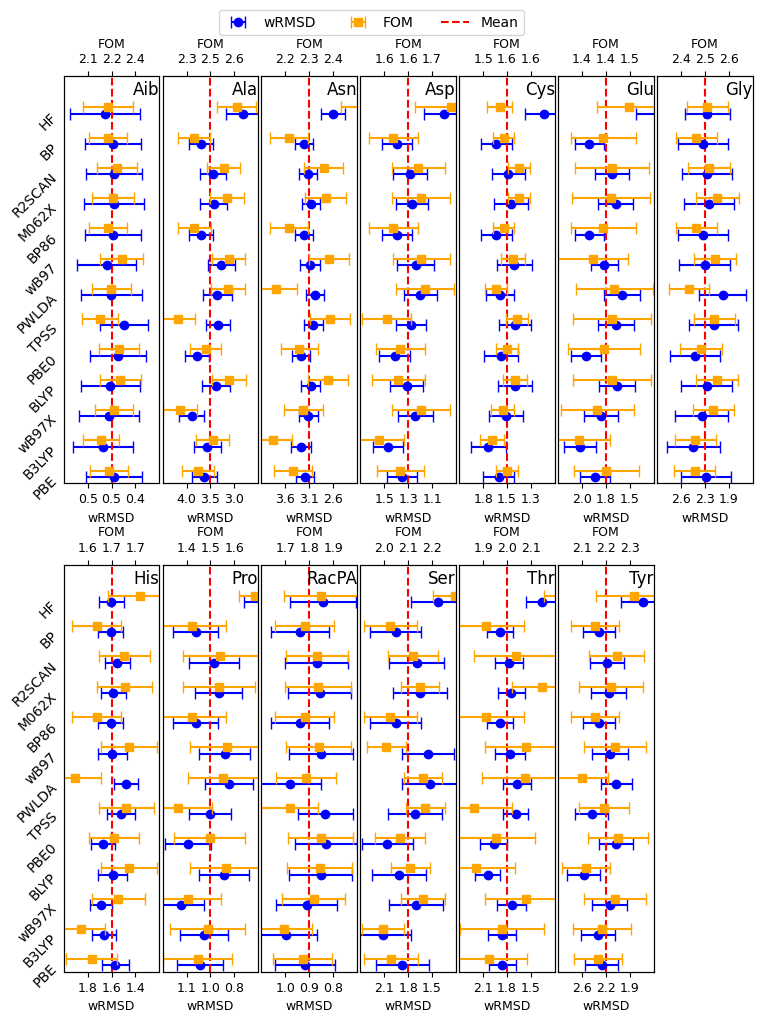

In [1832]:
Result_neu_big(".\\Feather_raw").plot('Method')

In [138]:
import os
class Result_neu_big():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)   
        self.Parameter = ['Base', 'SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent']

    def mean_reader(self, df, Parameter):
        p_list = list(set(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        FOM_res = []
        wRMSD = []
        for i in p_list:
            wRMSD.append([df.loc[(df[Parameter] == i)]['wRMSD'].mean(), df.loc[(df[Parameter] == i)]['wRMSD'].std(), i])
            FOM_res.append([df.loc[(df[Parameter] == i)]['FOM'].mean(), df.loc[(df[Parameter] == i)]['FOM'].std(), i])
        return wRMSD, FOM_res
        
    
    def plot(self, Parameter):
        fig, axs = plt.subplots(2, 7, figsize=(8, 10), sharey=True, sharex=False)
        fig.delaxes(axs[1,6])
        # fig.delaxes(axs[2,3]) # to delete the last subplot
        fig.tight_layout(pad=2.9)
        fig.subplots_adjust(wspace=0.034)
        fig.subplots_adjust(hspace=0.20)
        
        for ax, file in zip(axs.flat, self.dfs):
            df = pd.read_feather(os.path.join(self.directory, file))

            wRMSD, FOM = self.mean_reader(df, Parameter)
            yticks = np.linspace(1, 29, len(wRMSD))
            a = ax.errorbar([wRMSD[i][0] for i in range(len(wRMSD))], yticks,  xerr=[wRMSD[i][1] for i in range(len(wRMSD))], fmt='o', label='wRMSD', color='b', capsize=4,ms=5)
            #a = ax.errorbar([wRMSD[0][0], wRMSD[1][0], wRMSD[2][0]],[1.3, 1.7, 2.1],  xerr=[wRMSD[0][1], wRMSD[1][1], wRMSD[2][1]], fmt='o', label='wRMSD', color='k', capsize=4)
            mean_tot = df['wRMSD'].mean()
            c = ax.vlines(mean_tot, 0.5, 37, colors='r', linestyles='dashed', label='Mean')
            
            ##
            #ax.set_yticklabels([wRMSD[i][2] for i in range(len(wRMSD))], rotation_mode="anchor")
            ##

            plt.rcParams['axes.titley'] = 1.0 
            ax.set_title(f'{file.split("_")[0]}', loc='right',fontsize=12, pad=-11)

            ax.set_yticks(yticks)
            ax.set_ylim(0.5, 33)
            ax.set_yticklabels([wRMSD[i][2] for i in range(len(wRMSD))], rotation_mode="anchor")
            ax.tick_params(axis="y", which="both", left=False, right=False, labelrotation=45)

            ax.tick_params(axis="x", labelsize=9)
            ax.set_xlim(mean_tot*1.8,mean_tot*0.2)
            ax.set_xticks( [mean_tot+( (ax.get_xlim()[1] - mean_tot)/ 2), mean_tot, mean_tot-( (mean_tot - ax.get_xlim()[0])/ 2)] )
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
            ax.set_xlabel('wRMSD', fontsize=9)
           

            mean_tot_1 = df['FOM'].mean()


            ax_new=ax.twiny()
            b = ax_new.errorbar([FOM[i][0] for i in range(len(FOM))], yticks + 0.15, xerr=[FOM[i][1] for i in range(len(FOM))], fmt='s', label='FOM', color='orange', capsize=4,ms=5)

            ax_new.set_xlabel('FOM', fontsize=9)
            ax_new.tick_params(axis="x", labelsize=9)
            ax_new.set_xlim(mean_tot_1*0.1,mean_tot_1*1.9)
            ax_new.set_xticks([mean_tot_1-( (mean_tot_1 - ax_new.get_xlim()[0])/ 2), mean_tot_1, mean_tot_1+( (ax_new.get_xlim()[1] - mean_tot_1)/ 2)])
            ax_new.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))	


            #ax_new.vlines(mean_tot_1, 0.5,35, colors='blue', linestyles='dashed', label='Total Mean')
            
        fig.legend(handles=[a,b,c], bbox_to_anchor=(0.67, 1.03), ncol=3)
        #plt.savefig("Base_big.png", dpi=600, bbox_inches='tight', pad_inches = 0)
            

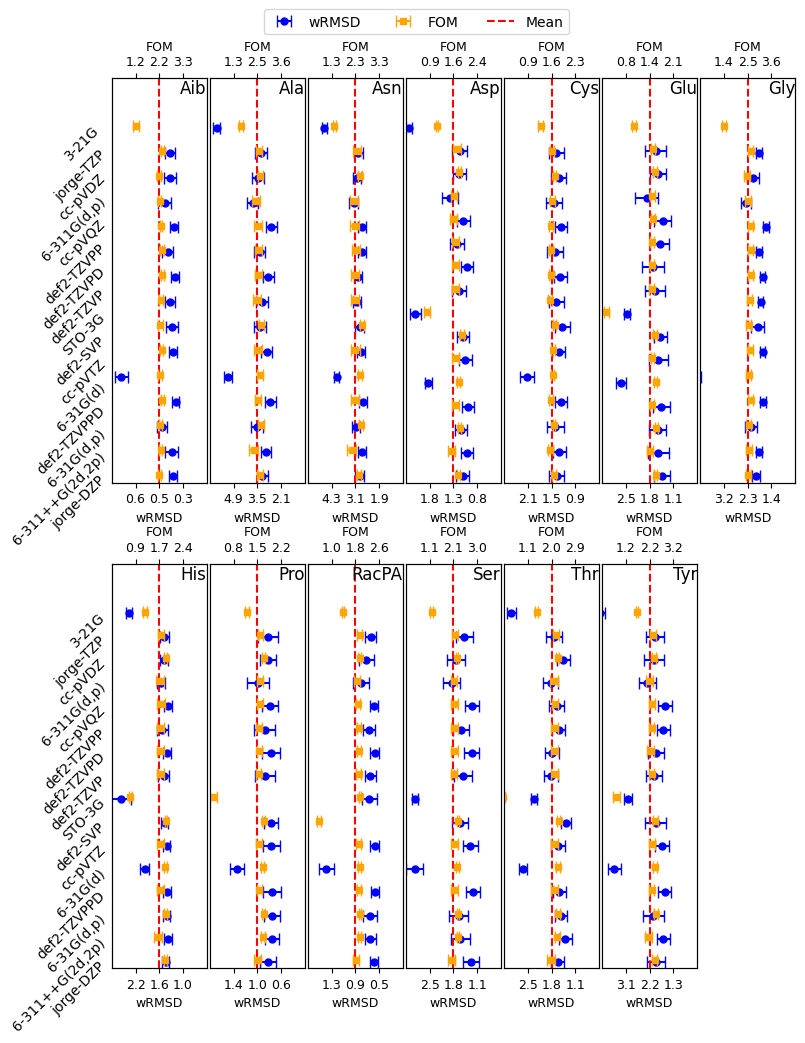

In [139]:
Result_neu_big(".\\Feather_raw").plot('Base')

In [1019]:
import os
class Result_neu_big_flat():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)   
        self.Parameter = ['Base', 'SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent', 'Method']

    def mean_reader(self, df, Parameter):
        p_list = list(set(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        FOM_res = []
        wRMSD = []
        for i in p_list:
            wRMSD.append([df.loc[(df[Parameter] == i)]['wRMSD'].mean(), df.loc[(df[Parameter] == i)]['wRMSD'].std() / 2, i])
            FOM_res.append([df.loc[(df[Parameter] == i)]['FOM'].mean(), df.loc[(df[Parameter] == i)]['FOM'].std() / 2, i])
        return wRMSD, FOM_res
        
    
    def plot(self, Parameter):
        fig, axs = plt.subplots(13, 1, figsize=(8, 10), sharey=False, sharex=True)
        fig.tight_layout(pad=1.9)
        fig.subplots_adjust(wspace=0.05)
        fig.subplots_adjust(hspace=0.0)
        
        for ax, file in zip(axs.flat, self.dfs):
            df = pd.read_feather(os.path.join(self.directory, file))

            wRMSD, FOM = self.mean_reader(df, Parameter)
            xticks = np.linspace(1, 30, len(wRMSD))
            a = ax.errorbar(xticks, [wRMSD[i][0] for i in range(len(wRMSD))], yerr=[wRMSD[i][1] for i in range(len(wRMSD))], fmt='o', label='wRMSD', color='b', capsize=4, ms=5, linewidth=0.5)
            #a = ax.errorbar([wRMSD[0][0], wRMSD[1][0], wRMSD[2][0]],[1.3, 1.7, 2.1],  xerr=[wRMSD[0][1], wRMSD[1][1], wRMSD[2][1]], fmt='o', label='wRMSD', color='k', capsize=4)
            mean_tot = df['wRMSD'].mean()
            c = ax.hlines(mean_tot, 0.5, 33, colors='r', linestyles='dashed', label='Mean')
            
            
            #plt.rcParams['axes.titlex'] = 1.0 
            ax.set_title(f'{file.split("_")[0]}', loc='right')

            ax.set_xticks(xticks)
            ax.set_xlim(0.5, 33)
            ax.set_xticklabels([wRMSD[i][2] for i in range(len(wRMSD))])
            ax.tick_params(axis="x", which="both", left=False, right=False, bottom=False,labelrotation=45)

            ax.tick_params(axis="y", labelsize=9)
            ax.set_ylim(mean_tot*1.4,mean_tot*0.6)
            ax.set_yticks([mean_tot-( (mean_tot - ax.get_ylim()[0])/ 2), mean_tot, mean_tot+( (ax.get_ylim()[1] - mean_tot)/ 2)])
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))
            ax.set_ylabel('wRMSD', fontsize=9)

            mean_tot_1 = df['FOM'].mean()


            ax_new = ax.twinx()
            b = ax_new.errorbar(xticks + 0.5, [FOM[i][0] for i in range(len(FOM))], yerr=[FOM[i][1] for i in range(len(FOM))], fmt='s', label='FOM', color='orange', capsize=4, ms=5, linewidth=0.5)

            ax_new.set_ylabel('FOM', fontsize=9)
            ax_new.tick_params(axis="y", labelsize=9)
            ax_new.set_ylim(mean_tot_1*0.9,mean_tot_1*1.1)
            ax_new.set_yticks([mean_tot_1-( (mean_tot_1 - ax_new.get_ylim()[0])/ 2), mean_tot_1, mean_tot_1+( (ax_new.get_ylim()[1] - mean_tot_1)/ 2)])
            ax_new.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))	

            #ax_new.vlines(mean_tot_1, 0.5, 2.5, colors='blue', linestyles='dashed', label='Total Mean')
            
        fig.legend(handles=[a,b,c], bbox_to_anchor=(0.7, 1.003), ncol=3)
        #fig.savefig("singlet_triplet.png", dpi=600, bbox_inches='tight', pad_inches = 0)

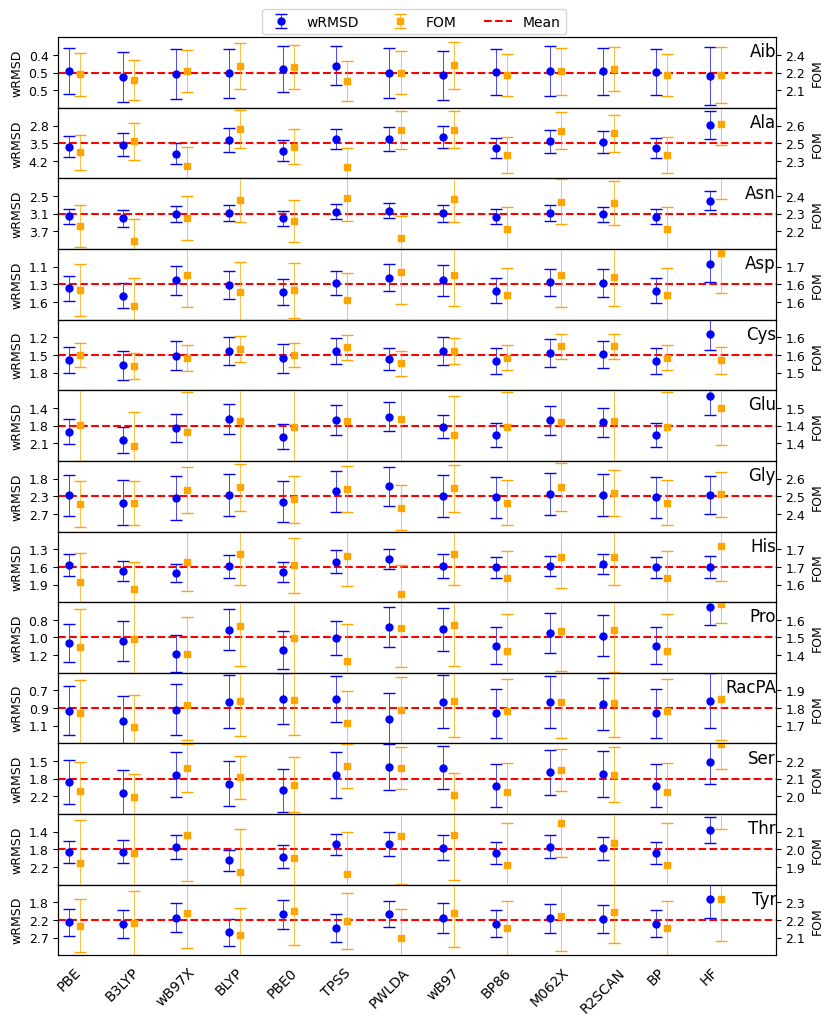

In [1020]:
Result_neu_big_flat(".\\Feather_raw").plot('Method')

In [1249]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import os
class Result_MDS():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)   
        self.Parameter = ['Base', 'SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent', 'Method']

    def mean_reader(self, df, Parameter):
        p_list = list(set(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        FOM_res_diff = []
        wRMSD_diff = []
        for i in p_list:
            wRMSD_diff.append([(  (df.loc[(df[Parameter] == i)]['wRMSD'].mean() - df['wRMSD'].mean()) / df['wRMSD'].mean()  )   , i])
            FOM_res_diff.append([(   (df.loc[(df[Parameter] == i)]['FOM'].mean() - df['FOM'].mean()) /  df['FOM'].mean()    )   , i])
        return wRMSD_diff, FOM_res_diff
    
    def plot(self, Parameter,figsize=(12, 5)):
        fig, axs = plt.subplots(1, 2, figsize=figsize)
        
        result_dict_wRMSD = {}
        result_dict_FOM = {}
        for file in self.dfs:
            df = pd.read_feather(os.path.join(self.directory, file))
            wRMSD, FOM = self.mean_reader(df, Parameter)
            for i, (Y, key) in enumerate(wRMSD):
                if key in result_dict_wRMSD:
                    result_dict_wRMSD[key].append(Y)
                else:
                    result_dict_wRMSD[key] = [Y]
            for i, (Y, key) in enumerate(FOM):
                if key in result_dict_FOM:
                    result_dict_FOM[key].append(Y)
                else:
                    result_dict_FOM[key] = [Y]
                 
        wRMSD_dataframe = pd.DataFrame(result_dict_wRMSD).transpose()
        FOM_dataframe = pd.DataFrame(result_dict_FOM).transpose()
        
        mds = MDS(random_state=0)
        scaled_df1 = mds.fit_transform(wRMSD_dataframe)
        scaled_df2 = mds.fit_transform(FOM_dataframe)

        for i, txt in enumerate(wRMSD_dataframe.index):
            if txt == 'wB97X' :
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.1, scaled_df1[:,1][i]+0.1) ,size=10, arrowprops = dict(  arrowstyle="-",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'wB97':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.2, scaled_df1[:,1][i]+0.05) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            else:
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]+0.05, scaled_df1[:,1][i]+0.01),size=10, arrowprops = dict(  arrowstyle="-",
                        connectionstyle="angle3,angleA=0,angleB=-90"))

            if txt == 'R2SCAN':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]-0.02, scaled_df2[:,1][i]-0.023),size=10, arrowprops = dict(  arrowstyle="-",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
            else:
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.015, scaled_df2[:,1][i]-0.013),size=10, arrowprops = dict(  arrowstyle="-",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
        
        axs[0].scatter(scaled_df1[:,0], scaled_df1[:,1], s=100, color = 'b', edgecolors='k')
        axs[0].vlines(0, -0.6, 0.5, colors='grey', linestyles='-',alpha=0.5)
        axs[0].hlines(0, -0.6, 0.5, colors='grey', linestyles='-',alpha=0.5)
        axs[0].set_ylim(-0.6, 0.5)
        axs[0].set_xlim(-0.6, 0.5)
        axs[0].set_title('wRMSD')
        axs[0].set_xlabel('Dimension I')
        axs[0].set_ylabel('Dimension II')
        axs[1].scatter(scaled_df2[:,0], scaled_df2[:,1], s=100, color = 'orange', edgecolors='k')
        axs[1].vlines(0, -0.6, 0.5, colors='grey', linestyles='-',alpha=0.5)
        axs[1].hlines(0, -0.6, 0.5, colors='grey', linestyles='-',alpha=0.5)
        axs[1].set_ylim(-0.09, 0.1)
        axs[1].set_xlim(-0.2, 0.3)
        axs[1].set_title('FOM')
        axs[1].set_xlabel('Dimension I')
        axs[1].set_ylabel('Dimension II')
        fig.savefig("MDS_method.png", dpi=600, bbox_inches='tight', pad_inches = 0)

C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom diss

PBE
BLYP
B3LYP
wB97X
PBE0
PWLDA
TPSS
wB97
BP86
M062X
R2SCAN
BP
HF


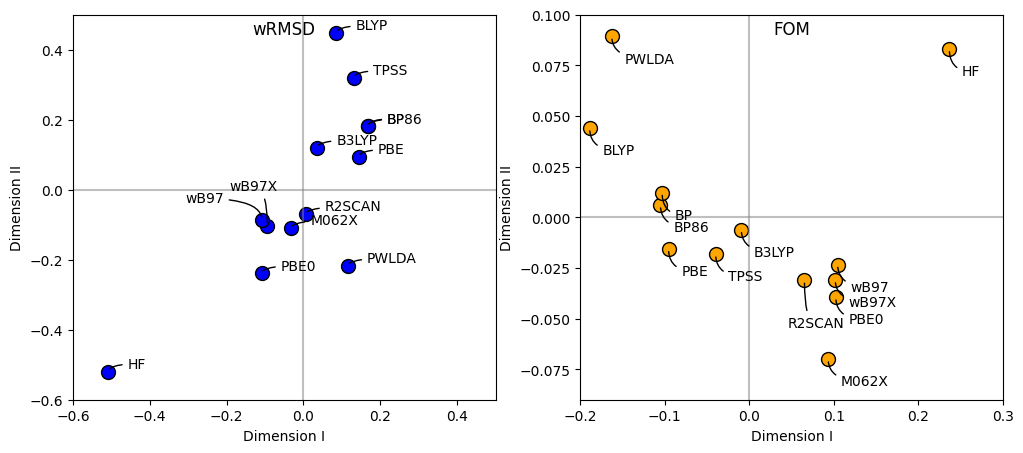

In [1250]:
a = Result_MDS(".\\Feather_raw").plot('Method')


In [1416]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import os
class Result_MDS():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)   
        self.Parameter = ['Base', 'SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent', 'Method']

    def mean_reader(self, df, Parameter):
        p_list = list(set(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        if Parameter == 'Base':
            p_list = ['3-21G', '6-31G(d)', '6-31G(d,p)', '6-311G(d,p)', '6-311++G(2d,2p)', 'cc-pVDZ', 'cc-pVTZ', 'cc-pVQZ', 'def2-SVP', 'def2-TZVP', 'def2-TZVPD', 'def2-TZVPP', 'def2-TZVPPD', 'jorge-DZP', 'jorge-TZP']
        FOM_res_diff = []
        wRMSD_diff = []
        for i in p_list:
            wRMSD_diff.append([(  (df.loc[(df[Parameter] == i)]['wRMSD'].mean() - df['wRMSD'].mean()) / df['wRMSD'].mean()  )   , i])
            FOM_res_diff.append([(   (df.loc[(df[Parameter] == i)]['FOM'].mean() - df['FOM'].mean()) /  df['FOM'].mean()    )   , i])
        return wRMSD_diff, FOM_res_diff
    
    def plot(self, Parameter,figsize=(12, 5)):
        fig, axs = plt.subplots(1, 2, figsize=figsize)
        
        result_dict_wRMSD = {}
        result_dict_FOM = {}
        for file in self.dfs:
            df = pd.read_feather(os.path.join(self.directory, file))
            wRMSD, FOM = self.mean_reader(df, Parameter)
            for i, (Y, key) in enumerate(wRMSD):
                if key in result_dict_wRMSD:
                    result_dict_wRMSD[key].append(Y)
                else:
                    result_dict_wRMSD[key] = [Y]
            for i, (Y, key) in enumerate(FOM):
                if key in result_dict_FOM:
                    result_dict_FOM[key].append(Y)
                else:
                    result_dict_FOM[key] = [Y]
                 
        wRMSD_dataframe = pd.DataFrame(result_dict_wRMSD).transpose()
        FOM_dataframe = pd.DataFrame(result_dict_FOM).transpose()
        
        mds = MDS(random_state=0)
        scaled_df1 = mds.fit_transform(wRMSD_dataframe)
        scaled_df2 = mds.fit_transform(FOM_dataframe)

        for i, txt in enumerate(wRMSD_dataframe.index): # -links +rechts
            if txt == '6-31G(d)' or txt =='3-21G':
                axs[0].annotate(txt, (scaled_df1[:,0][i]+0.1, scaled_df1[:,1][i]+0.05 ),  xytext = (0,0) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPP' or txt == 'def2-TZVPPD':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.09, scaled_df1[:,1][i]-0.25) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'jorge-TZP':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]+0.15, scaled_df1[:,1][i]+0.12) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPD':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]+0.1, scaled_df1[:,1][i]+0.12) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVDZ':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.09, scaled_df1[:,1][i]+0.15) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == '6-31G(d,p)':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.2, scaled_df1[:,1][i]+0.1) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'jorge-DZP':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.01, scaled_df1[:,1][i]-0.11) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-SVP':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.2, scaled_df1[:,1][i]-0.17) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVQZ':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]+0.05, scaled_df1[:,1][i]-0.17) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVTZ':
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.13, scaled_df1[:,1][i]+0.09) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            else:
                axs[0].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.09, scaled_df1[:,1][i]+0.1),size=10, arrowprops = dict(  arrowstyle="-",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
#############################################################################################################################################################
            if txt =='3-21G':
                axs[1].annotate(txt, (scaled_df2[:,0][i]+0.1, scaled_df2[:,1][i]+0.05 ),  xytext = (0,0) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPPD':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.03, scaled_df2[:,1][i]+0.05) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPP':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.03, scaled_df2[:,1][i]+0.02) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'jorge-TZP':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.07, scaled_df2[:,1][i]-0.01) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPD':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.02, scaled_df2[:,1][i]+0.06) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVDZ':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.04, scaled_df2[:,1][i]-0.03) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVP':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.05, scaled_df2[:,1][i]+0.03) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == '6-31G(d,p)':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.04, scaled_df2[:,1][i]-0.03) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'jorge-DZP':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.02, scaled_df2[:,1][i]+0.03) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == '6-31G(d)':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.02, scaled_df2[:,1][i]+0.09) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-SVP':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.02, scaled_df2[:,1][i]+0.02) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVQZ':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.05, scaled_df2[:,1][i]-0.04) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVTZ':
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.04, scaled_df2[:,1][i]+0.01) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            else:
                axs[1].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.03, scaled_df2[:,1][i]-0.05),size=10, arrowprops = dict(  arrowstyle="-",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
        axs[0].scatter(scaled_df1[:,0], scaled_df1[:,1], s=70, color = 'b', edgecolors='k')
        axs[0].vlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[0].hlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[0].set_ylim(-1, 0.5)
        axs[0].set_xlim(-0.5, 0.7)
        axs[0].set_title('wRMSD')
        axs[0].set_xlabel('Dimension I')
        axs[0].set_ylabel('Dimension II')
        axs[1].scatter(scaled_df2[:,0], scaled_df2[:,1], s=70, color = 'orange', edgecolors='k')
        axs[1].vlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[1].hlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[1].set_ylim(-0.3, 0.2)
        axs[1].set_xlim(-0.2, 0.5)
        axs[1].set_title('FOM')
        axs[1].set_xlabel('Dimension I')
        axs[1].set_ylabel('Dimension II')
        fig.savefig("MDS_base.png", dpi=600, bbox_inches='tight', pad_inches = 0)

C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


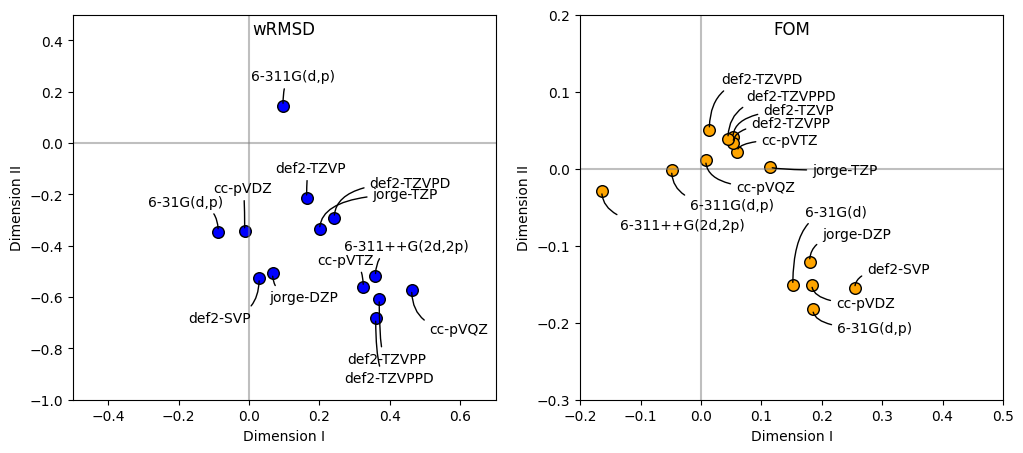

In [1417]:
a = Result_MDS(".\\Feather_raw").plot('Base')

In [1463]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import os
class Result_MDS():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)   
        self.Parameter = ['Base', 'SCNL', 'SCF Conv', 'Becke Accuracy', 'Solvent', 'Method']

    def mean_reader(self, df, Parameter):
        p_list = list(set(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        if Parameter == 'Base':
            p_list = ['3-21G', '6-31G(d)', '6-31G(d,p)', '6-311G(d,p)', '6-311++G(2d,2p)', 'cc-pVDZ', 'cc-pVTZ', 'cc-pVQZ', 'def2-SVP', 'def2-TZVP', 'def2-TZVPD', 'def2-TZVPP', 'def2-TZVPPD', 'jorge-DZP', 'jorge-TZP']
        FOM_res_diff = []
        wRMSD_diff = []
        for i in p_list:
            wRMSD_diff.append([(  (df.loc[(df[Parameter] == i)]['wRMSD'].mean() - df['wRMSD'].mean()) / df['wRMSD'].mean()  )   , i])
            FOM_res_diff.append([(   (df.loc[(df[Parameter] == i)]['FOM'].mean() - df['FOM'].mean()) /  df['FOM'].mean()    )   , i])
        return wRMSD_diff, FOM_res_diff
    
    def plot(self, Parameter,figsize=(12, 7)):
        fig, axs = plt.subplots(2, 2,gridspec_kw={'height_ratios': [1, 2]}, figsize=figsize)
        axs = axs.flatten()
        
        result_dict_wRMSD = {}
        result_dict_FOM = {}
        for file in self.dfs:
            df = pd.read_feather(os.path.join(self.directory, file))
            wRMSD, FOM = self.mean_reader(df, Parameter)
            for i, (Y, key) in enumerate(wRMSD):
                if key in result_dict_wRMSD:
                    result_dict_wRMSD[key].append(Y)
                else:
                    result_dict_wRMSD[key] = [Y]
            for i, (Y, key) in enumerate(FOM):
                if key in result_dict_FOM:
                    result_dict_FOM[key].append(Y)
                else:
                    result_dict_FOM[key] = [Y]
                 
        wRMSD_dataframe = pd.DataFrame(result_dict_wRMSD).transpose()
        FOM_dataframe = pd.DataFrame(result_dict_FOM).transpose()
        
        mds = MDS(random_state=0)
        scaled_df1 = mds.fit_transform(wRMSD_dataframe)
        scaled_df2 = mds.fit_transform(FOM_dataframe)

        for i, txt in enumerate(wRMSD_dataframe.index): # -links +rechts
            if txt == '6-31G(d)' or txt =='3-21G':
                axs[0].annotate(txt, (scaled_df1[:,0][i]+0.1, scaled_df1[:,1][i]+0.05 ) ,size=10)
#############################################################################################################################################################
            if txt =='3-21G':
                axs[1].annotate(txt, (scaled_df2[:,0][i]+0.05, scaled_df2[:,1][i]-0.05),size=10)
            if txt == '6-31G(d)' or txt =='3-21G':
                axs[2].annotate(txt, (scaled_df1[:,0][i]+0.1, scaled_df1[:,1][i]+0.05 ),  xytext = (0,0) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPP' or txt == 'def2-TZVPPD':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.09, scaled_df1[:,1][i]-0.25) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'jorge-TZP':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]+0.15, scaled_df1[:,1][i]+0.12) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPD':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]+0.1, scaled_df1[:,1][i]+0.12) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVDZ':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.09, scaled_df1[:,1][i]+0.15) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == '6-31G(d,p)':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.2, scaled_df1[:,1][i]+0.1) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'jorge-DZP':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.01, scaled_df1[:,1][i]-0.11) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-SVP':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.2, scaled_df1[:,1][i]-0.17) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVQZ':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]+0.05, scaled_df1[:,1][i]-0.17) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVTZ':
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.13, scaled_df1[:,1][i]+0.09) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            else:
                axs[2].annotate(txt, (scaled_df1[:,0][i], scaled_df1[:,1][i]), xytext = (scaled_df1[:,0][i]-0.09, scaled_df1[:,1][i]+0.1),size=10, arrowprops = dict(  arrowstyle="-",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
#############################################################################################################################################################
            if txt =='3-21G':
                axs[3].annotate(txt, (scaled_df2[:,0][i]+0.1, scaled_df2[:,1][i]+0.05 ),  xytext = (0,0) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPPD':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.03, scaled_df2[:,1][i]+0.05) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPP':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.03, scaled_df2[:,1][i]+0.02) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'jorge-TZP':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.07, scaled_df2[:,1][i]-0.01) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVPD':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.02, scaled_df2[:,1][i]+0.06) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVDZ':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.04, scaled_df2[:,1][i]-0.03) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-TZVP':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.05, scaled_df2[:,1][i]+0.03) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == '6-31G(d,p)':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.04, scaled_df2[:,1][i]-0.03) ,size=10, arrowprops = dict(  arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'jorge-DZP':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.02, scaled_df2[:,1][i]+0.03) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == '6-31G(d)':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.02, scaled_df2[:,1][i]+0.09) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'def2-SVP':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.02, scaled_df2[:,1][i]+0.02) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVQZ':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.05, scaled_df2[:,1][i]-0.04) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            elif txt == 'cc-pVTZ':
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.04, scaled_df2[:,1][i]+0.01) ,size=10, arrowprops = dict(  arrowstyle="-",
                connectionstyle="angle3,angleA=0,angleB=-90"))
            else:
                axs[3].annotate(txt, (scaled_df2[:,0][i], scaled_df2[:,1][i]), xytext = (scaled_df2[:,0][i]+0.03, scaled_df2[:,1][i]-0.05),size=10, arrowprops = dict(  arrowstyle="-",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
        axs[0].scatter(scaled_df1[:,0], scaled_df1[:,1], s=70, color = 'b', edgecolors='k')
        axs[0].vlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[0].hlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[0].hlines(0.5, -0.5, 0.7, colors='k', linestyles='-',alpha=0.5)
        axs[0].vlines(0.7, -1, 0.5, colors='k', linestyles='-',alpha=0.5)
        axs[0].vlines(-0.5, -1, 0.5, colors='k', linestyles='-',alpha=0.5)
        axs[0].hlines(-1, -0.5, 0.7, colors='k', linestyles='-',alpha=0.5)
        axs[0].set_ylim(-1.2, 4.5)
        axs[0].set_xlim(-2.3, 0.72)
        axs[0].set_title('wRMSD')
        axs[0].set_xlabel('Dimension I')
        axs[0].set_ylabel('Dimension II')
        axs[1].scatter(scaled_df2[:,0], scaled_df2[:,1], s=70, color = 'orange', edgecolors='k')
        axs[1].vlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[1].hlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[1].hlines(0.2, -0.2, 0.4, colors='k', linestyles='-',alpha=0.5)
        axs[1].vlines(0.4, -0.3, 0.2, colors='k', linestyles='-',alpha=0.5)
        axs[1].vlines(-0.2, -0.3, 0.2, colors='k', linestyles='-',alpha=0.5)
        axs[1].hlines(-0.3, -0.2, 0.4, colors='k', linestyles='-',alpha=0.5)

        axs[1].set_ylim(-0.32, 0.65)
        axs[1].set_xlim(-1.2, 0.5)
        axs[1].set_title('FOM')
        axs[1].set_xlabel('Dimension I')
        axs[1].set_ylabel('Dimension II')
        axs[2].scatter(scaled_df1[:,0], scaled_df1[:,1], s=70, color = 'b', edgecolors='k')
        axs[2].vlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[2].hlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[2].set_ylim(-1, 0.5)
        axs[2].set_xlim(-0.5, 0.7)
        axs[2].set_title('wRMSD')
        axs[2].set_xlabel('Dimension I')
        axs[2].set_ylabel('Dimension II')
        axs[3].scatter(scaled_df2[:,0], scaled_df2[:,1], s=70, color = 'orange', edgecolors='k')
        axs[3].vlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[3].hlines(0, -10, 10, colors='grey', linestyles='-',alpha=0.5)
        axs[3].set_ylim(-0.3, 0.2)
        axs[3].set_xlim(-0.2, 0.4)
        axs[3].set_title('FOM')
        axs[3].set_xlabel('Dimension I')
        axs[3].set_ylabel('Dimension II')
        fig.savefig("MDS_test.png", dpi=600, bbox_inches='tight', pad_inches = 0)

C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


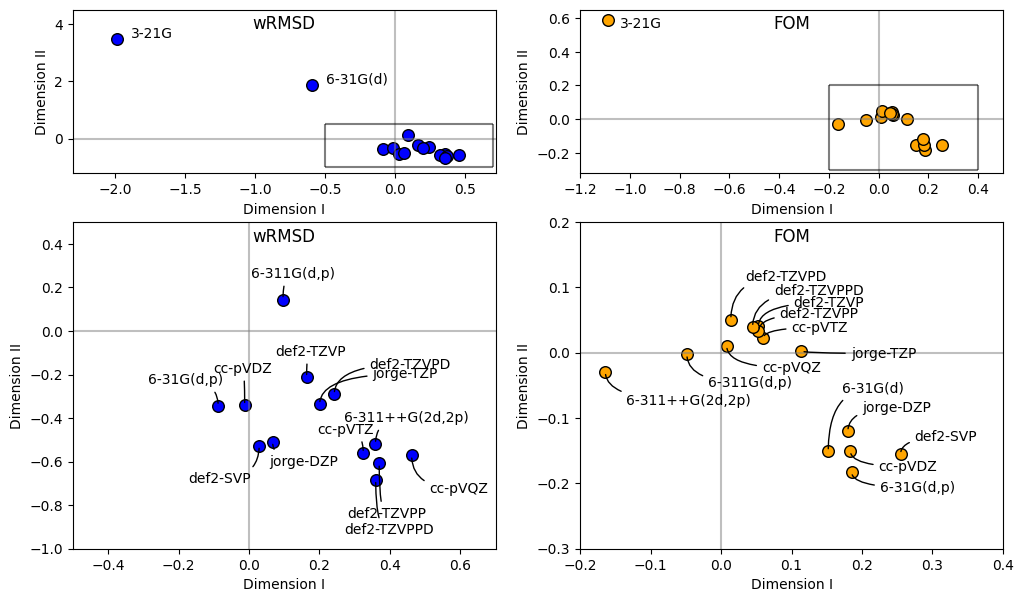

In [1464]:
a = Result_MDS(".\\Feather_raw").plot('Base')

In [4]:
from ordered_set import OrderedSet
from matplotlib import cm
class Result_2Dplot():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)


    def mean_reader(self, df, Parameter):
        p_list = list(OrderedSet(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        FOM_res_diff = []
        wRMSD_diff = []
        for i in p_list:
            wRMSD_diff.append([(  (df.loc[(df[Parameter] == i)]['wRMSD'].mean() - df['wRMSD'].mean()) / df['wRMSD'].mean()  )   , i])
            FOM_res_diff.append([(   (df['FOM'].mean()-df.loc[(df[Parameter] == i)]['FOM'].mean() ) /  df['FOM'].mean()    )   , i])
        return wRMSD_diff, FOM_res_diff
    

    def normed_values(self, df):
        for index, rows in df.iterrows():
            df['n_wRMSD'] = (df['wRMSD'] - df['wRMSD'].mean())/df['wRMSD'].mean()
        for index, rows in df.iterrows():
            df['n_FOM'] = (df['FOM'].mean() - df['FOM'])/df['FOM'].mean()
        return df
    
    def Big_maker(self):
        # fig, axs = plt.subplots(1, 2, figsize=figsize)
        # ax = axs[0]
        for file in self.dfs:
            df_temp = pd.read_feather(os.path.join(self.directory, file))
            df_temp = self.normed_values(df_temp)
            df_big = df_temp if file == self.dfs[0] else pd.concat([df_big, df_temp])
        df_big.to_feather('Alles_big.feather')


    def read_data(self):
        self.Big_df = pd.read_feather('Alles_big.feather')
        return self
    


    def plot(self,Parameter,figsize=(10, 6)):
        self.read_data()
        fig = plt.figure(figsize=figsize, layout="constrained")
        spec = fig.add_gridspec(2, 2)
        ax0 = fig.add_subplot(spec[:, 0])
        ax1 = fig.add_subplot(spec[0, 1])
        ax2 = fig.add_subplot(spec[1, 1])
        cmap = cm.get_cmap('viridis')
        yoffset = 0
        ax = ax0
        wRMSD_diff, FOM_res_diff = self.mean_reader(self.Big_df, Parameter)
        
        def euklid_distance(refernce, dein_array):
            return np.sqrt((refernce[0]-dein_array[0][0])**2 + (refernce[1]-dein_array[1][0])**2)
        
        sorted_list = list(zip(wRMSD_diff, FOM_res_diff))
        sorted_list.sort(key = lambda x: euklid_distance((-1,-1), x))
        

        for i, (WRMSD, FOM) in enumerate( sorted_list ):
            label = WRMSD[1]   
            color = cmap(i / len(sorted_list))
            ax.vlines(0, -0.3, 1.1, colors='grey', linestyles='-',alpha=0.5, linewidth = 0.1)
            ax.set_ylim(-0.3, 1)
            ax.set_xlim(-1, 2.5)
            ax.hlines(0, -1, 2.5, colors='grey', linestyles='-',alpha=0.5, linewidth = 0.1) 
            artist = ax.scatter(self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF')) &(self.Big_df[Parameter] == label)]['n_wRMSD'], self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF'))&(self.Big_df[Parameter] == label)]['n_FOM'], s = 0.15, label = label, color = color)

        
       
            boxcolor = artist.get_facecolor()
            boxprops=dict(facecolor = boxcolor, color="grey", linewidth = 1, alpha = 0.9) 
            medianprops=dict( linewidth = 2, color = 'white')
            whiskerprops=dict(color="grey", linewidth = 1.3)
            capprops=dict(color="grey", linewidth = 1.3)
            flierprops = dict(marker='o', color='grey', markersize=0.5, linestyle='none', alpha = 0.4)
            
            ax1.boxplot(self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF')) &(self.Big_df[Parameter] == label)]['n_FOM'], positions = [i], widths = 0.5, patch_artist = True, boxprops = boxprops, medianprops = medianprops, whiskerprops = whiskerprops, capprops = capprops, flierprops=flierprops)
            ax2.boxplot(self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF')) &(self.Big_df[Parameter] == label)]['n_wRMSD'], positions = [i], widths = 0.5, patch_artist = True,boxprops = boxprops, medianprops = medianprops, whiskerprops = whiskerprops, capprops = capprops, flierprops=flierprops)
        ax1.set_xticks(range(len(sorted_list)))
        ax1.tick_params(axis="x", which="both", left=False, right=False, bottom=False,labelbottom=False,labelrotation=45)
        ax1.set_ylim(-0.3, 0.3)
        ax1.set_title('FOM*',y=1.05,pad=3)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax2.set_xticklabels([x[1][1] for x in sorted_list], rotation = 45)
        ax2.set_ylim(-0.8, 1.0)
        ax2.set_title('wRMSD*', y=1.05,pad=3)
        ax2.yaxis.set_major_locator(plt.MaxNLocator(4))

        for i, (WRMSD, FOM) in enumerate( sorted_list ):
            
            label = WRMSD[1]    
            ax.scatter(WRMSD[0], FOM[0], label = label, s = 50, marker = 'x', color = 'k', alpha=0.9)

            ax.text(1.7, -0.27+yoffset, label, fontsize=9,color = 'k',ha='left', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.1'))
            ax.plot([WRMSD[0], 1.7], [FOM[0], -0.27 + yoffset], linestyle='--', color='k', linewidth=0.5)
        
            # ax.annotate(label, (WRMSD[0], FOM[0]), xytext = (WRMSD[0]+1.5, FOM[0]+yoffset),size=10, arrowprops = dict(  arrowstyle="-",
            #        ))
            yoffset = yoffset + 0.045
            
        #ax.set_title()
        ax.set_xlabel('wRMSD*')
        ax.set_ylabel('FOM*')
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        #plt.savefig('2Dplot_method.png', dpi=600, bbox_inches='tight', pad_inches = 0)



            
                

C:\Users\Daniel\AppData\Local\Temp\ipykernel_51600\2925268851.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


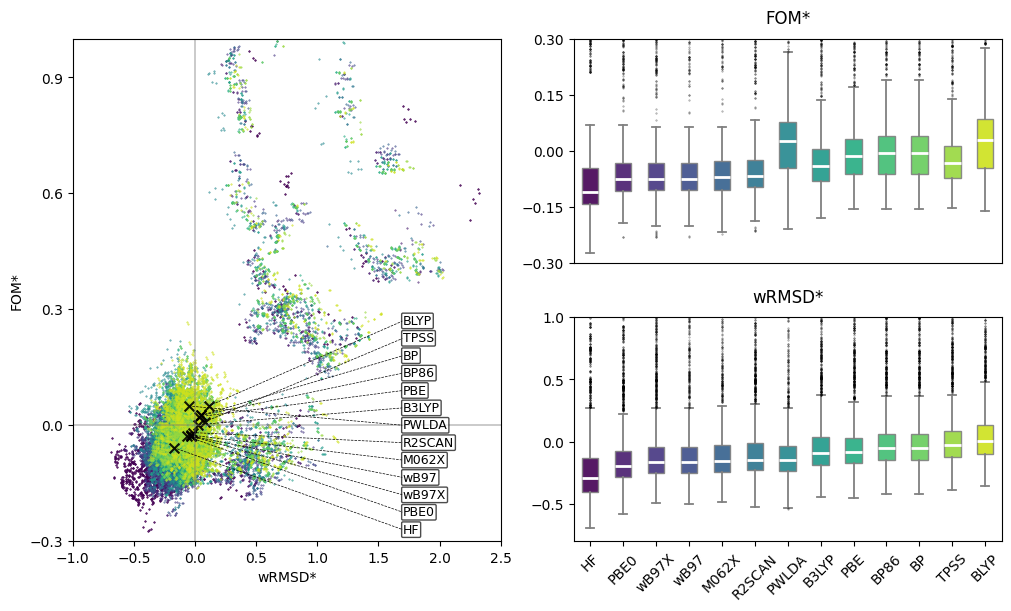

In [5]:
a = Result_2Dplot(".\\Feather_raw").plot('Method')

In [1799]:
from ordered_set import OrderedSet
from matplotlib import cm
class Result_2Dplot():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)


    def mean_reader(self, df, Parameter):
        p_list = list(OrderedSet(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        FOM_res_diff = []
        wRMSD_diff = []
        for i in p_list:
            wRMSD_diff.append([(  (df.loc[(df[Parameter] == i)]['wRMSD'].mean() - df['wRMSD'].mean()) / df['wRMSD'].mean()  )   , i])
            FOM_res_diff.append([(   (df['FOM'].mean()-df.loc[(df[Parameter] == i)]['FOM'].mean() ) /  df['FOM'].mean()    )   , i])
        return wRMSD_diff, FOM_res_diff
    

    def normed_values(self, df):
        for index, rows in df.iterrows():
            df['n_wRMSD'] = (df['wRMSD'] - df['wRMSD'].mean())/df['wRMSD'].mean()
        for index, rows in df.iterrows():
            df['n_FOM'] = (df['FOM'].mean() - df['FOM'])/df['FOM'].mean()
        return df
    
    def Big_maker(self):
        # fig, axs = plt.subplots(1, 2, figsize=figsize)
        # ax = axs[0]
        for file in self.dfs:
            df_temp = pd.read_feather(os.path.join(self.directory, file))
            df_temp = self.normed_values(df_temp)
            df_big = df_temp if file == self.dfs[0] else pd.concat([df_big, df_temp])
        df_big.to_feather('Alles_big.feather')


    def read_data(self):
        self.Big_df = pd.read_feather('Alles_big.feather')
        return self
    


    def plot(self,Parameter,figsize=(10, 6)):
        self.read_data()
        fig = plt.figure(figsize=figsize, layout="constrained")
        spec = fig.add_gridspec(2, 2)
        ax0 = fig.add_subplot(spec[:, 0])
        ax1 = fig.add_subplot(spec[0, 1])
        ax2 = fig.add_subplot(spec[1, 1])
        cmap = cm.get_cmap('viridis')
        yoffset = 0
        ax = ax0
        wRMSD_diff, FOM_res_diff = self.mean_reader(self.Big_df, Parameter)
        
        def euklid_distance(refernce, dein_array):
            return np.sqrt((refernce[0]-dein_array[0][0])**2 + (refernce[1]-dein_array[1][0])**2)
        
        sorted_list = list(zip(wRMSD_diff, FOM_res_diff))
        sorted_list.sort(key = lambda x: euklid_distance((-1,-1), x))
        

        for i, (WRMSD, FOM) in enumerate( sorted_list ):
            label = WRMSD[1]   
            color = cmap(i / len(sorted_list))
            ax.vlines(0, -0.3, 1.1, colors='grey', linestyles='-',alpha=0.5, linewidth = 0.1)
            ax.set_ylim(-0.3, 1)
            ax.set_xlim(-1, 2.5)
            ax.hlines(0, -1, 2.5, colors='grey', linestyles='-',alpha=0.5, linewidth = 0.1) 
            artist = ax.scatter(self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF')) &(self.Big_df[Parameter] == label)]['n_wRMSD'], self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF'))&(self.Big_df[Parameter] == label)]['n_FOM'], s = 0.15, label = label, color = color)

        
       
            boxcolor = artist.get_facecolor()
            boxprops=dict(facecolor = boxcolor, color="grey", linewidth = 1, alpha = 0.9) 
            medianprops=dict( linewidth = 2, color = 'white')
            whiskerprops=dict(color="grey", linewidth = 1.3)
            capprops=dict(color="grey", linewidth = 1.3)
            flierprops = dict(marker='o', color='grey', markersize=0.5, linestyle='none', alpha = 0.4)
            
            ax1.boxplot(self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF')) &(self.Big_df[Parameter] == label)]['n_FOM'], positions = [i], widths = 0.5, patch_artist = True, boxprops = boxprops, medianprops = medianprops, whiskerprops = whiskerprops, capprops = capprops, flierprops=flierprops)
            ax2.boxplot(self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF')) &(self.Big_df[Parameter] == label)]['n_wRMSD'], positions = [i], widths = 0.5, patch_artist = True,boxprops = boxprops, medianprops = medianprops, whiskerprops = whiskerprops, capprops = capprops, flierprops=flierprops)
        ax1.set_xticks(range(len(sorted_list)))
        ax1.tick_params(axis="x", which="both", left=False, right=False, bottom=False,labelbottom=False,labelrotation=45)
        ax1.set_ylim(-0.3, 0.9)
        ax1.set_title('FOM*',y=1.05,pad=1)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax2.set_xticklabels([x[1][1] for x in sorted_list], rotation = 25, rotation_mode="anchor", fontsize=7,ha='right')
        ax2.set_ylim(-0.8, 1.7)
        ax2.set_title('wRMSD*', y=1.05,pad=1)
        ax2.yaxis.set_major_locator(plt.MaxNLocator(4))

        for i, (WRMSD, FOM) in enumerate( sorted_list ):
            
            label = WRMSD[1]    
            ax.scatter(WRMSD[0], FOM[0], label = label, s = 50, marker = 'x', color = 'k', alpha=0.9)

            ax.text(1.7, -0.27+yoffset, label, fontsize=7,color = 'k',ha='left', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.1'))
            ax.plot([WRMSD[0], 1.7], [FOM[0], -0.27 + yoffset], linestyle='--', color='k', linewidth=0.5)
        
            # ax.annotate(label, (WRMSD[0], FOM[0]), xytext = (WRMSD[0]+1.5, FOM[0]+yoffset),size=10, arrowprops = dict(  arrowstyle="-",
            #        ))
            yoffset = yoffset + 0.045
            
        #ax.set_title()
        ax.set_xlabel('wRMSD*')
        ax.set_ylabel('FOM*')
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        #plt.savefig('2Dplot_base.png', dpi=600, bbox_inches='tight', pad_inches = 0)



            
                

C:\Users\Daniel\AppData\Local\Temp\ipykernel_212624\695963066.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


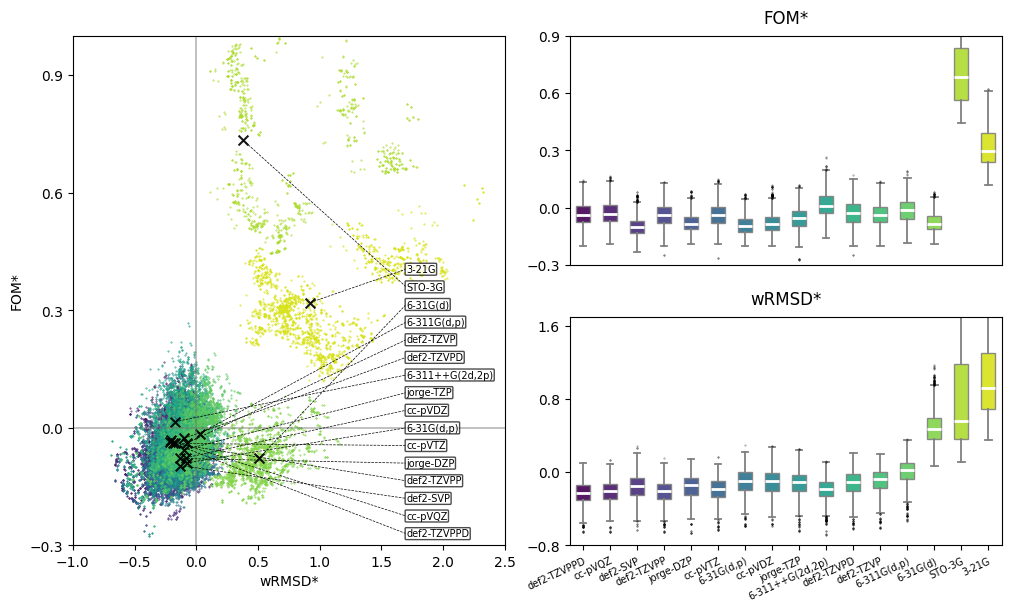

In [1800]:
a = Result_2Dplot(".\\Feather_raw").plot('Base')

In [167]:
from ordered_set import OrderedSet
from matplotlib import cm
class Result_2Dplot_piechart():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)


    def mean_reader(self, df, Parameter):
        p_list = list(OrderedSet(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        FOM_res_diff = []
        wRMSD_diff = []
        for i in p_list:
            wRMSD_diff.append([(  (df.loc[(df[Parameter] == i)]['wRMSD'].mean() - df['wRMSD'].mean()) / df['wRMSD'].mean()  )   , i])
            FOM_res_diff.append([(   (df['FOM'].mean()-df.loc[(df[Parameter] == i)]['FOM'].mean() ) /  df['FOM'].mean()    )   , i])
        return wRMSD_diff, FOM_res_diff
    

    def normed_values(self, df):
        for index, rows in df.iterrows():
            df['n_wRMSD'] = (df['wRMSD'] - df['wRMSD'].mean())/df['wRMSD'].mean()
        for index, rows in df.iterrows():
            df['n_FOM'] = (df['FOM'].mean() - df['FOM'])/df['FOM'].mean()
        return df
    
    def Big_maker(self):
        # fig, axs = plt.subplots(1, 2, figsize=figsize)
        # ax = axs[0]
        for file in self.dfs:
            df_temp = pd.read_feather(os.path.join(self.directory, file))
            df_temp = self.normed_values(df_temp)
            df_big = df_temp if file == self.dfs[0] else pd.concat([df_big, df_temp])
        df_big.to_feather('Alles_big.feather')


    def read_data(self):
        self.Big_df = pd.read_feather('Alles_big.feather')
        return self
    


    def plot(self,Parameter,figsize=(10, 11)):
        self.read_data()
        fig = plt.figure(figsize=figsize, constrained_layout=False)
        spec = fig.add_gridspec(3, 5, height_ratios=[1, 2, 2], hspace=0.0024, wspace=0.005)
        ax0 = fig.add_subplot(spec[0, 2:3])
        ax1 = fig.add_subplot(spec[1, 0:2])
        ax2 = fig.add_subplot(spec[1, 3:5])
        ax3 = fig.add_subplot(spec[2, 0:2])
        ax4 = fig.add_subplot(spec[2, 3:5])
        cmap = cm.get_cmap('Set3')
        
        ax = ax0
        wRMSD_diff, FOM_res_diff = self.mean_reader(self.Big_df, Parameter)
        
        def euklid_distance(refernce, dein_array):
            return np.sqrt((refernce[0]-dein_array[0][0])**2 + (refernce[1]-dein_array[1][0])**2)
        
        sorted_list = list(zip(wRMSD_diff, FOM_res_diff))
        sorted_list.sort(key = lambda x: euklid_distance((-1,-1), x))
        

        for i, (WRMSD, FOM) in enumerate( sorted_list ):
            label = WRMSD[1]   
            color = 'lightblue'
            ax.vlines(0, -0.3, 1.1, colors='grey', linestyles='-',alpha=0.5, linewidth = 0.1)
            ax.set_ylim(-0.3, 1)
            ax.set_xlim(-1, 2.5)
            ax.hlines(0, -1, 2.5, colors='grey', linestyles='-',alpha=0.5, linewidth = 0.1) 
            artist = ax.scatter(self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF')) &(self.Big_df[Parameter] == label)]['n_wRMSD'], self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF'))&(self.Big_df[Parameter] == label)]['n_FOM'], s = 0.15, label = label, color = color)
        ax.annotate('Q3', (0.1, 0.5), xycoords='axes fraction', va='center',    fontsize=15)
        ax.annotate('Q4', (0.7, 0.5), xycoords='axes fraction', va='center', fontsize=15)
        ax.annotate('Q1', (0.1, 0.1), xycoords='axes fraction', va='center', fontsize=15)
        ax.annotate('Q2', (0.7, 0.1), xycoords='axes fraction', va='center', fontsize=15)
        
        conditions = [
            (self.Big_df['n_wRMSD'] < 0) & (self.Big_df['n_FOM'] < 0),
            (self.Big_df['n_wRMSD'] > 0) & (self.Big_df['n_FOM'] < 0),
            (self.Big_df['n_wRMSD'] < 0) & (self.Big_df['n_FOM'] > 0),
            (self.Big_df['n_wRMSD'] > 0) & (self.Big_df['n_FOM'] > 0)
                     ]

        # Labels for pie charts
        labels = ['Q1', 'Q2', 'Q3', 'Q4']

        # Create subplots for pie charts
        ax_rest = [ax1, ax2, ax3, ax4]

        for condition, label, axes in zip(conditions, labels, ax_rest):
            # Filter DataFrame based on condition
            filtered_df = self.Big_df[condition]
            
            # Calculate share of each method
            method_share = filtered_df['Method'].value_counts(normalize=True).reindex([x[1][1] for x in sorted_list])
            
            # Plot pie chart
            wedges = axes.pie(method_share, labels=method_share.index, autopct='%1.0f%%', wedgeprops = dict(linewidth= 1, edgecolor='grey', width=1), colors = [cmap(i / len(sorted_list)) for i in range(len(sorted_list))],  textprops=dict(color="k", fontsize=10), pctdistance=0.9, labeldistance=1.15)
            axes.set_title(label, fontsize=15, pad=0.01)
            axes.set_aspect('equal')
            
        #ax.set_title()
        ax.set_xlabel('wRMSD*')
        ax.set_ylabel('FOM*')
        ax.yaxis.set_major_locator(plt.MaxNLocator(1))
        ax.xaxis.set_major_locator(plt.MaxNLocator(1))
        plt.savefig('2Dplot_method_pies.png', dpi=600, bbox_inches='tight', pad_inches = 0)



            
                

C:\Users\Daniel\AppData\Local\Temp\ipykernel_51600\3715462384.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set3')


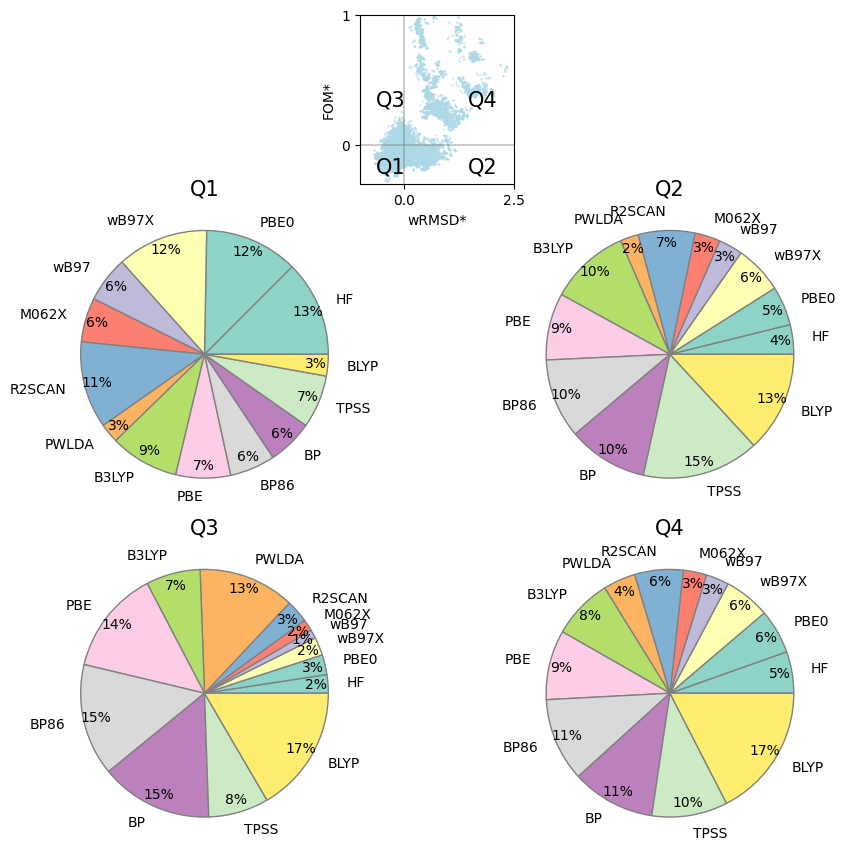

In [168]:
a = Result_2Dplot_piechart(".\\Feather_raw").plot('Method')

In [642]:
from ordered_set import OrderedSet
from matplotlib import cm
class Result_2Dplot_piechart():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)


    def mean_reader(self, df, Parameter):
        p_list = list(OrderedSet(df[Parameter]))
        if Parameter == 'Becke Accuracy':
            p_list = ['Low', 'Normal', 'High']
        if Parameter == 'Base':
            p_list = ['STO-3G', '3-21G','6-31G(d)','6-31G(d,p)', '6-311G(d,p)', '6-311++G(2d,2p)', 'cc-pVDZ', 'cc-pVTZ', 'cc-pVQZ', 'def2-SVP', 'def2-TZVP', 'def2-TZVPD', 'def2-TZVPP', 'def2-TZVPPD', 'jorge-DZP', 'jorge-TZP']
        FOM_res_diff = []
        wRMSD_diff = []
        for i in p_list:
            wRMSD_diff.append([(  (df.loc[(df[Parameter] == i)]['wRMSD'].mean() - df['wRMSD'].mean()) / df['wRMSD'].mean()  )   , i])
            FOM_res_diff.append([(   (df['FOM'].mean()-df.loc[(df[Parameter] == i)]['FOM'].mean() ) /  df['FOM'].mean()    )   , i])
        return wRMSD_diff, FOM_res_diff
    

    def normed_values(self, df):
        for index, rows in df.iterrows():
            df['n_wRMSD'] = (df['wRMSD'] - df['wRMSD'].mean())/df['wRMSD'].mean()
        for index, rows in df.iterrows():
            df['n_FOM'] = (df['FOM'].mean() - df['FOM'])/df['FOM'].mean()
        return df
    
    def Big_maker(self):
        # fig, axs = plt.subplots(1, 2, figsize=figsize)
        # ax = axs[0]
        for file in self.dfs:
            df_temp = pd.read_feather(os.path.join(self.directory, file))
            df_temp = self.normed_values(df_temp)
            df_big = df_temp if file == self.dfs[0] else pd.concat([df_big, df_temp])
        df_big.to_feather('Alles_big.feather')


    def read_data(self):
        self.Big_df = pd.read_feather('Alles_big.feather')
        return self
    


    def plot(self,Parameter,figsize=(10, 11)):
        self.read_data()
        fig = plt.figure(figsize=figsize, constrained_layout=False)
        spec = fig.add_gridspec(3, 5, height_ratios=[1, 2, 2], hspace=0.0024, wspace=0.005)
        ax0 = fig.add_subplot(spec[0, 2:3])
        ax1 = fig.add_subplot(spec[1, 0:2])
        ax2 = fig.add_subplot(spec[1, 3:5])
        ax3 = fig.add_subplot(spec[2, 0:2])
        ax4 = fig.add_subplot(spec[2, 3:5])
        cmap = cm.get_cmap('Set3')
        
        ax = ax0
        wRMSD_diff, FOM_res_diff = self.mean_reader(self.Big_df, Parameter)
        
        def euklid_distance(refernce, dein_array):
            return np.sqrt((refernce[0]-dein_array[0][0])**2 + (refernce[1]-dein_array[1][0])**2)
        
        sorted_list = list(zip(wRMSD_diff, FOM_res_diff))
        sorted_list.sort(key = lambda x: euklid_distance((-1,-1), x))
        

        for i, (WRMSD, FOM) in enumerate( sorted_list ):
            label = WRMSD[1]   
            color = 'lightblue'
            ax.vlines(0, -0.3, 1.1, colors='grey', linestyles='-',alpha=0.7, linewidth = 0.1)
            ax.set_ylim(-0.3, 1)
            ax.set_xlim(-1, 2.5)
            ax.hlines(0, -1, 2.5, colors='grey', linestyles='-',alpha=0.7, linewidth = 0.1) 
            artist = ax.scatter(self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF')) &(self.Big_df[Parameter] == label)]['n_wRMSD'], self.Big_df.loc[ ((self.Big_df['SCF Conv'] == 'NoSpherA2SCF'))&(self.Big_df[Parameter] == label)]['n_FOM'], s = 0.15, label = label, color = color)
        ax.annotate('Q3', (0.1, 0.5), xycoords='axes fraction', va='center',    fontsize=15)
        ax.annotate('Q4', (0.7, 0.5), xycoords='axes fraction', va='center', fontsize=15)
        ax.annotate('Q1', (0.1, 0.1), xycoords='axes fraction', va='center', fontsize=15)
        ax.annotate('Q2', (0.7, 0.1), xycoords='axes fraction', va='center', fontsize=15)
        
        conditions = [
            (self.Big_df['n_wRMSD'] < 0) & (self.Big_df['n_FOM'] < 0),
            (self.Big_df['n_wRMSD'] > 0) & (self.Big_df['n_FOM'] < 0),
            (self.Big_df['n_wRMSD'] < 0) & (self.Big_df['n_FOM'] > 0),
            (self.Big_df['n_wRMSD'] > 0) & (self.Big_df['n_FOM'] > 0)
                     ]

        # Labels for pie charts
        labels = ['Q1', 'Q2', 'Q3', 'Q4']

        # Create subplots for pie charts
        ax_rest = [ax1, ax2, ax3, ax4]

        for condition, label, axes in zip(conditions, labels, ax_rest):
            # Filter DataFrame based on condition
            filtered_df = self.Big_df[condition]
            # Calculate share of each method
            method_share = filtered_df[Parameter].value_counts().reindex([x[1][1] for x in sorted_list])
            method_share[np.isnan(method_share)] = 0
            
           
            # Plot pie chart
            wedges = axes.pie(method_share[method_share>=150], labels=method_share[method_share>=150].index, autopct='%1.0f%%', wedgeprops = dict(linewidth= 1, edgecolor='grey', width=1), colors = [cmap(i / len(sorted_list)) for i in range(len(sorted_list))],  textprops=dict(color="k", fontsize=10), pctdistance=0.9, labeldistance=1.15)
            axes.set_title(label, fontsize=15, pad=0.01)
            axes.set_aspect('equal')
            
        #ax.set_title()
        ax.set_xlabel('wRMSD*')
        ax.set_ylabel('FOM*')
        ax.yaxis.set_major_locator(plt.MaxNLocator(1))
        ax.xaxis.set_major_locator(plt.MaxNLocator(1))
        #plt.savefig('2Dplot_base_pies.png', dpi=600, bbox_inches='tight', pad_inches = 0)



            
                

C:\Users\Daniel\AppData\Local\Temp\ipykernel_51600\3074239083.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set3')


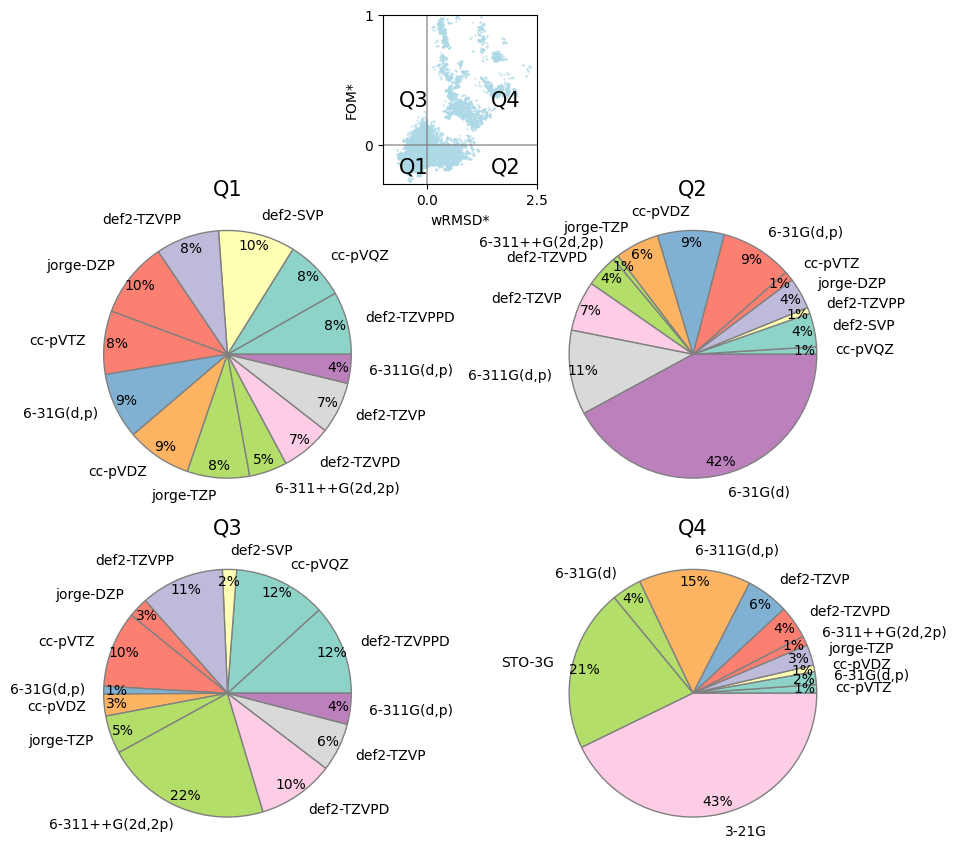

In [643]:
a = Result_2Dplot_piechart(".\\Feather_raw").plot('Base')


In [1076]:
# Your list of [X, i] pairs
data_list = [
    [0.02698374912795558, 'PBE'], [0.04747647437372081, 'B3LYP'], [-0.02443565831356057, 'wB97X'], 
    [0.14020779336091158, 'BLYP'], [-0.0622577913221549, 'PBE0'], [0.08896508307838795, 'TPSS'], 
    [-0.06553875296972624, 'PWLDA'], [-0.026914970374246554, 'wB97'], [0.04469410393714659, 'BP86'], 
    [-0.019091380542693805, 'M062X'], [-0.00888303472290952, 'R2SCAN'], [0.044954943908908564, 'BP'], 
    [-0.23310568183438407, 'HF']
]

# Create an empty dictionary
result_dict = {}

# Iterate over the list and populate the dictionary
for i, (Y, key) in enumerate(data_list):
    result_dict[key] = []
    result_dict[key].append(Y)

# Print the resulting dictionary
print(result_dict)
dataframe_bsp = pd.DataFrame(result_dict)
dataframe_bsp.transpose()

{'PBE': [0.02698374912795558], 'B3LYP': [0.04747647437372081], 'wB97X': [-0.02443565831356057], 'BLYP': [0.14020779336091158], 'PBE0': [-0.0622577913221549], 'TPSS': [0.08896508307838795], 'PWLDA': [-0.06553875296972624], 'wB97': [-0.026914970374246554], 'BP86': [0.04469410393714659], 'M062X': [-0.019091380542693805], 'R2SCAN': [-0.00888303472290952], 'BP': [0.044954943908908564], 'HF': [-0.23310568183438407]}


0
PBE     0.026984
B3LYP   0.047476
wB97X  -0.024436
BLYP    0.140208
PBE0   -0.062258
TPSS    0.088965
PWLDA  -0.065539
wB97   -0.026915
BP86    0.044694
M062X  -0.019091
R2SCAN -0.008883
BP      0.044955
HF     -0.233106

1 trends, der parameter, basis set size, big data
2 was ist das beste
3 zeit 

In [102]:
import pandas as pd
from itertools import product

# Sample DataFrame with limited parameter columns
# Replace this with your actual DataFrame
def missing_plotter(df):


    # List of all possible parameter values
    possible_values = {
            'Method' : ['HF',     'BP',     'B3LYP',     'R2SCAN',     'BP86',     'PWLDA',     'TPSS',     'PBE',     'PBE0',     'M062X',     'BLYP',     'wB97',     'wB97X'],
            'SCNL': ["True", "False"]}
    possible_values_part2 = {
            'Base': ['STO-3G',  '3-21G', '6-31G(d)', '6-31G(d,p)', '6-311G(d,p)', '6-311++G(2d,2p)', 'cc-pVDZ', 'cc-pVTZ', 'cc-pVQZ', 'def2-SVP', 'def2-TZVP', 'def2-TZVPD', 'def2-TZVPP', 'def2-TZVPPD', 'jorge-DZP', 'jorge-TZP'],
            'Solvent': ['Vacuum', 'Water'],
            'Becke Accuracy':['Normal', 'High', 'Low'],
            'ORCA SCF':['NoSpherA2SCF','SloppySCF','LooseSCF','NormalSCF','StrongSCF','TightSCF']
    }

    # Generate all possible combinations of parameters
    all_combinations = list(product(*possible_values.values()))

    excluded_combinations = [('PWLDA', 'True'), ('M062X', 'True'), ('wB97', 'True')]

    all_combinations_filtered = [combination for combination in all_combinations if not any(excluded == combination for excluded in excluded_combinations)]

    all_combinations_part2 = list(product(*possible_values_part2.values()))

    all_all_combinations = list(product(all_combinations_filtered, all_combinations_part2))

    all_combinations = [comb[0] + comb[1] for comb in all_all_combinations]

    # Convert DataFrame combinations to tuples
    existing_combinations = [tuple(row) for row in df[['Method', 'SCNL', 'Base', 'Solvent', 'Becke Accuracy', 'SCF Conv']].values]

    missing_combinations = [comb for comb in all_combinations if comb not in existing_combinations]

    # Find missing combinations
    missing_bases=[]
    missing_bases_count=[]
    for base in possible_values.get('Method'):
        missing_count = sum([1 for comb in missing_combinations if base in comb])
        if missing_count > 0:
            missing_bases.append(base)
            missing_bases_count.append(missing_count)


    return missing_bases, missing_bases_count
    


In [109]:
class STOfails():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)
    def plotter(self):
        fig, axes = plt.subplots(3, 5, figsize=(11, 7))
        fig.delaxes(axes[2,3])
        fig.delaxes(axes[2,4])
        # fig.tight_layout(pad=2.7)
        fig.subplots_adjust(wspace=0.1)
        fig.subplots_adjust(hspace=0.40)

        for ax, file in zip(axes.flat, self.dfs):
            self.df = pd.read_feather(os.path.join(self.directory, file))
            missing_bases, missing_counts = missing_plotter(self.df)
            rects = ax.bar(missing_bases, missing_counts, edgecolor='black', linewidth=0.7)
            ax.bar_label(rects, padding=3, fontsize=6)
            ax.set_xticks(missing_bases)

           
            plt.rcParams['axes.titley'] = 1.0 
            ax.set_title(f'{file.split("_")[0]}', loc='right', fontsize=12, pad=-11)
            ax.set_yticks([])

            ax.set_ylim(0, 110)
            ax.set_xticklabels(labels=missing_bases, rotation=55, rotation_mode="anchor", fontsize=8, ha='right')
        #plt.savefig('m_fails.png', dpi=600, bbox_inches='tight', pad_inches = 0)
            
        
        
            

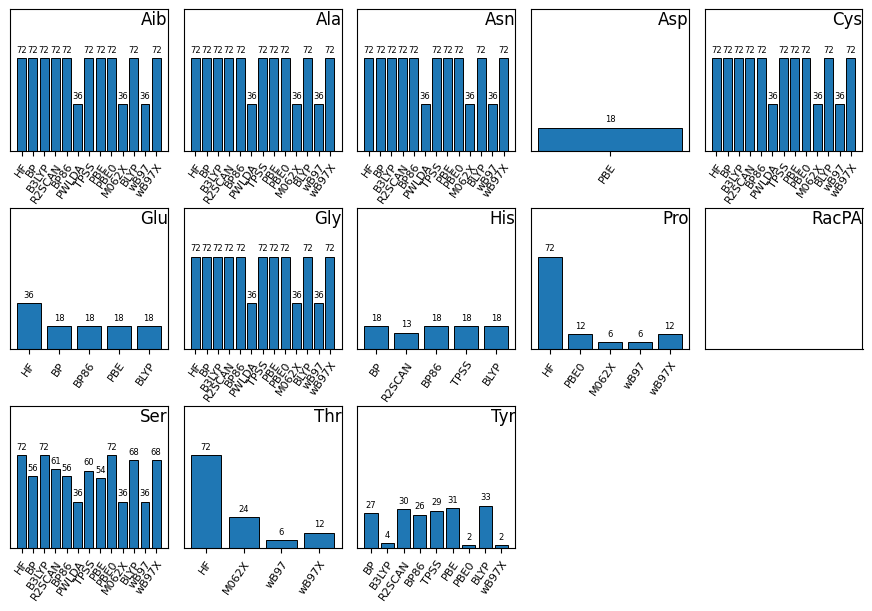

In [110]:
a=STOfails(".\\Feather_raw").plotter()

Method              B3LYP      BLYP        BP      BP86        HF     M062X  \
Base                                                                          
3-21G            1.242645  1.240999  1.256370  1.256370  1.124260  1.269778   
6-311++G(2d,2p)  1.523215  1.438273  1.518527  1.518527  1.549639  1.575884   
6-311G(d,p)      1.571407  1.491121  1.541169  1.541169  1.593125  1.652605   
6-31G(d)         1.596955  1.604721  1.604514  1.604514  1.527855  1.614456   
6-31G(d,p)       1.643253  1.643534  1.642411  1.642411  1.566027  1.658065   
cc-pVDZ          1.675313  1.654463  1.663009  1.663009  1.619533  1.684553   
cc-pVQZ          1.524672  1.474364  1.524310  1.524310  1.547043  1.588936   
cc-pVTZ          1.562499  1.525775  1.575112  1.575112  1.586809  1.648146   
def2-SVP         1.677472  1.664647  1.672013  1.672013  1.584920  1.689287   
def2-TZVP        1.526466  1.489715  1.532612  1.532612  1.565978  1.619491   
def2-TZVPD       1.486504  1.446884  1.514661  1.514

<Figure size 1200x800 with 0 Axes>

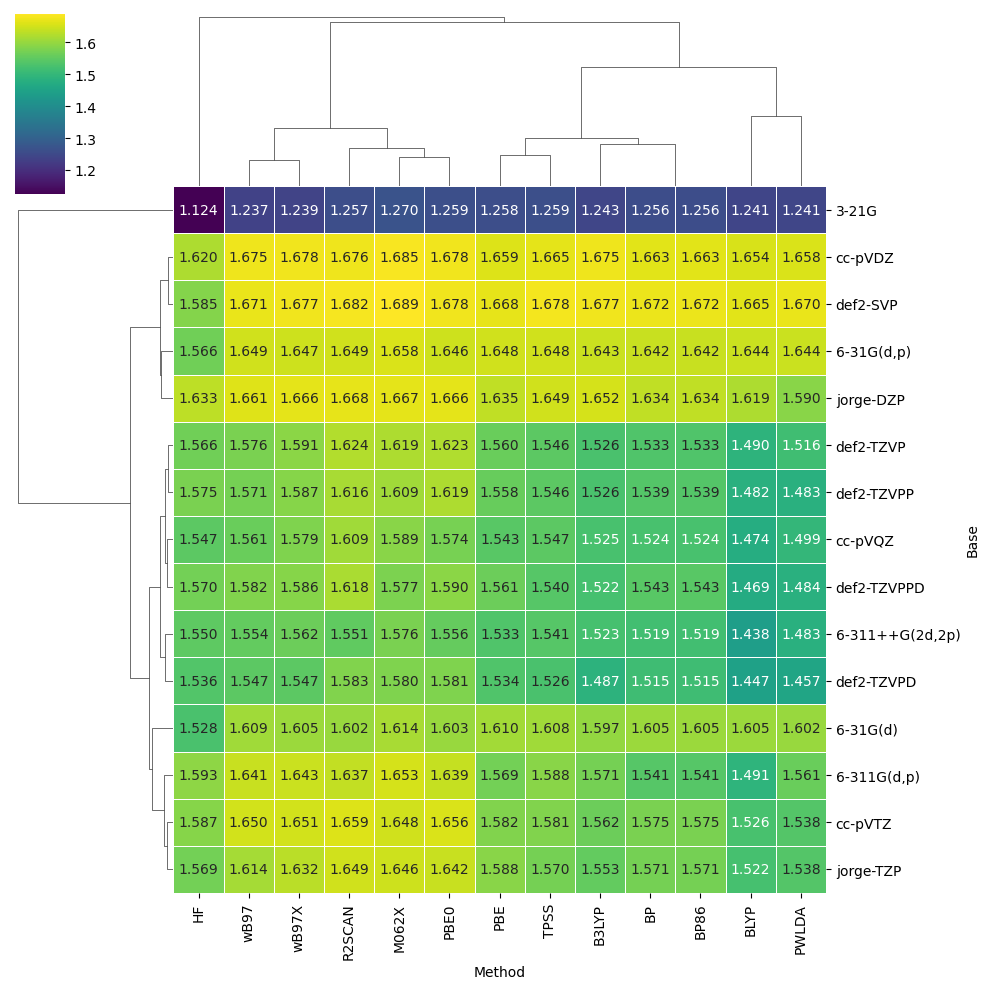

In [1835]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

pivot_df = CysDF.df.pivot_table(index='Base', columns='Method', values='FOM', aggfunc='mean')
pivot_df = pivot_df.astype(float)

print(pivot_df)

plt.figure(figsize=(12, 8))
sns.clustermap(pivot_df, cmap='viridis', linewidths=0.6, annot=True, fmt=".3f")
# plt.yticks(rotation=45, rotation_mode="anchor", ha="right")
# plt.xlabel('Method')
# plt.ylabel('Basis Set')
plt.show()


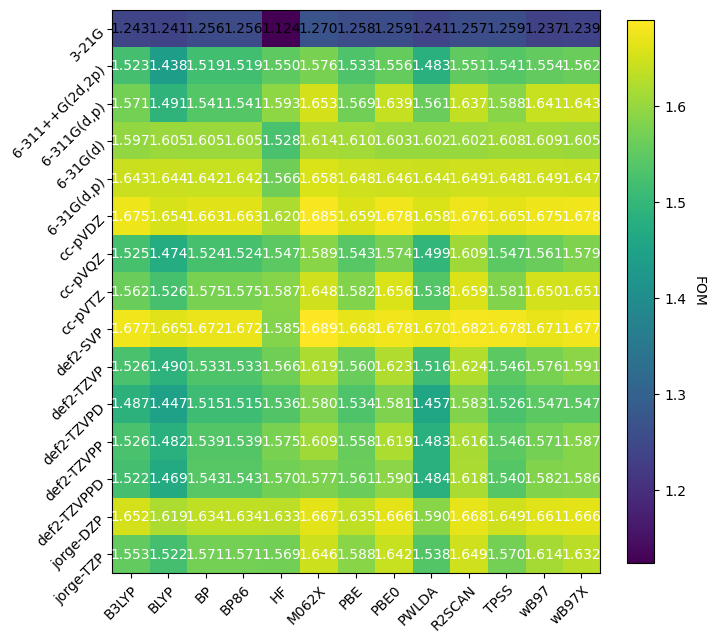

In [872]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

pivot_df = CysDF.df.pivot_table(index='Base', columns='Method', values='FOM', aggfunc='mean')
pivot_df = pivot_df.astype(float)

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)
    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

fig, ax = plt.subplots(figsize=(7,12))
im = ax.imshow(pivot_df, cmap='viridis')
cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical',fraction=0.05, shrink=1)
cbar.ax.set_ylabel(ylabel='FOM', rotation=-90, va="bottom")
# Set x-axis ticks and labels
ax.set_xticks(np.arange(len(pivot_df.columns)), labels=pivot_df.columns)
ax.grid(which="minor", color="w", linestyle='-', linewidth=20)
ax.tick_params(which="minor", bottom=False, left=False)

# Set y-axis ticks and labels
ax.set_yticks(np.arange(len(pivot_df.index)))
ax.set_yticklabels(pivot_df.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

texts = annotate_heatmap(im, valfmt="{x:.3f}")

plt.show()


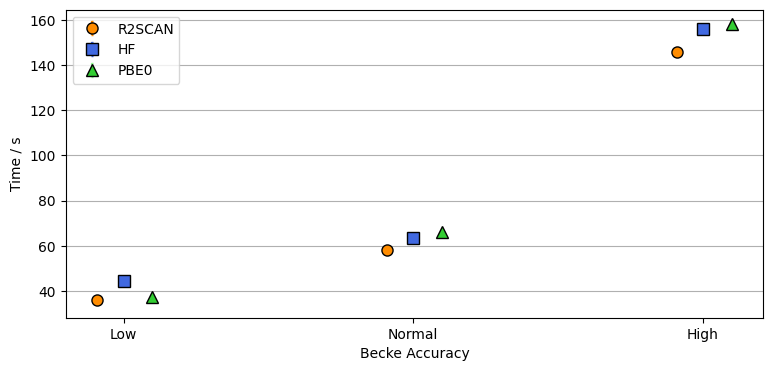

In [603]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your data
data = {
    'Method': ['R2SCAN', 'R2SCAN', 'R2SCAN', 'R2SCAN', 'R2SCAN', 'R2SCAN', 'R2SCAN', 'R2SCAN', 'R2SCAN',
               'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF',
               'PBE0', 'PBE0', 'PBE0', 'PBE0', 'PBE0', 'PBE0', 'PBE0', 'PBE0', 'PBE0'],
    'BA': ['High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'Low', 'Low', 'Low',
           'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'Low', 'Low', 'Low',
           'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'Low', 'Low', 'Low'],
    't / s': [146.83, 143.72, 146.44, 57.83, 58.26, 58.17, 36.34, 35.32, 36.54,
              155.37, 156.73, 155.59, 63.47, 63.47, 62.86, 43.98, 44.37, 44.82,
              158.71, 158.07, 157.169, 66.2, 65.9, 65.638, 37.22, 36.97, 38.29]
}
bas = ['Low', 'Normal', 'High']
# Convert data to DataFrame
df = pd.DataFrame(data)
df_rs = df.loc[(df['Method'] == 'R2SCAN')]
df_hf = df.loc[(df['Method'] == 'HF')]
df_pbe0 = df.loc[(df['Method'] == 'PBE0')]
rscan=[df_rs[df_rs['BA'] == i]['t / s'].mean() for i in bas]
hf=[df_hf[df_hf['BA'] == i]['t / s'].mean() for i in bas]
pbe0=[df_pbe0[df_pbe0['BA'] == i]['t / s'].mean() for i in bas]

fig, ax = plt.subplots(figsize=(9, 4))
ax.errorbar(np.linspace(1,3,3), rscan, yerr=df_rs.groupby('BA')['t / s'].std(), fmt='o', label='R2SCAN', capsize=1, color='darkorange', ecolor='darkorange', ms = 8,markeredgecolor= 'k')
ax.errorbar(np.linspace(1,3,3)+0.09, hf, yerr=df_hf.groupby('BA')['t / s'].std(), fmt='s', label='HF', color='royalblue',capsize=1, ecolor='royalblue', ms = 8,markeredgecolor= 'k')
ax.errorbar(np.linspace(1,3,3)+0.19, pbe0, yerr=df_pbe0.groupby('BA')['t / s'].std(), fmt='^', label='PBE0', capsize=1, color='limegreen',ecolor='palegreen', ms = 8,markeredgecolor= 'k')
ax.grid(axis='y')
ax.set_xticks(np.linspace(1,3,3)+0.09)
ax.set_xticklabels(bas)
ax.set_xlabel('Becke Accuracy')
ax.set_ylabel('Time / s')

ax.legend()
plt.savefig('barplot.png', dpi=600, bbox_inches='tight', pad_inches = 0)

[0. 1. 2. 3. 4. 5.]


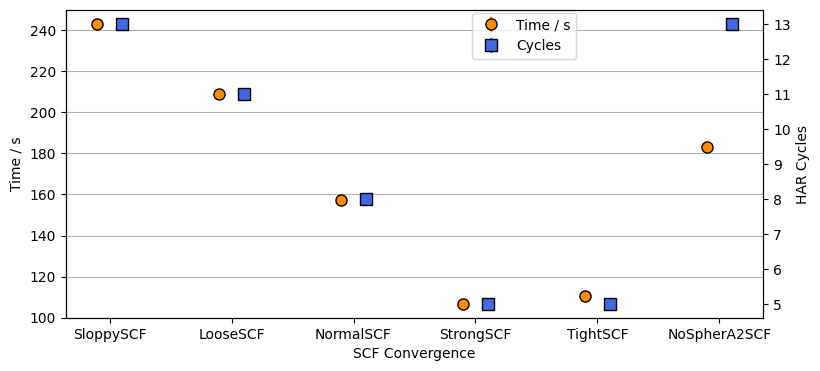

In [602]:
import numpy as np

time = [243.03, 208.8, 157.2, 106.81, 110.74, 182.94]
SCFConv = ['SloppySCF', 'LooseSCF', 'NormalSCF', 'StrongSCF', 'TightSCF', 'NoSpherA2SCF']
xdats = np.linspace(0, 5, 6)
print(xdats)
Cycles = [13, 11, 8, 5, 5, 13]
fig, ax = plt.subplots(figsize=(9, 4))
ax.errorbar(SCFConv, time, yerr=0, fmt='o', capsize=1, color='darkorange', ecolor='darkorange', ms = 8, label='Time / s',markeredgecolor= 'k')
ax1 = ax.twinx()
ax1.errorbar(xdats+0.2, Cycles, yerr=0, fmt='s', capsize=1, color='royalblue', ecolor='royalblue', ms = 8, label='Cycles',markeredgecolor= 'k')
ax.grid(axis='y')
ax.set_xticks(xdats+0.1)
ax.set_xlabel('SCF Convergence')
ax.set_ylabel('Time / s')
ax1.set_ylabel('HAR Cycles')
fig.legend(loc = 'upper right', bbox_to_anchor=(0.7, 0.89))
plt.savefig('SCFtime.png', dpi=600, bbox_inches='tight', pad_inches = 0)

[0. 1. 2. 3. 4. 5.]


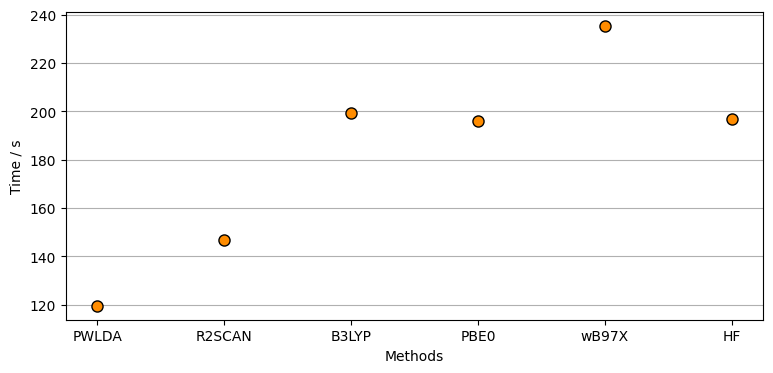

In [601]:
import numpy as np

time = [119.54, 146.59, 199.23, 196.01, 235.4, 197.0]
Methods = ['PWLDA', 'R2SCAN', 'B3LYP', 'PBE0', 'wB97X', 'HF']
xdats = np.linspace(0, 5, 6)
print(xdats)

fig, ax = plt.subplots(figsize=(9, 4))
ax.errorbar(Methods, time, yerr=0, fmt='o', capsize=1, color='darkorange', ecolor='darkorange', ms = 8, label='Time / s', markeredgecolor= 'k')

ax.grid(axis='y')
ax.set_xticks(xdats)
ax.set_xlabel('Methods')
ax.set_ylabel('Time / s')

#fig.legend(loc = 'upper right')
plt.savefig('time_methods.png', dpi=600, bbox_inches='tight', pad_inches = 0)

[0. 1. 2. 3. 4.]


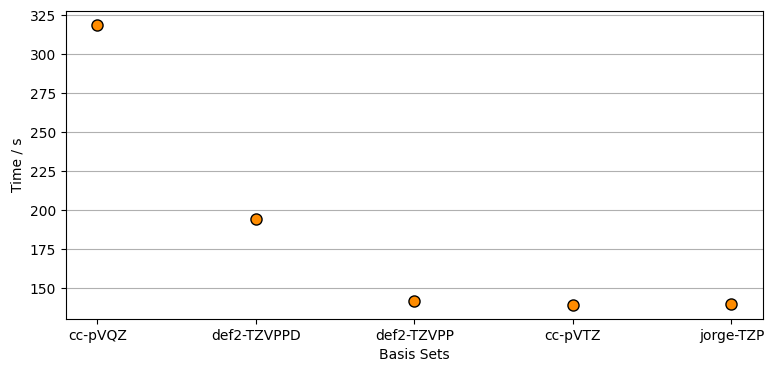

In [114]:
import numpy as np

time = [318.94, 194.37, 141.58, 139.14, 139.32]
Methods = [ 'cc-pVQZ', 'def2-TZVPPD', 'def2-TZVPP', 'cc-pVTZ', 'jorge-TZP']
xdats = np.linspace(0, 4, 5)
print(xdats)

fig, ax = plt.subplots(figsize=(9, 4))
ax.errorbar(Methods, time, yerr=0, fmt='o', capsize=1, color='darkorange', ecolor='darkorange', ms = 8, label='Time / s', markeredgecolor= 'k')

ax.grid(axis='y')
ax.set_xticks(xdats)
ax.set_xlabel('Basis Sets')
ax.set_ylabel('Time / s')

#fig.legend(loc = 'upper right')
#plt.savefig('time_methods.png', dpi=600, bbox_inches='tight', pad_inches = 0)

maybe add asorted by +++ to the clustermaps y acxis

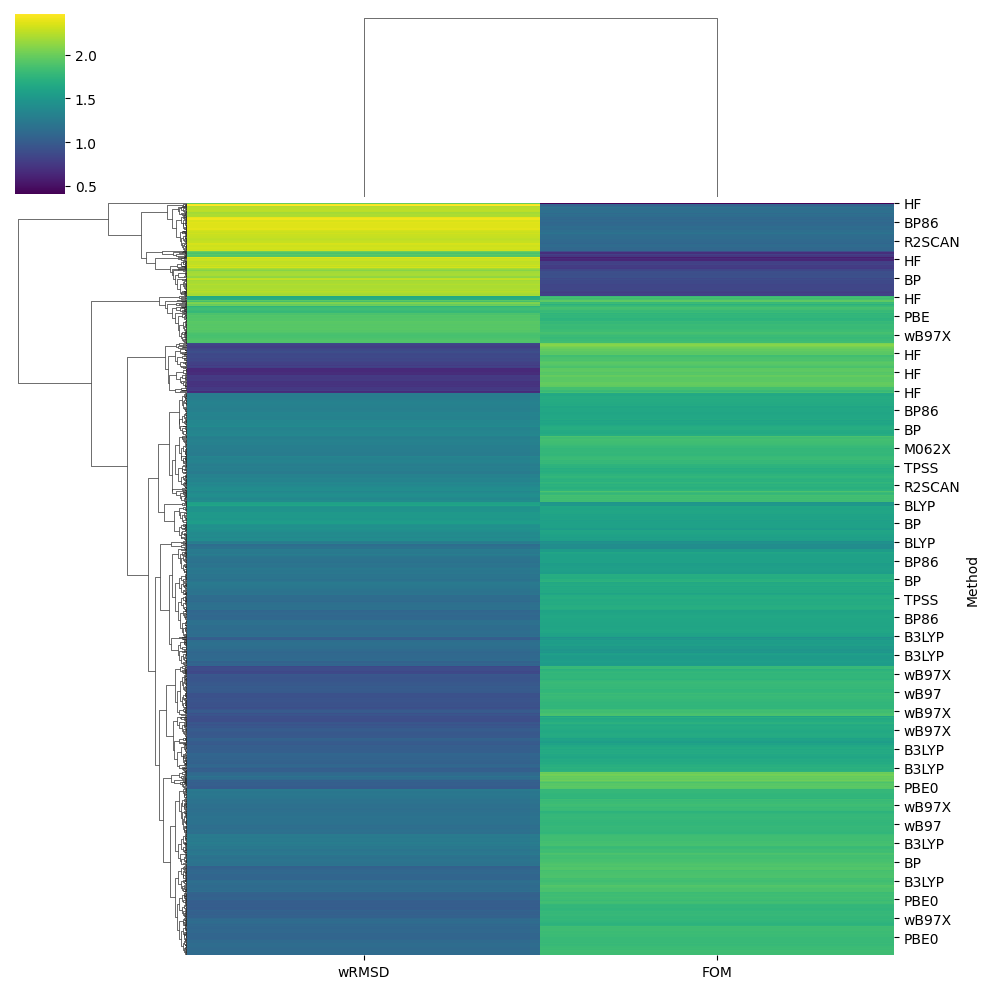

In [572]:
test_clusterMap = AspDF.df[['wRMSD', 'FOM', 'Method']]
test_clusterMap=test_clusterMap.set_index(['Method'])
test_clusterMap.sort_values(by=['wRMSD'], ascending=True)
test_clusterMap = test_clusterMap.astype(float)
test_clusterMap
a = sns.clustermap(test_clusterMap, cmap='viridis')



In [126]:
from ordered_set import OrderedSet
class top_scores():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)

    def seperatet_ranking(self, df,headnumber=10):
        df_sorted_FOM = df.loc[(df['SCF Conv']== 'NoSpherA2SCF')].sort_values(by='FOM', ascending=False)
        top_rows_FOM = df_sorted_FOM.head(headnumber)
        top_rows_FOM['max_rank'] = top_rows_FOM['FOM'].rank(method='max')
        df_sorted_wRMSD = df.loc[(df['SCF Conv']== 'NoSpherA2SCF')].sort_values(by='wRMSD', ascending=True)
        top_rows_wRMSD = df_sorted_wRMSD.head(headnumber)
        top_rows_wRMSD['max_rank'] = top_rows_wRMSD['wRMSD'].rank(method='max')
        return top_rows_FOM, top_rows_wRMSD
    
    def united_ranking(self, df, headnumber=20):
        mean_FOM = df['FOM'].mean()
        mean_wRMSD = df['wRMSD'].mean()
        df['FOM_res'] = (mean_FOM - df['FOM'])/mean_FOM
        df['wRMSD_res'] = (df['wRMSD'] - mean_wRMSD)/mean_wRMSD
        df['united_rank'] = df['FOM_res'] + df['wRMSD_res']
        df_sorted_united = df.loc[(df['SCF Conv']== 'NoSpherA2SCF')].sort_values(by='united_rank', ascending=True)
        top_rows_united = df_sorted_united.head(headnumber)
        return top_rows_united
        
    def Lister_seperate(self):
        for file in self.dfs:
            df = pd.read_feather(os.path.join(self.directory, file))
            top_FOM, top_wRMSD = self.seperatet_ranking(df)
            df_temp_tops = pd.concat([top_wRMSD, top_FOM]) 
            df_concat = df_temp_tops if file == self.dfs[0] else pd.concat([df_concat, df_temp_tops])
        return df_concat
    
    def Lister_united(self):
        for file in self.dfs:
            df = pd.read_feather(os.path.join(self.directory, file))
            top_united = self.united_ranking(df)
            df_temp_tops = top_united
            df_concat = df_temp_tops if file == self.dfs[0] else pd.concat([df_concat, df_temp_tops])
        return df_concat
    
    def dict_maker(self,df,df_big, Parameter):
        dict_list = []
        for index, rows in df.iterrows():
            bloc = df_big.loc[(df_big['Method'] == rows['Method']) & (df_big['Base'] == rows['Base'])]
            dict_list.append(bloc.value_counts(Parameter).to_dict())
        return dict_list

    def plotter(self):
        df_big = self.Lister_seperate()
        df = self.Lister_seperate()
        df[df[['Method', 'Base', 'Becke Accuracy', 'Solvent', 'SCF Conv']].duplicated()==True]
        df = df.groupby(['Method','Base'], as_index=False).size()#gets counts of duplicates
        df = df.sort_values(by='size', ascending=False)
        df = df.head(10)
        combined_dict = self.dict_maker(df,df_big, Parameter='Solvent')
        print(combined_dict)
        total_heights = [sum(d.values()) for d in combined_dict]
        cmap = plt.get_cmap('viridis')
        color_map = {}
        for dictionary in combined_dict:
            for amino_acid in dictionary:
                if amino_acid not in color_map:
                    color_map[amino_acid] = cmap(6* len(color_map) / len(combined_dict))
        
        fig, (ax2,ax1)= plt.subplots(1, 2, figsize=(10, 6))
 
        # Create the horizontal bar plot in the subplot
        bars = ax1.barh(range(df.shape[0]), df['size'], color='skyblue',linewidth=0.7, edgecolor='black')

        # Add labels inside the bars (Method / Base)
        # for i, bar in enumerate(bars):
        #     label = f"{df['Method'].iloc[i]} / {df['Base'].iloc[i]}"
        #     ax1.text(bar.get_width(), bar.get_y() + bar.get_height()/2, label, va='center', ha='right', color='k')
        for ii,rect in enumerate(bars):

            width =  rect.get_width()

            height = rect.get_height()

            yloc1=rect.get_y() + height /2.0
            yloc2=rect.get_y() + height /2.0
            label = f"{df['Method'].iloc[ii]} / {df['Base'].iloc[ii]}"
            if (width <= 15):
                # Shift the text to the right side of the right edge
                xloc1 = width + 1
                yloc2=yloc2+0.3
                # Black against white background
                clr = 'black'
                align = 'left'
            else:
                # Shift the text to the left side of the right edge
                xloc1 = 0.98*width
                # White on blue
                clr = 'white'
                align = 'right'
            yloc1=rect.get_y() + height /2.0

            ax1.text(xloc1,yloc1, label,horizontalalignment=align,
                             verticalalignment='center',color=clr,weight='bold',
                             clip_on=True)
        plotted_amino_acids = set()
        bottom = 0
        for idx, dictionary in enumerate(combined_dict):
            total_height = sum(dictionary.values())
            for key, value in dictionary.items():
                share = value / total_height
                ax2.barh(idx, value, left=bottom, label=key,color=color_map[key], linewidth=0.7, edgecolor='k', alpha=0.8)
                # Place labels inside bins
                #ax2.text(bottom + value / 2, idx, key, ha='center', va='center', color='white')
                bottom += value
                plotted_amino_acids.add(key)
            bottom = 0  # Reset bottom for the next dictionary

        handles, labels = ax2.get_legend_handles_labels()
        unique_labels = list(OrderedSet(labels))  # Get unique labels
        unique_handles = [handles[labels.index(label)] for label in unique_labels]  # Get unique handles
        ax2.legend(unique_handles, unique_labels)
        
        ax2.set_yticks(np.arange(len(combined_dict)), ['Top {}'.format(i+1) for i in range(len(combined_dict))])
        ax1.tick_params(axis="y", which="both", left=False, right=False, labelrotation=45)
        ax1.set_title('Most Frequent Method / Basis Set Combinations')
        ax2.set_title('Solvent Model per Method / Basis Set Combination')
        ax1.set_yticks(range(df.shape[0]))
        ax1.set_yticklabels([])
        plt.tight_layout()

        
        #plt.savefig('Top_10_Solvent_unit.png', dpi=600, bbox_inches='tight', pad_inches = 0)
    

C:\Users\Daniel\AppData\Local\Temp\ipykernel_17976\2543894409.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rows_FOM['max_rank'] = top_rows_FOM['FOM'].rank(method='max')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_17976\2543894409.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rows_wRMSD['max_rank'] = top_rows_wRMSD['wRMSD'].rank(method='max')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_17976\2543894409.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

[{'Water': 19, 'Vacuum': 8}, {'Water': 20, 'Vacuum': 2}, {'Water': 16, 'Vacuum': 2}, {'Vacuum': 10, 'Water': 8}, {'Water': 12, 'Vacuum': 2}, {'Water': 12}, {'Water': 10, 'Vacuum': 2}, {'Vacuum': 6, 'Water': 3}, {'Water': 8}, {'Vacuum': 4, 'Water': 4}]


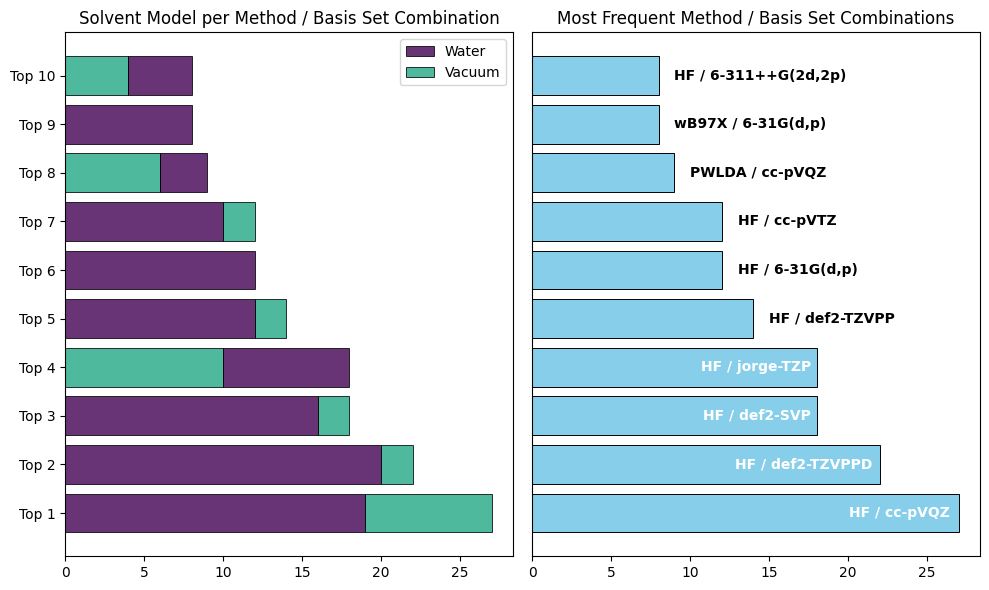

In [127]:
b = top_scores(".\\Feather_raw").plotter()
b

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16996\784720507.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


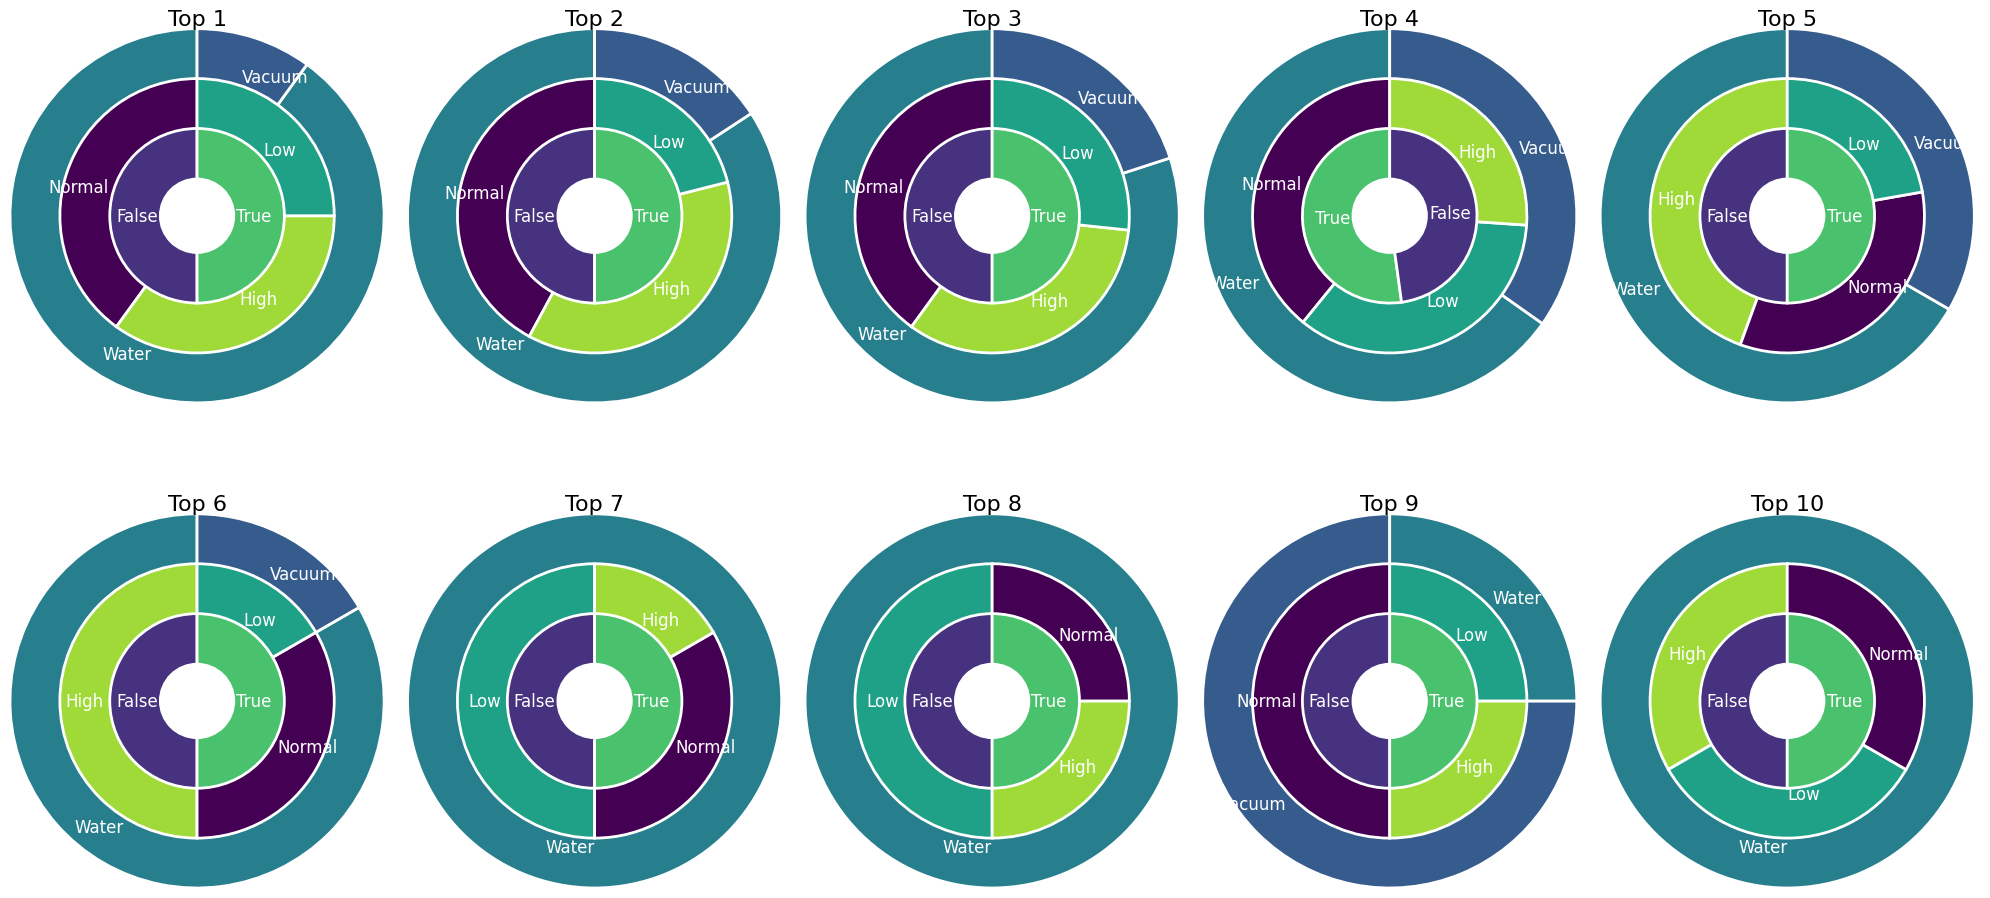

In [122]:
# Define data united_ranking
data_dicts = [
    [{'Water': 36, 'Vacuum': 4}, {'Water': 32, 'Vacuum': 6}, {'Water': 24, 'Vacuum': 6}, {'Water': 15, 'Vacuum': 8}, {'Water': 12, 'Vacuum': 6}, {'Water': 10, 'Vacuum': 2}, {'Water': 12}, {'Water': 8}, {'Vacuum': 6, 'Water': 2}, {'Water': 6}],
    [{'Normal': 16, 'High': 14, 'Low': 10}, {'Normal': 16, 'High': 14, 'Low': 8}, {'Normal': 12, 'High': 10, 'Low': 8}, {'Normal': 9, 'Low': 8, 'High': 6}, {'High': 8, 'Normal': 6, 'Low': 4}, {'High': 6, 'Normal': 4, 'Low': 2}, {'Low': 6, 'Normal': 4, 'High': 2}, {'Low': 4, 'High': 2, 'Normal': 2}, {'Normal': 4, 'High': 2, 'Low': 2}, {'High': 2, 'Low': 2, 'Normal': 2}],
    [{'False': 20, 'True': 20}, {'False': 19, 'True': 19}, {'False': 15, 'True': 15}, {'True': 12, 'False': 11}, {'False': 9, 'True': 9}, {'False': 6, 'True': 6}, {'False': 6, 'True': 6}, {'False': 4, 'True': 4}, {'False': 4, 'True': 4}, {'False': 3, 'True': 3}]
]
wedgeprops=dict(width=0.5,edgecolor='w',linewidth=2)
textprops=dict(color="w", fontsize=12)
cmap = plt.cm.get_cmap('viridis')

# Define the keys from all data_dicts
keys = set()
for data_dict in data_dicts:
    for d in data_dict:
        keys.update(d.keys())

# Create a color dictionary based on the colormap
color_dict = {key: cmap(i / len(keys)) for i, key in enumerate(keys)}
# Create subplots for each nested pie chart
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
# fig.delaxes(axs[2,2])
# fig.delaxes(axs[2,3])

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        inner_dict = data_dicts[0][5*i+j]
        center_dict = data_dicts[1][5*i+j]
        outer_dict = data_dicts[2][5*i+j]
        
        # Draw the inner pie chart
        inner_labels = list(inner_dict.keys())
        inner_sizes = list(inner_dict.values())
        inner_colors = [color_dict[label] for label in inner_labels]
        ax.pie(inner_sizes, labels=inner_labels,  startangle=90, radius=1.5,wedgeprops=wedgeprops,labeldistance=0.78,textprops=textprops,colors=inner_colors)
        ax.set_aspect('equal')

        # Draw the center pie chart
        center_labels = list(center_dict.keys())
        center_sizes = list(center_dict.values())
        center_colors =  [color_dict[label] for label in center_labels]
        ax.pie(center_sizes, labels=center_labels,  startangle=90, radius=1.1,labeldistance=0.68,wedgeprops=wedgeprops,textprops=textprops,colors=center_colors)
        ax.set_aspect('equal')

        # Draw the outer pie chart
        outer_labels = list(outer_dict.keys())
        outer_sizes = list(outer_dict.values())
        outer_colors = [color_dict[label] for label in outer_labels]
        ax.pie(outer_sizes, labels=outer_labels, startangle=90, radius=0.7, labeldistance=0.45,textprops=textprops, wedgeprops=wedgeprops,colors=outer_colors)
        ax.set_aspect('equal')
        centre_circle = plt.Circle((0, 0), 0.3, color='white')
        ax.add_artist(centre_circle)

        ax.set_title(f'Top {5*i+j+1}', fontsize=16, pad=25)

plt.tight_layout()
plt.savefig('nested_pie_chart_unit.png', dpi=600, bbox_inches='tight', pad_inches = 0)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16996\3664932307.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


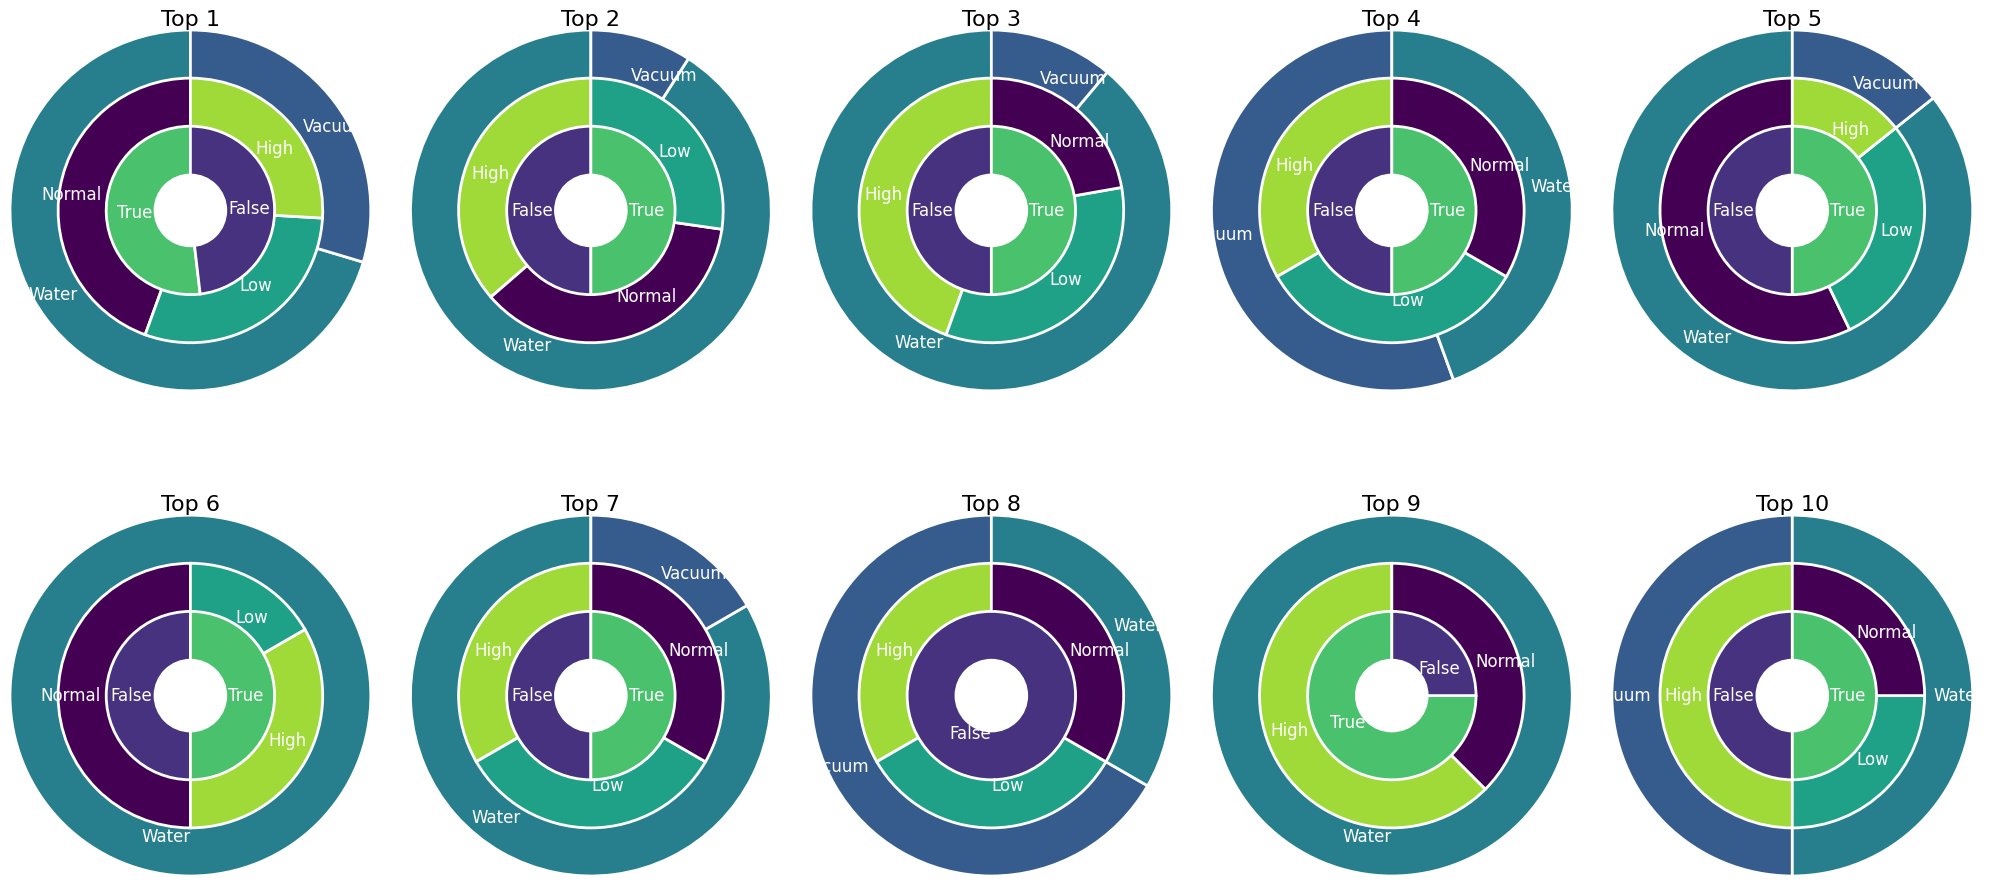

In [123]:
# Define data separated_ranking
data_dicts = [
    [{'Water': 19, 'Vacuum': 8}, {'Water': 20, 'Vacuum': 2}, {'Water': 16, 'Vacuum': 2}, {'Vacuum': 10, 'Water': 8}, {'Water': 12, 'Vacuum': 2}, {'Water': 12}, {'Water': 10, 'Vacuum': 2}, {'Vacuum': 6, 'Water': 3}, {'Water': 8}, {'Vacuum': 4, 'Water': 4}],
    [{'Normal': 12, 'Low': 8, 'High': 7}, {'High': 8, 'Normal': 8, 'Low': 6}, {'High': 8, 'Low': 6, 'Normal': 4}, {'High': 6, 'Low': 6, 'Normal': 6}, {'Normal': 8, 'Low': 4, 'High': 2}, {'Normal': 6, 'High': 4, 'Low': 2}, {'High': 4, 'Low': 4, 'Normal': 4}, {'High': 3, 'Low': 3, 'Normal': 3}, {'High': 5, 'Normal': 3}, {'High': 4, 'Low': 2, 'Normal': 2}],
    [{'True': 14, 'False': 13}, {'False': 11, 'True': 11}, {'False': 9, 'True': 9}, {'False': 9, 'True': 9}, {'False': 7, 'True': 7}, {'False': 6, 'True': 6}, {'False': 6, 'True': 6}, {'False': 9}, {'True': 6, 'False': 2}, {'False': 4, 'True': 4}]
]
wedgeprops=dict(width=0.5,edgecolor='w',linewidth=2)
textprops=dict(color="w", fontsize=12)
cmap = plt.cm.get_cmap('viridis')

# Define the keys from all data_dicts
keys = set()
for data_dict in data_dicts:
    for d in data_dict:
        keys.update(d.keys())

# Create a color dictionary based on the colormap
color_dict = {key: cmap(i / len(keys)) for i, key in enumerate(keys)}
# Create subplots for each nested pie chart
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
# fig.delaxes(axs[2,2])
# fig.delaxes(axs[2,3])

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        inner_dict = data_dicts[0][5*i+j]
        center_dict = data_dicts[1][5*i+j]
        outer_dict = data_dicts[2][5*i+j]
        
        # Draw the inner pie chart
        inner_labels = list(inner_dict.keys())
        inner_sizes = list(inner_dict.values())
        inner_colors = [color_dict[label] for label in inner_labels]
        ax.pie(inner_sizes, labels=inner_labels,  startangle=90, radius=1.5,wedgeprops=wedgeprops,labeldistance=0.78,textprops=textprops,colors=inner_colors)
        ax.set_aspect('equal')

        # Draw the center pie chart
        center_labels = list(center_dict.keys())
        center_sizes = list(center_dict.values())
        center_colors =  [color_dict[label] for label in center_labels]
        ax.pie(center_sizes, labels=center_labels,  startangle=90, radius=1.1,labeldistance=0.68,wedgeprops=wedgeprops,textprops=textprops,colors=center_colors)
        ax.set_aspect('equal')

        # Draw the outer pie chart
        outer_labels = list(outer_dict.keys())
        outer_sizes = list(outer_dict.values())
        outer_colors = [color_dict[label] for label in outer_labels]
        ax.pie(outer_sizes, labels=outer_labels, startangle=90, radius=0.7, labeldistance=0.45,textprops=textprops, wedgeprops=wedgeprops,colors=outer_colors)
        ax.set_aspect('equal')
        centre_circle = plt.Circle((0, 0), 0.3, color='white')
        ax.add_artist(centre_circle)

        ax.set_title(f'Top {5*i+j+1}', fontsize=16, pad=25)

plt.tight_layout()
plt.savefig('nested_pie_chart_sep.png', dpi=600, bbox_inches='tight', pad_inches = 0)

In [394]:
b = top_scores(".\\Feather_raw").Lister_united()
b[b[['Method', 'Base', 'Becke Accuracy', 'Solvent', 'SCF Conv']].duplicated()==True]

wRMSD Data Method         Base Solvent Becke Accuracy      SCF Conv  \
9103   0.280608  Aib   TPSS  def2-TZVPPD   Water            Low  NoSpherA2SCF   
9895   0.278207  Aib     HF  def2-TZVPPD   Water            Low  NoSpherA2SCF   
10255  0.292573  Aib   TPSS   def2-TZVPP   Water            Low  NoSpherA2SCF   
9901   0.282297  Aib     HF  def2-TZVPPD   Water         Normal  NoSpherA2SCF   
9907   0.281443  Aib     HF  def2-TZVPPD   Water           High  NoSpherA2SCF   
...         ...  ...    ...          ...     ...            ...           ...   
389    0.890223  Tyr     HF      cc-pVTZ   Water            Low  NoSpherA2SCF   
709    0.875386  Tyr     HF      cc-pVQZ   Water            Low  NoSpherA2SCF   
448    0.875386  Tyr     HF      cc-pVQZ   Water            Low  NoSpherA2SCF   
3708   0.909932  Tyr     HF     def2-SVP   Water         Normal  NoSpherA2SCF   
3684   0.909932  Tyr     HF     def2-SVP   Water         Normal  NoSpherA2SCF   

        SCNL weight       FOM  ...                   wR2    Goof  \
9103    True   True  2.441391  ...    0.0486428370052417  1.0294   
9895    True   True  2.417068  ...   0.04037931973944926  1.7181   
10255   True   True  2.462779  ...   0.04597977784804241  1.0959   
9901    True   True  2.407272  ...   0.03994041636091781  1.6995   
9907    True   True  2.399612  ...    0.0398991950646166  1.6977   
...      ...    ...       ...  ...                   ...     ...   
389    False   True  2.564475  ...    0.0362049516631234  1.0973   
709    False   True  2.546334  ...  0.038036783054503705  1.1263   
448     True   True  2.546334  ...   0.03803678305449203  1.1263   
3708    True   True  2.580648  ...  0.036751422170337944   1.108   
3684   False   True  2.580648  ...    0.0367514221703319   1.108   

                  max_peak              max_hole               res_rms  \
9103    0.1681871930285253  -0.13367848276049363  0.039853247502832284   
9895    0.1638041400384591  -0.16528513472660647   0.03955700872507698   
10255  0.16662303403548898  -0.13779203491219882  0.039604000005463075   
9901   0.16236868202850224  -0.17251671117207062   0.03925782348796559   
9907   0.16338379105195777  -0.17424171740262956   0.03927469616137344   
...                    ...                   ...                   ...   
389     0.1259825340335517   -0.1258623253708296   0.03526411177963191   
709    0.12531384699974848  -0.12682435788548682  0.035210326576181464   
448    0.12531384699975626  -0.12682435788548388  0.035210326576181554   
3708   0.12176351484387636  -0.12715235983351364  0.034811628571510926   
3684   0.12176351484387407  -0.12715235983351625  0.034811628571511204   

                                             bondlengths  \
9103   O-C5:1.2485429343971004,O1-C5:1.25968252785820...   
9895   O-C5:1.2484386229171986,O1-C5:1.25941741747268...   
10255  O-C5:1.248546566460759,O1-C5:1.259631976545314...   
9901   O-C5:1.2484086224839785,O1-C5:1.25948391347968...   
9907   O-C5:1.2484011704488016,O1-C5:1.25947540629029...   
...                                                  ...   
389    O1-H1:0.97502160697906,O1-C7:1.364178621760505...   
709    O1-H1:0.9768344654525615,O1-C7:1.3642879386049...   
448    O1-H1:0.9768344654525609,O1-C7:1.3642879386049...   
3708   O1-H1:0.9701698985726013,O1-C7:1.3644142416951...   
3684   O1-H1:0.9701698985725987,O1-C7:1.3644142416951...   

                                              bonderrors   FOM_res wRMSD_res  \
9103   O-C5:0.00041394365743774504,O1-C5:0.0004059698... -0.088793 -0.383560   
9895   O-C5:0.0003927087584863691,O1-C5:0.00037936931... -0.077946 -0.388837   
10255  O-C5:0.00041174599460012414,O1-C5:0.0004032228... -0.098332 -0.357276   
9901   O-C5:0.00039041934547239736,O1-C5:0.0003770706... -0.073577 -0.379852   
9907   O-C5:0.00039022091713674197,O1-C5:0.0003768660... -0.070161 -0.381727   
...                                                  ...       ...       ...   
389    O1-H1:0.007925017894956764,O1-C7:0.00049513

In [243]:
df = pd.DataFrame({

    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],

    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],

    'rating': [4, 4, 3.5, 15, 5]})
df[df[['brand', 'style', 'rating']].duplicated() == True] #gets the duplicates

brand style  rating
1  Yum Yum   cup     4.0

In [397]:
for index, rows in b.iterrows():
    dict_list = []
    bloc = b[(b['Method'] == b['Method']) & (b['Base'] == rows['Base'])]
    dict_list.append(bloc.value_counts('Solvent').to_dict())
dict_list

[{'Water': 18}]

In [35]:
class overview():
    def __init__(self, directory):
        self.directory = directory
        self.dfs = os.listdir(self.directory)
    
    def read_data(self):
        self.Big_df = pd.read_feather('Alles_big.feather')
        return self
    
    def box_plot(self):
        IAM_wRMSDs = [3.998, 13.07, 11.361, 5.335, 9.276, 8.174, 10.495, 7.357, 6.934, 5.66, 8.62, 7.66, 8.04]
        fig, ax = plt.subplots(1, 1, figsize=(7, 4),sharey=True)
        data_name = []
        ax_2 = ax.twinx()
        boxcolor = ['blue', 'orange']
         
        meanpointprops2=dict( linewidth=1.1, color = 'r',linestyle='-', marker='o', markersize=6, markerfacecolor='turquoise', markeredgecolor='k') 
        meanpointprops1=dict( linewidth=1.1, color = 'r',linestyle='-', marker='s', markersize=6, markerfacecolor='r', markeredgecolor='k') 
        medianprops=dict( linewidth = 1, color = 'white')
        whiskerprops=dict(color="grey", linewidth = 1.3)
        capprops=dict(color="grey", linewidth = 1.3)
        flierprops = dict(marker='o', color='grey', markersize=0.0, linestyle='none', alpha = 0.4)
        for file in self.dfs:
            df = pd.read_feather(os.path.join(self.directory, file))
            data_name.append(f'{file.split("_")[0]}')
            a = ax.boxplot(df['FOM'], positions = [data_name.index(f'{file.split("_")[0]}')], widths = 0.5, patch_artist = True,boxprops=dict(facecolor = boxcolor[1], color="grey", linewidth = 1, alpha = 0.9), medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, showmeans=True, meanline=False, meanprops=meanpointprops1)
            b = ax_2.boxplot(df['wRMSD'], positions = [data_name.index(f'{file.split("_")[0]}')], widths = 0.5, patch_artist = True,boxprops=dict(facecolor = boxcolor[0], color="grey", linewidth = 1, alpha = 0.9), medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, showmeans=True, meanline=False, meanprops=meanpointprops2)
        c = ax_2.scatter(range(len(data_name)), IAM_wRMSDs, color = 'blue', label = 'IAM', zorder = 10, marker = 'x')
        ax.set_xticks(range(len(data_name)))
        ax.set_xticklabels(data_name)
        ax.set_ylabel('FOM')
        ax_2.set_ylabel('wRMSD')
        ax.legend([x['boxes'][0] for x in [a,b]], ['FOM','wRMSD'], bbox_to_anchor=(0.6, 0.99), ncol=2)
        plt.tight_layout()

        plt.savefig('Boxplot_overview.png', dpi=600, bbox_inches='tight', pad_inches = 0)

            


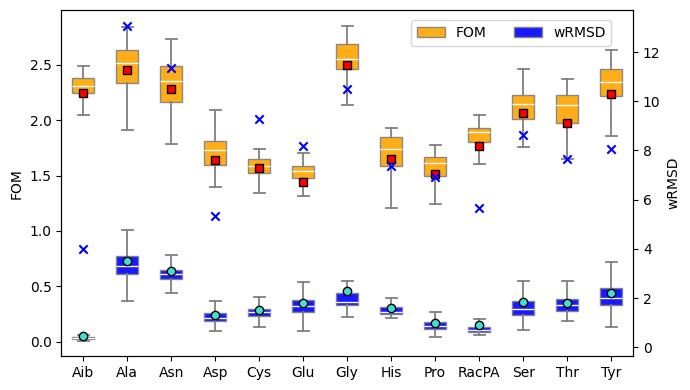

In [36]:
f = overview(".\\Feather_raw").box_plot()

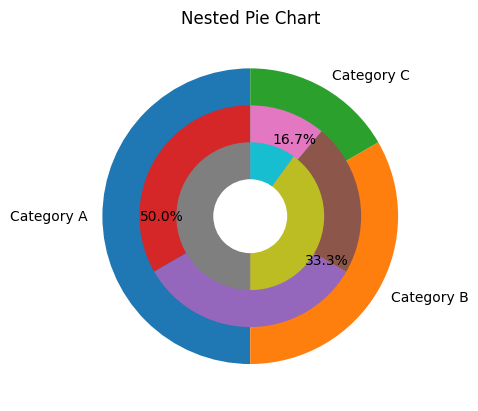

In [42]:
import matplotlib.pyplot as plt

# Define data
sizes_outer = [30, 20, 10]  # Sizes for outer circle
sizes_inner1 = [15, 15, 10, 5]  # Sizes for first inner circle
sizes_inner2 = [10, 8, 2]  # Sizes for second inner circle

# Define labels
labels_outer = ['Category A', 'Category B', 'Category C']
labels_inner1 = ['Subcategory A1', 'Subcategory A2', 'Subcategory A3', 'Subcategory A4']
labels_inner2 = ['Sub-subcategory A1', 'Sub-subcategory A2', 'Sub-subcategory A3']

# Create a figure and axis
fig, ax = plt.subplots()

# Draw the outer circle
ax.pie(sizes_outer, labels=labels_outer, radius=1, autopct='%1.1f%%', startangle=90)

# Draw the first inner circle
ax.pie(sizes_inner1, radius=0.75, startangle=90)

# Draw the second inner circle
ax.pie(sizes_inner2, radius=0.5, startangle=90)

# Add a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.25, color='white', linewidth=0)
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_aspect('equal')

# Display the plot
plt.title('Nested Pie Chart')
plt.show()